In [4]:
import pandas as pd

df = pd.read_csv('data.csv')
columns_to_keep = ['salesYear', 'salesMonth', 'InvoiceWeek', 'invoiceDate', 'stockistId', 'chemistId', 'categoryId', 'hqId', 'regionId', 'cityId', 'qty', 'free', 'rate', 'amount', 'productId', 'divisionId', 'packingTypeId', 'mrp', 'packingTypeId']
df = df[columns_to_keep]

In [5]:
df

salesYear  salesMonth  InvoiceWeek invoiceDate  stockistId  chemistId  \
0            2021           1            1  01-01-2021         NaN     1779.0   
1            2021           1            1  01-01-2021       168.0        NaN   
2            2021           1            1  01-01-2021         NaN     5676.0   
3            2021           1            1  01-01-2021         NaN     5225.0   
4            2021           1            1  01-01-2021        93.0        NaN   
...           ...         ...          ...         ...         ...        ...   
129266       2025           2            6  02-04-2025         NaN        NaN   
129267       2025           2            6  02-04-2025         NaN        NaN   
129268       2025           2            6  02-04-2025         NaN        NaN   
129269       2025           2            6  02-04-2025         NaN        NaN   
129270       2025           2            6  02-04-2025         NaN        NaN   

        categoryId  hqId  regionId  cityId  qty  free    rate   amount  \
0            259.0  20.0       9.0   582.0    6     0   68.06   408.36   
1              NaN   NaN       NaN   547.0   30     0   52.07  1562.10   
2            258.0   1.0       1.0    22.0   30     0   50.91  1527.30   
3            259.0   1.0       1.0   402.0   20     0   57.86  1157.20   
4              NaN  17.0       1.0    21.0    0    30   40.50     0.00   
...            ...   ...       ...     ...  ...   ...     ...      ...   
129266         NaN   NaN       NaN     NaN   20     0   57.86  1157.20   
129267         NaN   NaN       NaN     NaN   30     0  104.14  3124.20   
129268         NaN   NaN       NaN     NaN   50     0   48.59  2429.50   
129269         NaN   NaN       NaN     NaN   10     0   71.39   713.90   
129270         NaN   NaN       NaN     NaN   50     0   46.29  2314.50   

        productId  divisionId  packingTypeId    mrp  packingTypeId  
0              26           1             38  216.0             38  
1             168           3             28   85.5             28  
2             248           3             28   79.2             28  
3             195           1             42  180.0             42  
4             254           3             28   75.6             28  
...           ...         ...            ...    ...            ...  
129266        172           3             28   90.0             28  
129267        265           3             28  162.0             28  
129268          8           3             28   69.3             28  
129269        215           1             35  117.0             35  
129270        166           3             28   72.0             28  

[129271 rows x 19 columns]

NameError: name 'array' is not defined

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# Prepare data
X = weekly_agg[['InvoiceWeek']]
y = weekly_agg['amount']

# Split data: last 10% for test, first 90% for train
split_idx = int(len(weekly_agg) * 0.9)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Define parameter grid for LightGBM
param_grid = {
    'num_leaves': [15, 31, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200]
}

# Initialize model and GridSearch
lgbm = LGBMRegressor(random_state=42)
grid_model = GridSearchCV(lgbm, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_model.fit(X_train, y_train)

# Predict on test set
y_pred = grid_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print("Best Params:", grid_model.best_params_)
print("Test MSE:", mse)
print("Predictions:", y_pred)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 9864460.225806
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet th

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 9772212.693548
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet th

In [13]:
!pip install scikit-learn lightgbm

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------  10.5/10.7 MB 59.8 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 61.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 79.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ------------- -------------------------- 12.8/38.6 MB 62.0 MB/s eta 0:00:01
   ------------------------ --------------- 23.9/38.6 MB 58.1 MB/s eta 0:00:01
   -------------------------- ------------- 25.4/38.6 MB 42.4 MB/s eta 0:00:01
   ---------------------------- ----------- 27.0/38.6 MB 33.5 MB/s eta 0:00:01
   ----------------------------- ---------- 28.8/38.6 MB 28.6 MB/s eta 0:00:01
   -------------------------------- ------- 30.9/38.6 MB 24.8 MB/s eta 0:00:01
   ------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
supervision 0.21.0 requires defusedxml<0.8.0,>=0.7.1, which is not installed.
supervision 0.21.0 requires pyyaml>=5.3, which is not installed.


NameError: name 'array' is not defined

In [18]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Load your sales data
df = pd.read_csv('data.csv')

# Convert invoiceDate to datetime
df['invoiceDate'] = pd.to_datetime(df['invoiceDate'])

# Aggregate sales by week (or use another time unit as needed)
weekly_sales = df.groupby('InvoiceWeek').agg({'amount': 'sum'}).reset_index()
weekly_sales['InvoiceWeek'] = pd.to_datetime(weekly_sales['InvoiceWeek'])

# Sort by time
weekly_sales = weekly_sales.sort_values('InvoiceWeek')

# Create lag features (e.g., previous week's sales)
weekly_sales['amount_lag1'] = weekly_sales['amount'].shift(1)
weekly_sales['amount_lag2'] = weekly_sales['amount'].shift(2)
weekly_sales = weekly_sales.dropna()

X = weekly_sales[['amount_lag1', 'amount_lag2']].values
y = weekly_sales['amount'].values

# Chronological split
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Define the LightGBM model
model = LGBMRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and evaluation
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Test Set Mean Squared Error: {mse:.4f}")
print("Predictions:", y_pred)

ValueError: time data "1/13/2021" doesn't match format "%m-%d-%Y", at position 10. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [20]:
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Load required columns from CSV
df = pd.read_csv('data.csv', usecols=['salesYear', 'salesMonth', 'InvoiceWeek', 'amount'])

# Ensure InvoiceWeek is sorted and numeric (if not, convert)
df = df.sort_values(['salesYear', 'salesMonth', 'InvoiceWeek']).reset_index(drop=True)

# Create lag features
df['amount_lag1'] = df['amount'].shift(1)
df['amount_lag2'] = df['amount'].shift(2)

# Drop rows with NaN lag values
df = df.dropna().reset_index(drop=True)

# Features and target
X = df[['salesYear', 'salesMonth', 'InvoiceWeek', 'amount_lag1', 'amount_lag2']]
y = df['amount']

# Split: last 10 rows for test, rest for train
split_idx = len(df) - 10
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# LightGBM model and hyperparameter grid
model = LGBMRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=3)

# Grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Predict and evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Test Set Mean Squared Error:", mse)
print("Predictions for last 10 rows:", y_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 129259, number of used features: 5
[LightGBM] [Info] Start training from score 3938.373726
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [21]:
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(comparison)

   Actual    Predicted
0  2099.5  4129.081759
1  6364.5  4091.812387
2  2217.5  3884.973261
3  2700.0  4091.812387
4  2036.6  3884.973261
5  1157.2  3884.973261
6  3124.2  3884.973261
7  2429.5  3845.820896
8   713.9  3884.973261
9  2314.5  3884.973261


In [23]:
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# 1. Load required columns from CSV
df = pd.read_csv('data.csv', usecols=['salesYear', 'salesMonth', 'InvoiceWeek', 'amount'])

# 2. Sort data chronologically
df = df.sort_values(['salesYear', 'salesMonth', 'InvoiceWeek']).reset_index(drop=True)

# 3. Find outliers using IQR and cap them to min/max boundary
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['amount_capped'] = df['amount'].clip(lower=lower_bound, upper=upper_bound)

# 4. Create lag features
df['amount_lag1'] = df['amount_capped'].shift(1)
df['amount_lag2'] = df['amount_capped'].shift(2)

# 5. Drop rows with NaN lag values
df = df.dropna().reset_index(drop=True)

# 6. Features and target
X = df[['salesYear', 'salesMonth', 'InvoiceWeek', 'amount_lag1', 'amount_lag2']]
y = df['amount_capped']

# 7. Split: last 10 rows for test, rest for train
split_idx = len(df) - 10
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# 8. LightGBM model and hyperparameter grid
model = LGBMRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 9. Time series cross-validation
tscv = TimeSeriesSplit(n_splits=3)

# 10. Grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 11. Predict and evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# 12. Show results
print("Best Hyperparameters:", grid_search.best_params_)
print("Test Set Mean Squared Error:", mse)
print("Predictions for last 10 rows:", y_pred)
print("Actual values for last 10 rows:", y_test.values)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 129259, number of used features: 5
[LightGBM] [Info] Start training from score 3027.303284
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [24]:
from prophet import Prophet
import pandas as pd

# Prepare data for Prophet
df = pd.read_csv('data.csv', usecols=['salesYear', 'salesMonth', 'InvoiceWeek', 'amount'])
# Combine year, month, week into a date (if InvoiceWeek is not a date, you may need to convert it)
df['ds'] = pd.to_datetime(df['InvoiceWeek'])
df = df.rename(columns={'amount': 'y'})

# Fit Prophet model
model = Prophet()
model.fit(df[['ds', 'y']])

# Make future dataframe for next 10 periods
future = model.make_future_dataframe(periods=10, freq='W')
forecast = model.predict(future)

# Show last 10 predictions
print(forecast[['ds', 'yhat']].tail(10))

C:\Users\dazau\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
18:40:10 - cmdstanpy - INFO - Chain [1] start processing
18:40:14 - cmdstanpy - INFO - Chain [1] done processing


                              ds          yhat
53 1970-01-04 00:00:00.000000053 -1.238042e+16
54 1970-01-11 00:00:00.000000053 -4.126806e+16
55 1970-01-18 00:00:00.000000053 -7.015570e+16
56 1970-01-25 00:00:00.000000053 -9.904334e+16
57 1970-02-01 00:00:00.000000053 -1.279310e+17
58 1970-02-08 00:00:00.000000053 -1.568186e+17
59 1970-02-15 00:00:00.000000053 -1.857063e+17
60 1970-02-22 00:00:00.000000053 -2.145939e+17
61 1970-03-01 00:00:00.000000053 -2.434816e+17
62 1970-03-08 00:00:00.000000053 -2.723692e+17


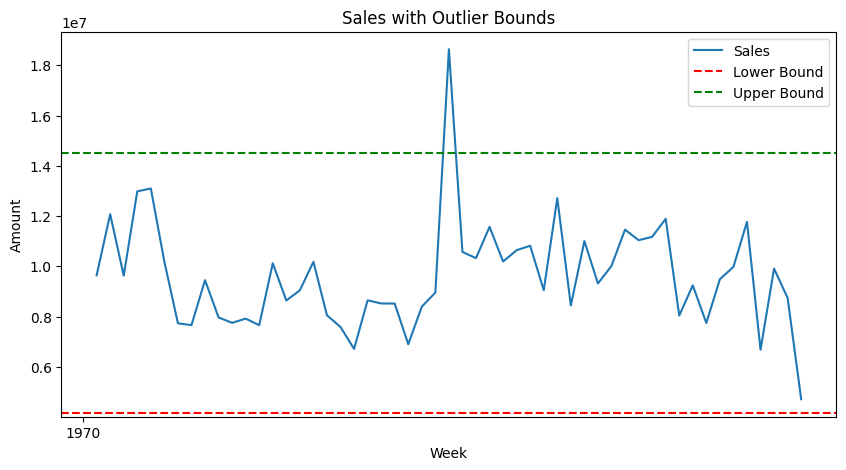

18:43:23 - cmdstanpy - INFO - Chain [1] start processing
18:43:23 - cmdstanpy - INFO - Chain [1] done processing
18:43:23 - cmdstanpy - INFO - Chain [1] start processing
18:43:23 - cmdstanpy - INFO - Chain [1] done processing
18:43:23 - cmdstanpy - INFO - Chain [1] start processing
18:43:23 - cmdstanpy - INFO - Chain [1] done processing
18:43:23 - cmdstanpy - INFO - Chain [1] start processing
18:43:24 - cmdstanpy - INFO - Chain [1] done processing
18:43:24 - cmdstanpy - INFO - Chain [1] start processing
18:43:24 - cmdstanpy - INFO - Chain [1] done processing
18:43:24 - cmdstanpy - INFO - Chain [1] start processing
18:43:24 - cmdstanpy - INFO - Chain [1] done processing
18:43:24 - cmdstanpy - INFO - Chain [1] start processing
18:43:24 - cmdstanpy - INFO - Chain [1] done processing
18:43:25 - cmdstanpy - INFO - Chain [1] start processing
18:43:25 - cmdstanpy - INFO - Chain [1] done processing
18:43:25 - cmdstanpy - INFO - Chain [1] start processing
18:43:25 - cmdstanpy - INFO - Chain [1]

Best Prophet Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0}
Test Set Mean Squared Error: 1.3408412150092554e+40
Predictions for last 10 rows: [[Timestamp('1970-01-04 00:00:00.000000043') 8.699567624808386e+18]
 [Timestamp('1970-01-11 00:00:00.000000043') 2.8998558749340324e+19]
 [Timestamp('1970-01-18 00:00:00.000000043') 4.929754987387154e+19]
 [Timestamp('1970-01-25 00:00:00.000000043') 6.959654099840473e+19]
 [Timestamp('1970-02-01 00:00:00.000000043') 8.989553212294036e+19]
 [Timestamp('1970-02-08 00:00:00.000000043') 1.1019452324747667e+20]
 [Timestamp('1970-02-15 00:00:00.000000043') 1.3049351437201184e+20]
 [Timestamp('1970-02-22 00:00:00.000000043') 1.507925054965459e+20]
 [Timestamp('1970-03-01 00:00:00.000000043') 1.7109149662108015e+20]
 [Timestamp('1970-03-08 00:00:00.000000043') 1.9139048774561533e+20]]
Actual values for last 10 rows: [ 8039886.22  9240613.6   7742729.68  9486679.75  9975442.91 11767936.91
  6679099.93  9907559.03  8738094.28  4

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

# 1. Load data
df = pd.read_csv('weekly_agg.csv', usecols=['InvoiceWeek', 'amount'])
df['ds'] = pd.to_datetime(df['InvoiceWeek'])
df = df.rename(columns={'amount': 'y'})

# 2. Find outliers using IQR
Q1 = df['y'].quantile(0.25)
Q3 = df['y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Plot outliers
plt.figure(figsize=(10, 5))
plt.plot(df['ds'], df['y'], label='Sales')
plt.axhline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axhline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.legend()
plt.title('Sales with Outlier Bounds')
plt.xlabel('Week')
plt.ylabel('Amount')
plt.show()

# 4. Cap outliers
df['y_capped'] = df['y'].clip(lower=lower_bound, upper=upper_bound)

# 5. Prophet expects columns 'ds' and 'y'
df_prophet = df[['ds', 'y_capped']].rename(columns={'y_capped': 'y'})

# 6. Split data: last 10 for test, rest for train
split_idx = len(df_prophet) - 10
train = df_prophet.iloc[:split_idx]
test = df_prophet.iloc[split_idx:]

# 7. Grid search for Prophet hyperparameters
param_grid = {
    'changepoint_prior_scale': [0.01, 0.05, 0.1],
    'seasonality_prior_scale': [1.0, 5.0, 10.0]
}
best_mse = float('inf')
best_params = None
best_model = None

for params in ParameterGrid(param_grid):
    model = Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False
    )
    model.fit(train)
    future = model.make_future_dataframe(periods=10, freq='W')
    forecast = model.predict(future)
    y_pred = forecast['yhat'].iloc[-10:].values
    mse = mean_squared_error(test['y'], y_pred)
    if mse < best_mse:
        best_mse = mse
        best_params = params
        best_model = model
        best_forecast = forecast

print("Best Prophet Params:", best_params)
print("Test Set Mean Squared Error:", best_mse)
print("Predictions for last 10 rows:", best_forecast[['ds', 'yhat']].tail(10).values)
print("Actual values for last 10 rows:", test['y'].values)

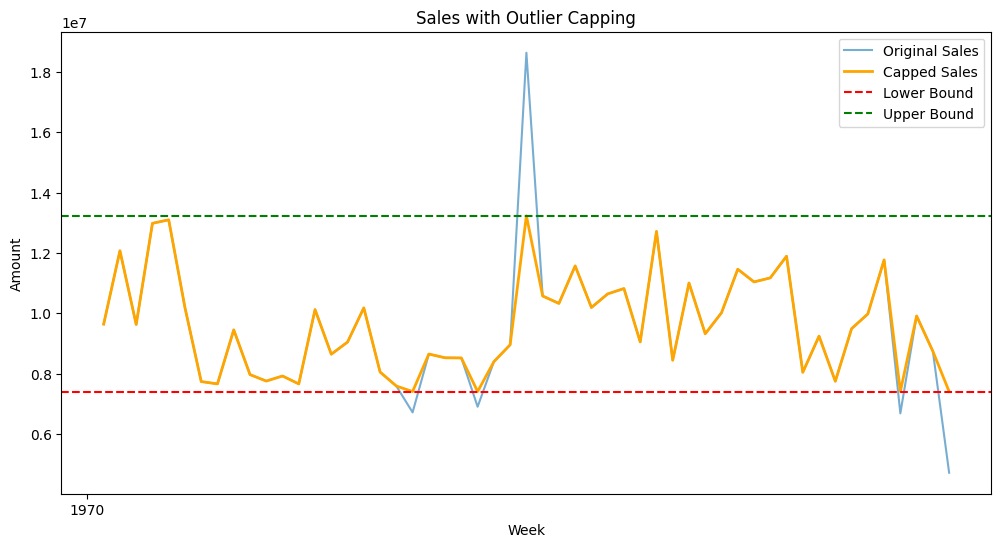

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('weekly_agg.csv', usecols=['InvoiceWeek', 'amount'])
df['ds'] = pd.to_datetime(df['InvoiceWeek'])
df = df.rename(columns={'amount': 'y'})

# Find outliers using IQR
Q1 = df['y'].quantile(0.25)
Q3 = df['y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 0.25 * IQR
upper_bound = Q3 + 1 * IQR

# Cap outliers
df['y_capped'] = df['y'].clip(lower=lower_bound, upper=upper_bound)

# Plot original and capped data
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='Original Sales', alpha=0.6)
plt.plot(df['ds'], df['y_capped'], label='Capped Sales', color='orange', linewidth=2)
plt.axhline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axhline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title('Sales with Outlier Capping')
plt.xlabel('Week')
plt.ylabel('Amount')
plt.legend()
plt.show()

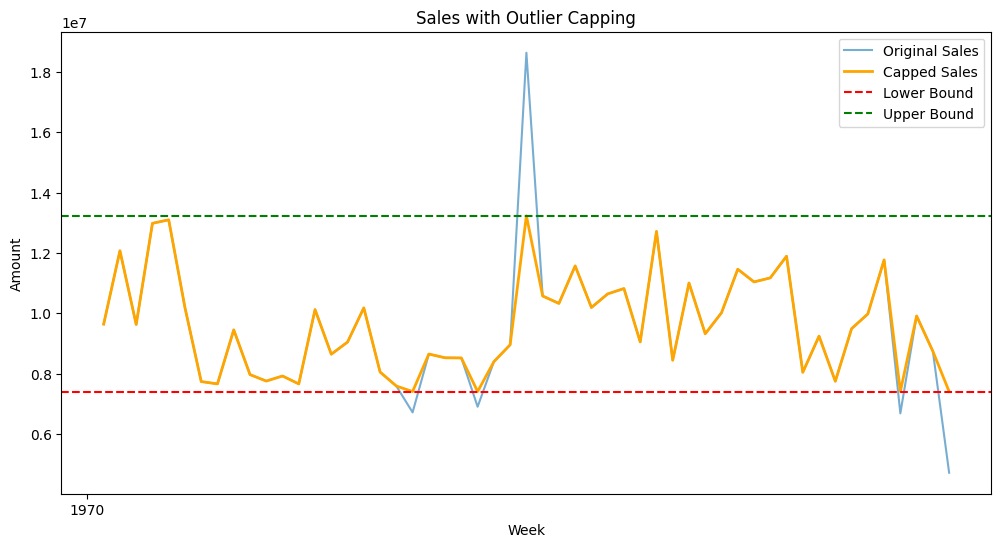

18:50:31 - cmdstanpy - INFO - Chain [1] start processing
18:50:31 - cmdstanpy - INFO - Chain [1] done processing
18:50:31 - cmdstanpy - INFO - Chain [1] start processing
18:50:31 - cmdstanpy - INFO - Chain [1] done processing
18:50:31 - cmdstanpy - INFO - Chain [1] start processing
18:50:32 - cmdstanpy - INFO - Chain [1] done processing
18:50:32 - cmdstanpy - INFO - Chain [1] start processing
18:50:32 - cmdstanpy - INFO - Chain [1] done processing
18:50:32 - cmdstanpy - INFO - Chain [1] start processing
18:50:32 - cmdstanpy - INFO - Chain [1] done processing
18:50:32 - cmdstanpy - INFO - Chain [1] start processing
18:50:33 - cmdstanpy - INFO - Chain [1] done processing
18:50:33 - cmdstanpy - INFO - Chain [1] start processing
18:50:33 - cmdstanpy - INFO - Chain [1] done processing
18:50:33 - cmdstanpy - INFO - Chain [1] start processing
18:50:33 - cmdstanpy - INFO - Chain [1] done processing
18:50:33 - cmdstanpy - INFO - Chain [1] start processing
18:50:34 - cmdstanpy - INFO - Chain [1]

Best Prophet Params: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10.0}
Test Set Mean Squared Error: 1.244727185617046e+40
Predictions for last 10 rows: [[Timestamp('1970-01-04 00:00:00.000000043') 8.381969580707105e+18]
 [Timestamp('1970-01-11 00:00:00.000000043') 2.7939898602336145e+19]
 [Timestamp('1970-01-18 00:00:00.000000043') 4.749782762396444e+19]
 [Timestamp('1970-01-25 00:00:00.000000043') 6.7055756645594735e+19]
 [Timestamp('1970-02-01 00:00:00.000000043') 8.661368566722747e+19]
 [Timestamp('1970-02-08 00:00:00.000000043') 1.0617161468886088e+20]
 [Timestamp('1970-02-15 00:00:00.000000043') 1.2572954371049318e+20]
 [Timestamp('1970-02-22 00:00:00.000000043') 1.4528747273212435e+20]
 [Timestamp('1970-03-01 00:00:00.000000043') 1.6484540175375565e+20]
 [Timestamp('1970-03-08 00:00:00.000000043') 1.8440333077538793e+20]]
Actual values for last 10 rows: [ 8039886.22    9240613.6     7742729.68    9486679.75    9975442.91
 11767936.91    7402541.0175  9907559.03  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv('dataset_weekly_283.csv', usecols=['InvoiceDate', 'amount'])
df['ds'] = pd.to_datetime(df['InvoiceDate'])
df = df.rename(columns={'amount': 'y'})

# Find outliers using IQR (custom bounds)
Q1 = df['y'].quantile(0.25)
Q3 = df['y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 0.25 * IQR
upper_bound = Q3 + 1 * IQR

# Cap outliers
df['y_capped'] = df['y'].clip(lower=lower_bound, upper=upper_bound)

# Plot original and capped data
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='Original Sales', alpha=0.6)
plt.plot(df['ds'], df['y_capped'], label='Capped Sales', color='orange', linewidth=2)
plt.axhline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axhline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title('Sales with Outlier Capping')
plt.xlabel('Week')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Prepare data for Prophet
df_prophet = df[['ds', 'y_capped']].rename(columns={'y_capped': 'y'})

# Split data: last 10 for test, rest for train
split_idx = len(df_prophet) - 10
train = df_prophet.iloc[:split_idx]
test = df_prophet.iloc[split_idx:]

# Grid search for Prophet hyperparameters
param_grid = {
    'changepoint_prior_scale': [0.01, 0.05, 0.1],
    'seasonality_prior_scale': [1.0, 5.0, 10.0]
}
best_mse = float('inf')
best_params = None
best_model = None
best_forecast = None

for params in ParameterGrid(param_grid):
    model = Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False
    )
    model.fit(train)
    future = model.make_future_dataframe(periods=10, freq='W')
    forecast = model.predict(future)
    y_pred = forecast['yhat'].iloc[-10:].values
    mse = mean_squared_error(test['y'], y_pred)
    if mse < best_mse:
        best_mse = mse
        best_params = params
        best_model = model
        best_forecast = forecast

print("Best Prophet Params:", best_params)
print("Test Set Mean Squared Error:", best_mse)
print("Predictions for last 10 rows:", best_forecast[['ds', 'yhat']].tail(10).values)
print("Actual values for last 10 rows:", test['y'].values)

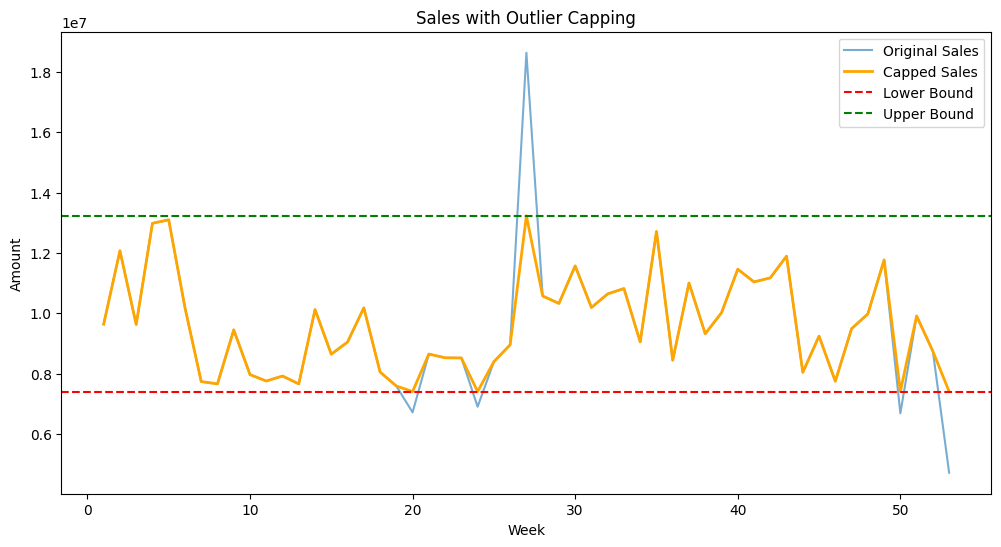

c:\Users\dazau\Downloads\Forecasting\.conda\Lib\site-packages\prophet\forecaster.py:290: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])


ValueError: Given date string "1" not likely a datetime, at position 0

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

# Load data (InvoiceWeek is just a sequential integer, no date conversion)
df = pd.read_csv('weekly_agg.csv', usecols=['InvoiceWeek', 'amount'])
df = df.rename(columns={'InvoiceWeek': 'ds', 'amount': 'y'})

# Find outliers using IQR (custom bounds)
Q1 = df['y'].quantile(0.25)
Q3 = df['y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 0.25 * IQR
upper_bound = Q3 + 1 * IQR

# Cap outliers
df['y_capped'] = df['y'].clip(lower=lower_bound, upper=upper_bound)

# Plot original and capped data
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='Original Sales', alpha=0.6)
plt.plot(df['ds'], df['y_capped'], label='Capped Sales', color='orange', linewidth=2)
plt.axhline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axhline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title('Sales with Outlier Capping')
plt.xlabel('Week')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Prepare data for Prophet (ds is week number, y is capped sales)
df_prophet = df[['ds', 'y_capped']].rename(columns={'y_capped': 'y'})

# Split data: last 10 for test, rest for train
split_idx = len(df_prophet) - 10
train = df_prophet.iloc[:split_idx]
test = df_prophet.iloc[split_idx:]

# Expanded grid search for Prophet hyperparameters
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
    'seasonality_prior_scale': [0.1, 1.0, 5.0, 10.0, 20.0, 50.0],
    'seasonality_mode': ['additive', 'multiplicative']
}
best_mse = float('inf')
best_params = None
best_model = None
best_forecast = None

for params in ParameterGrid(param_grid):
    model = Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        seasonality_mode=params['seasonality_mode'],
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False
    )
    model.fit(train)
    # Prophet expects 'ds' as a date, but here we use week numbers as sequential integers
    future = pd.DataFrame({'ds': range(train['ds'].min(), train['ds'].max() + 11)})
    forecast = model.predict(future)
    # Align predictions with test weeks
    forecast_last10 = forecast.set_index('ds').loc[test['ds']]
    y_pred = forecast_last10['yhat'].values
    mse = mean_squared_error(test['y'], y_pred)
    if mse < best_mse:
        best_mse = mse
        best_params = params
        best_model = model
        best_forecast = forecast_last10

print("Best Prophet Params:", best_params)
print("Test Set Mean Squared Error:", best_mse)
print("\nPredictions vs Actuals for last 10 weeks:")
result = pd.DataFrame({
    'Week': test['ds'].values,
    'Actual': test['y'].values,
    'Predicted': best_forecast['yhat'].values
})
print(result)

C:\Users\dazau\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


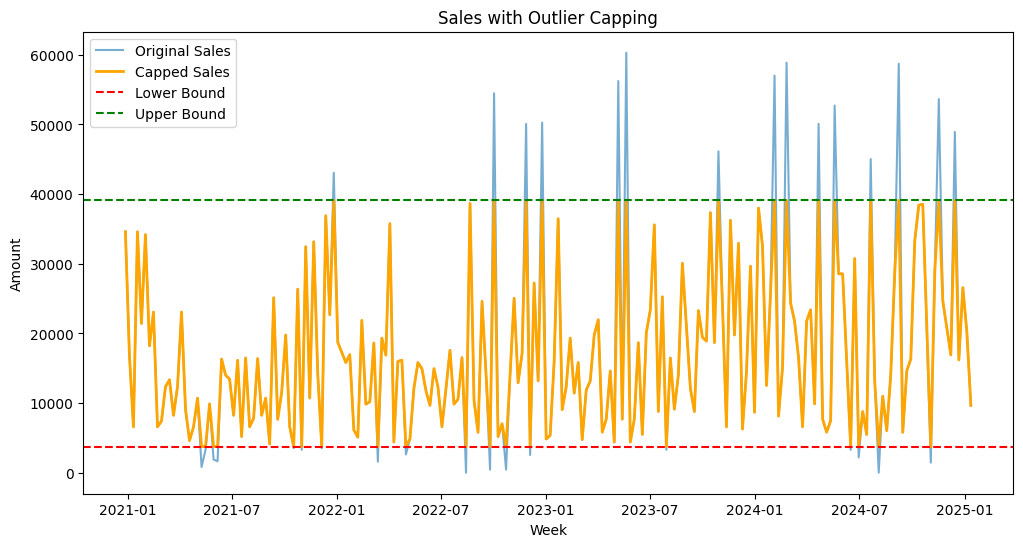

12:24:34 - cmdstanpy - INFO - Chain [1] start processing
12:24:34 - cmdstanpy - INFO - Chain [1] done processing
12:24:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:24:34 - cmdstanpy - INFO - Chain [1] start processing
12:24:35 - cmdstanpy - INFO - Chain [1] done processing
12:24:35 - cmdstanpy - INFO - Chain [1] start processing
12:24:35 - cmdstanpy - INFO - Chain [1] done processing
12:24:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:24:35 - cmdstanpy - INFO - Chain [1] start processing
12:24:35 - cmdstanpy - INFO - Chain [1] done processing
12:24:35 - cmdstanpy - INFO - Chain [1] start processing
12:24:35 - cmdstanpy - INFO - Chain [1] done processing
12:24:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

Best Prophet Params: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 20.0}
Test Set Mean Squared Error: 68325709.2887168

Predictions vs Actuals for last 10 rows:
        Date    Actual     Predicted
0 2024-11-10  28992.00  23875.557918
1 2024-11-17  39095.92  26269.692100
2 2024-11-24  24643.20  24710.574747
3 2024-12-01  20777.60  22318.567439
4 2024-12-08  16912.00  22937.048081
5 2024-12-15  39095.92  26250.916506
6 2024-12-22  16187.20  28305.976020
7 2024-12-29  26576.00  26541.089036
8 2025-01-05  20173.60  22901.230464
9 2025-01-12   9664.00  21265.147921


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv('dataset_weekly_283.csv', usecols=['invoiceDate', 'amount'])
df['ds'] = pd.to_datetime(df['invoiceDate'])
df = df.rename(columns={'amount': 'y'})

# Find outliers using IQR (custom bounds)
Q1 = df['y'].quantile(0.25)
Q3 = df['y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 0.25 * IQR
upper_bound = Q3 + 1 * IQR

# Cap outliers
df['y_capped'] = df['y'].clip(lower=lower_bound, upper=upper_bound)

# Plot original and capped data
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='Original Sales', alpha=0.6)
plt.plot(df['ds'], df['y_capped'], label='Capped Sales', color='orange', linewidth=2)
plt.axhline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axhline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title('Sales with Outlier Capping')
plt.xlabel('Week')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Prepare data for Prophet
df_prophet = df[['ds', 'y_capped']].rename(columns={'y_capped': 'y'})

# Split data: last 10 for test, rest for train
split_idx = len(df_prophet) - 10
train = df_prophet.iloc[:split_idx]
test = df_prophet.iloc[split_idx:]

# Grid search for Prophet hyperparameters
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
    'seasonality_prior_scale': [0.1, 1.0, 5.0, 10.0, 20.0, 50.0],
    'seasonality_mode': ['additive', 'multiplicative']
}
best_mse = float('inf')
best_params = None
best_model = None
best_forecast = None

for params in ParameterGrid(param_grid):
    model = Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        seasonality_mode=params['seasonality_mode'],
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False
    )
    model.fit(train)
    future = model.make_future_dataframe(periods=10, freq='W')
    forecast = model.predict(future)
    # Align predictions with test dates
    forecast_last10 = forecast.set_index('ds').loc[test['ds']]
    y_pred = forecast_last10['yhat'].values
    mse = mean_squared_error(test['y'], y_pred)
    if mse < best_mse:
        best_mse = mse
        best_params = params
        best_model = model
        best_forecast = forecast_last10

print("Best Prophet Params:", best_params)
print("Test Set Mean Squared Error:", best_mse)
print("\nPredictions vs Actuals for last 10 rows:")
result = pd.DataFrame({
    'Date': test['ds'].values,
    'Actual': test['y'].values,
    'Predicted': best_forecast['yhat'].values
})
print(result)

In [2]:
import pandas as pd
from prophet import Prophet
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv('dataset_weekly_283.csv', usecols=['invoiceDate', 'amount'])
df['ds'] = pd.to_datetime(df['invoiceDate'])
df = df.rename(columns={'amount': 'y'})

# Split data: last 10 for test, rest for train
split_idx = len(df) - 10
train = df.iloc[:split_idx]
test = df.iloc[split_idx:]

# Grid search for Prophet hyperparameters
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
    'seasonality_prior_scale': [0.1, 1.0, 5.0, 10.0, 20.0, 50.0],
    'seasonality_mode': ['additive', 'multiplicative']
}
best_mse = float('inf')
best_params = None
best_model = None
best_forecast = None

for params in ParameterGrid(param_grid):
    model = Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        seasonality_mode=params['seasonality_mode'],
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False
    )
    model.fit(train)
    future = model.make_future_dataframe(periods=10, freq='W')
    forecast = model.predict(future)
    # Align predictions with test dates
    forecast_last10 = forecast.set_index('ds').loc[test['ds']]
    y_pred = forecast_last10['yhat'].values
    mse = mean_squared_error(test['y'], y_pred)
    if mse < best_mse:
        best_mse = mse
        best_params = params
        best_model = model
        best_forecast = forecast_last10

print("Best Prophet Params:", best_params)
print("Test Set Mean Squared Error:", best_mse)
print("\nPredictions vs Actuals for last 10 rows:")
result = pd.DataFrame({
    'Date': test['ds'].values,
    'Actual': test['y'].values,
    'Predicted': best_forecast['yhat'].values
})
print(result)

12:27:37 - cmdstanpy - INFO - Chain [1] start processing
12:27:37 - cmdstanpy - INFO - Chain [1] done processing
12:27:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:27:37 - cmdstanpy - INFO - Chain [1] start processing
12:27:37 - cmdstanpy - INFO - Chain [1] done processing
12:27:37 - cmdstanpy - INFO - Chain [1] start processing
12:27:38 - cmdstanpy - INFO - Chain [1] done processing
12:27:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:27:38 - cmdstanpy - INFO - Chain [1] start processing
12:27:38 - cmdstanpy - INFO - Chain [1] done processing
12:27:38 - cmdstanpy - INFO - Chain [1] start processing
12:27:38 - cmdstanpy - INFO - Chain [1] done processing
12:27:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

Best Prophet Params: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}
Test Set Mean Squared Error: 157630951.49570805

Predictions vs Actuals for last 10 rows:
        Date   Actual     Predicted
0 2024-11-10  28992.0  27062.616290
1 2024-11-17  53635.2  30042.450619
2 2024-11-24  24643.2  28386.784242
3 2024-12-01  20777.6  25469.833584
4 2024-12-08  16912.0  25926.059294
5 2024-12-15  48924.0  29764.837475
6 2024-12-22  16187.2  32472.757938
7 2024-12-29  26576.0  30721.983334
8 2025-01-05  20173.6  26412.686174
9 2025-01-12   9664.0  24164.901560


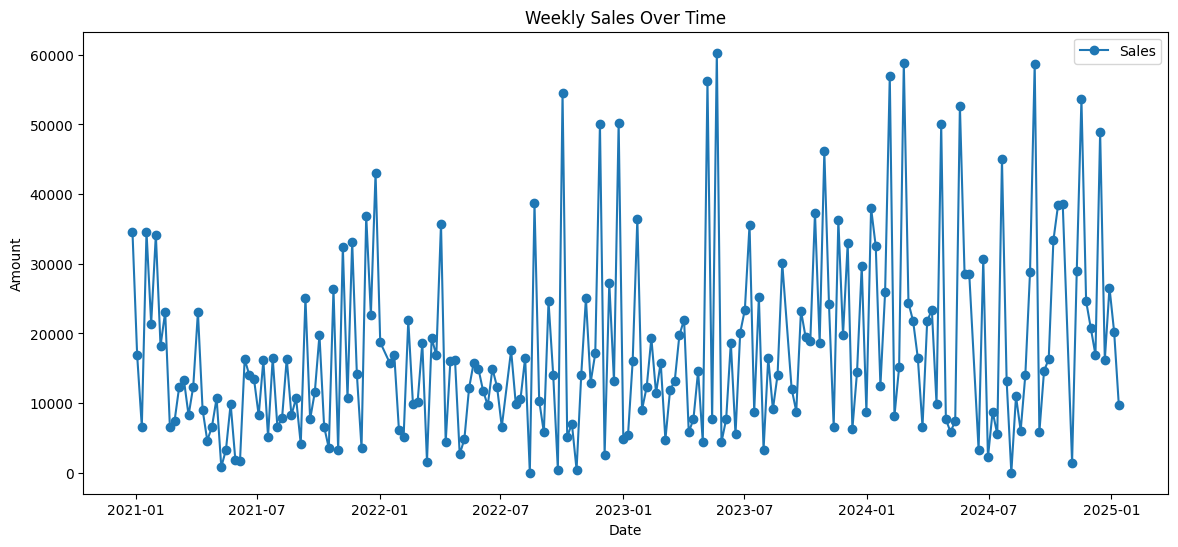

12:35:05 - cmdstanpy - INFO - Chain [1] start processing
12:35:05 - cmdstanpy - INFO - Chain [1] done processing
12:35:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:35:05 - cmdstanpy - INFO - Chain [1] start processing
12:35:06 - cmdstanpy - INFO - Chain [1] done processing
12:35:06 - cmdstanpy - INFO - Chain [1] start processing
12:35:06 - cmdstanpy - INFO - Chain [1] done processing
12:35:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:35:06 - cmdstanpy - INFO - Chain [1] start processing
12:35:06 - cmdstanpy - INFO - Chain [1] done processing
12:35:06 - cmdstanpy - INFO - Chain [1] start processing
12:35:06 - cmdstanpy - INFO - Chain [1] done processing
12:35:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

Best Prophet Params: {'changepoint_prior_scale': 1.0, 'changepoint_range': 0.95, 'interval_width': 0.8, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 20.0}
Test Set Mean Squared Error (MSE): 149898811.63733315
Test Set Symmetric Mean Absolute Percentage Error (SMAP): 9840.634104015684

Predictions vs Actuals for last 10 rows:
        Date   Actual     Predicted
0 2024-11-10  28992.0  26362.727148
1 2024-11-17  53635.2  30338.300341
2 2024-11-24  24643.2  29115.181202
3 2024-12-01  20777.6  25445.322962
4 2024-12-08  16912.0  24764.816756
5 2024-12-15  48924.0  28032.371240
6 2024-12-22  16187.2  30748.642016
7 2024-12-29  26576.0  29031.897935
8 2025-01-05  20173.6  24670.832391
9 2025-01-12   9664.0  22745.446507


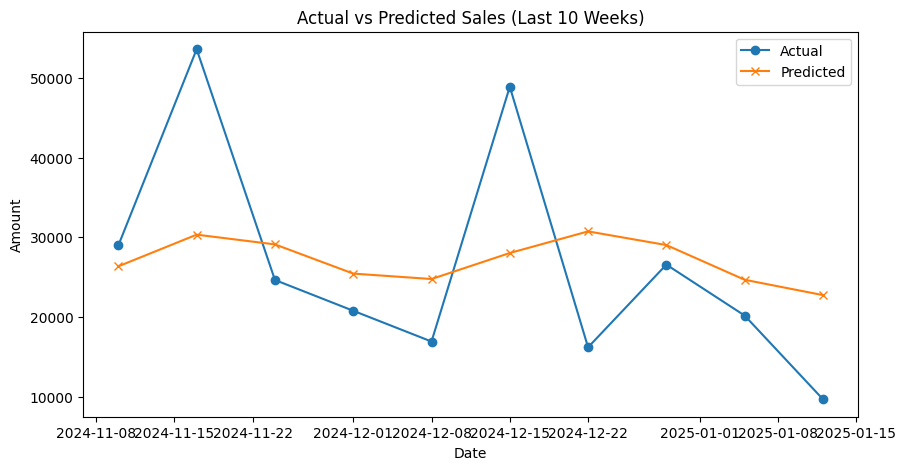

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load data
df = pd.read_csv('dataset_weekly_283.csv', usecols=['invoiceDate', 'amount'])
df['ds'] = pd.to_datetime(df['invoiceDate'])
df = df.rename(columns={'amount': 'y'})

# Plot the original data
plt.figure(figsize=(14, 6))
plt.plot(df['ds'], df['y'], marker='o', label='Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Split data: last 10 for test, rest for train
split_idx = len(df) - 10
train = df.iloc[:split_idx]
test = df.iloc[split_idx:]

# Expanded grid search for Prophet hyperparameters
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8, 0.9, 0.95],
    'interval_width': [0.8, 0.9, 0.95]
}
best_mse = float('inf')
best_smap = float('inf')
best_params = None
best_model = None
best_forecast = None

for params in ParameterGrid(param_grid):
    model = Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        seasonality_mode=params['seasonality_mode'],
        changepoint_range=params['changepoint_range'],
        interval_width=params['interval_width'],
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False
    )
    model.fit(train)
    future = model.make_future_dataframe(periods=10, freq='W')
    forecast = model.predict(future)
    # Align predictions with test dates
    forecast_last10 = forecast.set_index('ds').loc[test['ds']]
    y_pred = forecast_last10['yhat'].values
    mse = mean_squared_error(test['y'], y_pred)
    smap = mean_absolute_error(test['y'], y_pred)
    if mse < best_mse:
        best_mse = mse
        best_smap = smap
        best_params = params
        best_model = model
        best_forecast = forecast_last10

print("Best Prophet Params:", best_params)
print("Test Set Mean Squared Error (MSE):", best_mse)
print("Test Set Symmetric Mean Absolute Percentage Error (SMAP):", best_smap)
print("\nPredictions vs Actuals for last 10 rows:")
result = pd.DataFrame({
    'Date': test['ds'].values,
    'Actual': test['y'].values,
    'Predicted': best_forecast['yhat'].values
})
print(result)

# Plot actual vs predicted for last 10 rows
plt.figure(figsize=(10, 5))
plt.plot(result['Date'], result['Actual'], marker='o', label='Actual')
plt.plot(result['Date'], result['Predicted'], marker='x', label='Predicted')
plt.title('Actual vs Predicted Sales (Last 10 Weeks)')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [4]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 3.1/150.0 MB 20.5 MB/s eta 0:00:08
   -- ------------------------------------- 8.9/150.0 MB 24.0 MB/s eta 0:00:06
   --- ------------------------------------ 14.2/150.0 MB 24.0 MB/s eta 0:00:06
   ----- ---------------------------------- 19.1/150.0 MB 24.1 MB/s eta 0:00:06
   ------ --------------------------------- 24.4/150.0 MB 24.1 MB/s eta 0:00:06
   ------- -------------------------------- 28.8/150.0 MB 24.1 MB/s eta 0:00:06
   --------- ------------------------------ 34.6/150.0 MB 23.9 MB/s eta 0:00:05
   ---------- ----------------------------- 39.6/150.0 MB 24.0 MB/s eta 0:00:05
   ----------- ---------------------------- 44.6/150.0 MB 23.8 MB/s eta 0:00:05
   ------------- -------------------------- 49.8/150.0 MB 24.0 MB/s eta 0:00:05
   -------------- ------------------------- 55.1/150.0 MB 

In [5]:
conda install -c conda-forge py-xgboost

Retrieving notices: done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\dazau\Downloads\Forecasting\.conda

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |            2_gnu          48 KB  conda-forge
    cuda-version-12.9          |       h4f385c5_3          21 KB  conda-forge
    intel-openmp-2024.2.1      |    h57928b3_1083         1.8 MB  conda-forge
    joblib-1.5.1               |     pyhd8ed1ab_0         219 KB  conda-forge
    libblas-3.9.0              |  32_h641d27c_mkl         3.6 MB  conda-forge
    libcblas-3.9.0             |  32_h5e41251_mkl         3.6 MB  conda-forge
    libgomp-15.1.0             |       h1383e82_3         523 KB  conda-forge
    libhwloc-2.11.2            |default_ha69328c_1001    

Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001F3ABCB4350>, 'Connection to repo.anaconda.com timed out. (connect timeout=5)')': /pkgs/msys2/notices.json

Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001F3ABC93320>, 'Connection to repo.anaconda.com timed out. (connect timeout=5)')': /pkgs/msys2/notices.json

Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001F3ABC926C0>, 'Connection to repo.anaconda.com timed out. (connect timeout=5)')': /pkgs/r/notices.json

Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ConnectTimeoutError(<urllib3.conn

In [6]:
from xgboost import XGBClassifier
# read data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.2)
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)
print(preds)

[2 1 1 0 2 1 0 0 0 0 0 2 2 2 0 2 1 1 0 2 2 1 0 1 0 1 1 1 1 0]


In [3]:
!pip install pandas xgboost scikit-learn matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Training the model (early stopping removed for compatibility)...
Model training complete.
Length of test data: 55
Root Mean Squared Error (RMSE) on Test Set: 88,711.91
Symmetric Mean Absolute Percentage Error (SMAPE): 199.62%


C:\Users\dazau\AppData\Local\Temp\ipykernel_38048\4291396846.py:1574: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction'] = reg.predict(X_test)


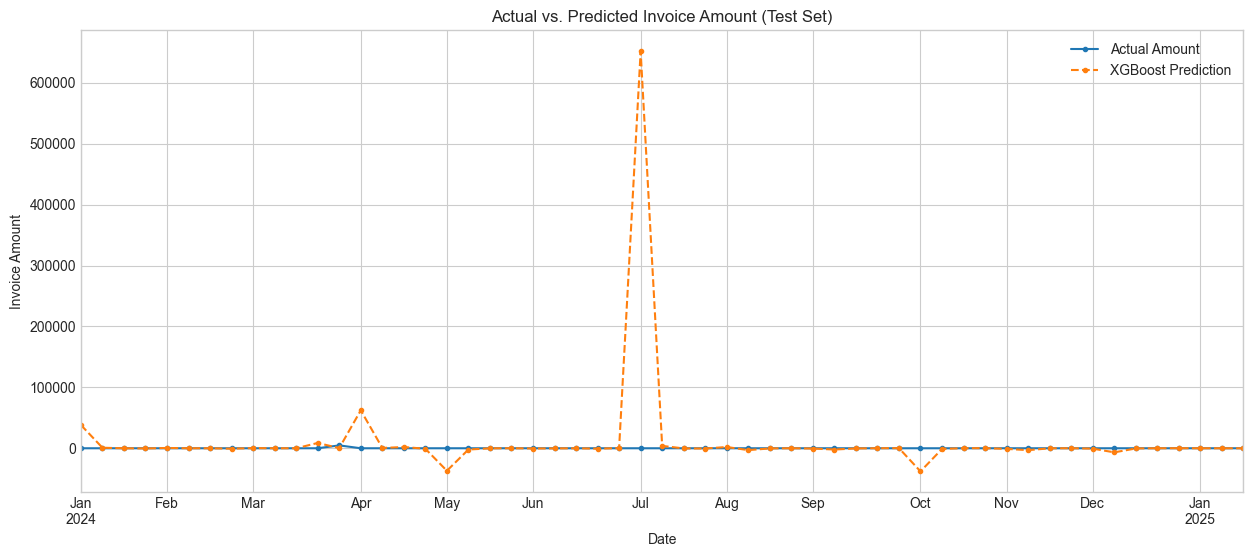

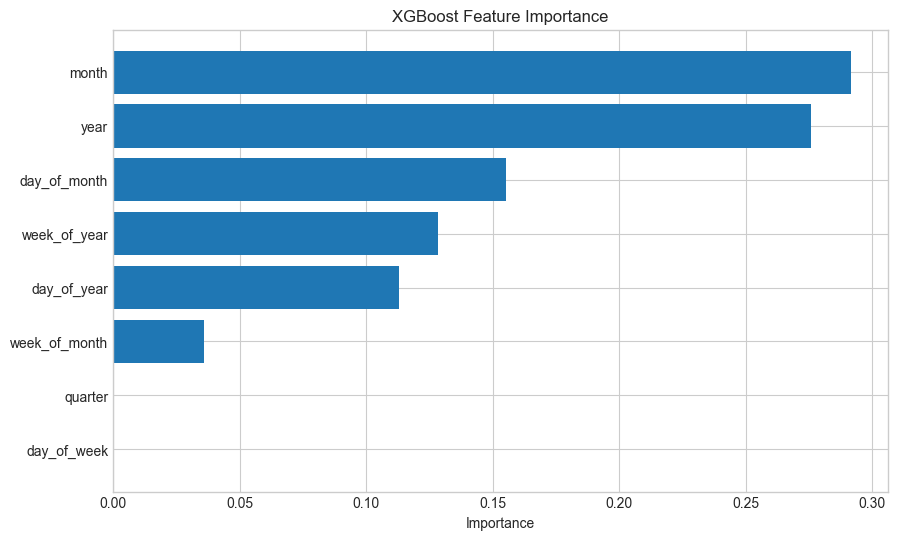


Feature Importance:
         Feature  Importance
1          month    0.291675
0           year    0.275759
4   day_of_month    0.155347
2   week_of_year    0.128266
3    day_of_year    0.112955
7  week_of_month    0.035930
6        quarter    0.000068
5    day_of_week    0.000000


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import io

# --- 1. Load the Data ---
# Using io.StringIO to read the text data you provided as if it were a file
csv_data = """invoiceDate,amount
2021-01-01,437149.38
2021-01-02,1339262.26
2021-01-03,0.0
2021-01-04,561277.74
2021-01-05,1170126.46
2021-01-06,286603.24
2021-01-07,517177.68
2021-01-08,454866.08
2021-01-09,305423.08
2021-01-10,0.0
2021-01-11,376609.0
2021-01-12,389359.6
2021-01-13,671167.9
2021-01-14,0.0
2021-01-15,495097.9
2021-01-16,383186.0
2021-01-17,0.0
2021-01-18,1609278.98
2021-01-19,872979.66
2021-01-20,478284.58
2021-01-21,616486.78
2021-01-22,233833.34
2021-01-23,526787.62
2021-01-24,0.0
2021-01-25,955337.62
2021-01-26,701453.34
2021-01-27,625397.14
2021-01-28,354385.42
2021-01-29,296617.1
2021-01-30,348898.56
2021-01-31,0.0
2021-02-01,1265102.34
2021-02-02,1126755.14
2021-02-03,1067952.84
2021-02-04,771249.86
2021-02-05,367524.28
2021-02-06,482560.32
2021-02-07,0.0
2021-02-08,379877.16
2021-02-09,572553.82
2021-02-10,284436.24
2021-02-11,1063770.3
2021-02-12,1017971.76
2021-02-13,313217.52
2021-02-14,0.0
2021-02-15,424623.66
2021-02-16,330705.6
2021-02-17,137480.66
2021-02-18,1565794.02
2021-02-19,164819.1
2021-02-20,929302.42
2021-02-21,0.0
2021-02-22,752361.56
2021-02-23,635010.38
2021-02-24,975871.1
2021-02-25,358584.24
2021-02-26,722107.4
2021-02-27,291793.2
2021-02-28,0.0
2021-03-01,313019.96
2021-03-02,434079.84
2021-03-03,2090224.8
2021-03-04,558269.24
2021-03-05,857905.46
2021-03-06,658244.48
2021-03-07,0.0
2021-03-08,337066.86
2021-03-09,318632.8
2021-03-10,393981.1
2021-03-11,425082.54
2021-03-12,413736.86
2021-03-13,540616.28
2021-03-14,0.0
2021-03-15,434498.26
2021-03-16,862226.9
2021-03-17,376265.38
2021-03-18,1008199.28
2021-03-19,983473.7
2021-03-20,974257.32
2021-03-21,0.0
2021-03-22,522103.36
2021-03-23,701660.44
2021-03-24,118054.04
2021-03-25,150221.04
2021-03-26,172241.4
2021-03-27,1154571.52
2021-03-28,0.0
2021-03-29,0.0
2021-03-30,74547.0
2021-03-31,308546.5
2021-04-01,1301902.2
2021-04-02,1246711.52
2021-04-03,2050048.18
2021-04-04,0.0
2021-04-05,1224406.78
2021-04-06,1069625.56
2021-04-07,533960.16
2021-04-08,543520.5
2021-04-09,718219.04
2021-04-10,506106.28
2021-04-11,0.0
2021-04-12,518801.4
2021-04-13,1152587.2
2021-04-14,530754.82
2021-04-15,716236.34
2021-04-16,502666.22
2021-04-17,495389.28
2021-04-18,0.0
2021-04-19,739101.18
2021-04-20,650420.72
2021-04-21,525937.04
2021-04-22,818987.6
2021-04-23,333247.92
2021-04-24,429322.82
2021-04-25,0.0
2021-04-26,221401.2
2021-04-27,515902.42
2021-04-28,671819.32
2021-04-29,455464.06
2021-04-30,1068747.28
2021-05-01,734796.2
2021-05-02,0.0
2021-05-03,855225.74
2021-05-04,360695.4
2021-05-05,328466.46
2021-05-06,480603.2
2021-05-07,415338.56
2021-05-08,402453.64
2021-05-09,0.0
2021-05-10,526431.58
2021-05-11,201550.1
2021-05-12,196962.0
2021-05-13,758212.34
2021-05-14,192466.72
2021-05-15,268645.48
2021-05-16,0.0
2021-05-17,714865.66
2021-05-18,0.0
2021-05-19,800388.52
2021-05-20,861524.24
2021-05-21,204958.2
2021-05-22,243658.24
2021-05-23,0.0
2021-05-24,464985.8
2021-05-25,1012906.7
2021-05-26,405128.78
2021-05-27,1256813.64
2021-05-28,601507.18
2021-05-29,351656.82
2021-05-30,0.0
2021-05-31,102824.02
2021-06-01,780459.88
2021-06-02,784973.66
2021-06-03,344246.9
2021-06-04,356164.22
2021-06-05,649156.34
2021-06-06,0.0
2021-06-07,322540.66
2021-06-08,358338.24
2021-06-09,325917.92
2021-06-10,459020.04
2021-06-11,330384.44
2021-06-12,460034.24
2021-06-13,0.0
2021-06-14,1145986.5
2021-06-15,775930.12
2021-06-16,868944.84
2021-06-17,790697.34
2021-06-18,467609.58
2021-06-19,509341.3
2021-06-20,0.0
2021-06-21,614357.78
2021-06-22,358575.76
2021-06-23,641355.5
2021-06-24,608023.36
2021-06-25,1322428.1
2021-06-26,704622.18
2021-06-27,0.0
2021-06-28,1160468.54
2021-06-29,408911.24
2021-06-30,14953139.78
2021-07-01,573131.42
2021-07-02,1493647.66
2021-07-03,718589.42
2021-07-04,0.0
2021-07-05,1270432.24
2021-07-06,641047.28
2021-07-07,1097837.6
2021-07-08,430951.92
2021-07-09,611506.38
2021-07-10,981656.86
2021-07-11,0.0
2021-07-12,1005212.76
2021-07-13,1376281.54
2021-07-14,613327.62
2021-07-15,824235.96
2021-07-16,1151489.52
2021-07-17,725788.4
2021-07-18,0.0
2021-07-19,427038.38
2021-07-20,892175.1
2021-07-21,734670.08
2021-07-22,774840.54
2021-07-23,270344.08
2021-07-24,661340.62
2021-07-25,0.0
2021-07-26,705621.3
2021-07-27,1058085.5
2021-07-28,631789.26
2021-07-29,625973.8
2021-07-30,460848.06
2021-07-31,405236.8
2021-08-01,0.0
2021-08-02,221916.54
2021-08-03,698336.18
2021-08-04,1661870.66
2021-08-05,1416114.1
2021-08-06,1245313.1
2021-08-07,806880.64
2021-08-08,0.0
2021-08-09,955705.86
2021-08-10,315212.16
2021-08-11,767839.26
2021-08-12,609223.04
2021-08-13,730746.44
2021-08-14,580721.02
2021-08-15,0.0
2021-08-16,623702.5
2021-08-17,472905.98
2021-08-18,512510.06
2021-08-19,927055.28
2021-08-20,339993.6
2021-08-21,1100895.9
2021-08-22,0.0
2021-08-23,854661.54
2021-08-24,1599485.12
2021-08-25,1904518.72
2021-08-26,1173182.42
2021-08-27,109377.04
2021-08-28,0.0
2021-08-29,0.0
2021-08-30,0.0
2021-08-31,0.0
2021-09-01,754660.54
2021-09-02,1473437.14
2021-09-03,592661.72
2021-09-04,298963.22000000003
2021-09-05,0.0
2021-09-06,388895.46
2021-09-07,1263267.54
2021-09-08,836999.0
2021-09-09,573026.64
2021-09-10,913412.0
2021-09-11,367742.1
2021-09-12,0.0
2021-09-13,0.0
2021-09-14,956762.16
2021-09-15,1914107.84
2021-09-16,582969.7
2021-09-17,1158073.52
2021-09-18,319164.8
2021-09-19,0.0
2021-09-20,195256.2
2021-09-21,885907.76
2021-09-22,427440.62
2021-09-23,978548.54
2021-09-24,396570.84
2021-09-25,425848.08
2021-09-26,0.0
2021-09-27,988236.54
2021-09-28,585589.4
2021-09-29,1167001.4
2021-09-30,131573.0
2021-10-01,1035979.84
2021-10-02,686465.0
2021-10-03,0.0
2021-10-04,654085.78
2021-10-05,741501.58
2021-10-06,1019683.62
2021-10-07,958497.7
2021-10-08,1421155.7
2021-10-09,481334.54
2021-10-10,0.0
2021-10-11,380258.08
2021-10-12,419626.46
2021-10-13,1369169.3
2021-10-14,508381.04
2021-10-15,470201.72
2021-10-16,824881.32
2021-10-17,0.0
2021-10-18,846569.2
2021-10-19,584049.2
2021-10-20,690558.48
2021-10-21,306687.32
2021-10-22,946327.24
2021-10-23,1071188.14
2021-10-24,0.0
2021-10-25,887759.68
2021-10-26,1387583.2
2021-10-27,1726919.76
2021-10-28,1044883.8
2021-10-29,1037216.78
2021-10-30,958513.86
2021-10-31,0.0
2021-11-01,357261.4
2021-11-02,153684.32
2021-11-03,0.0
2021-11-04,0.0
2021-11-05,0.0
2021-11-06,0.0
2021-11-07,0.0
2021-11-08,0.0
2021-11-09,666848.54
2021-11-10,1574727.22
2021-11-11,1309925.56
2021-11-12,587280.7
2021-11-13,620150.68
2021-11-14,0.0
2021-11-15,113157.84
2021-11-16,1338310.78
2021-11-17,718273.2
2021-11-18,303601.26
2021-11-19,225465.54
2021-11-20,350474.38
2021-11-21,0.0
2021-11-22,896559.66
2021-11-23,181114.0
2021-11-24,1386354.1
2021-11-25,1605184.7
2021-11-26,328084.8
2021-11-27,651314.02
2021-11-28,0.0
2021-11-29,405243.8
2021-11-30,798558.6
2021-12-01,930693.8
2021-12-02,713774.38
2021-12-03,637760.42
2021-12-04,461370.68
2021-12-05,0.0
2021-12-06,374524.4
2021-12-07,448530.24
2021-12-08,284811.22
2021-12-09,311783.74
2021-12-10,624545.48
2021-12-11,266163.42
2021-12-12,0.0
2021-12-13,325219.1
2021-12-14,603286.24
2021-12-15,1024329.44
2021-12-16,884277.86
2021-12-17,973527.88
2021-12-18,359129.44
2021-12-19,0.0
2021-12-20,915085.58
2021-12-21,848353.44
2021-12-22,244404.18
2021-12-23,586746.92
2021-12-24,280053.3
2021-12-25,1033046.36
2021-12-26,0.0
2021-12-27,1156284.26
2021-12-28,815664.44
2021-12-29,570762.68
2021-12-30,726697.0
2021-12-31,160490.28
2022-01-01,1357060.9
2022-01-02,0.0
2022-01-03,884623.42
2022-01-04,1248610.9
2022-01-05,431640.94
2022-01-06,439562.72
2022-01-07,841381.88
2022-01-08,1362413.96
2022-01-09,0.0
2022-01-10,486547.98
2022-01-11,497379.1
2022-01-12,254637.24
2022-01-13,1411695.46
2022-01-14,0.0
2022-01-15,1046047.16
2022-01-16,0.0
2022-01-17,1143786.34
2022-01-18,776678.02
2022-01-19,547890.86
2022-01-20,1166419.32
2022-01-21,436608.7
2022-01-22,232511.08
2022-01-23,0.0
2022-01-24,1266690.24
2022-01-25,766967.96
2022-01-26,253246.74
2022-01-27,796070.98
2022-01-28,391605.06
2022-01-29,1673776.06
2022-01-30,0.0
2022-01-31,369113.62
2022-02-01,745943.04
2022-02-02,585079.14
2022-02-03,467815.04
2022-02-04,464571.68
2022-02-05,129678.4
2022-02-06,0.0
2022-02-07,672182.06
2022-02-08,203775.88
2022-02-09,473667.54
2022-02-10,277145.54
2022-02-11,420692.18
2022-02-12,757407.28
2022-02-13,0.0
2022-02-14,642466.28
2022-02-15,437670.6
2022-02-16,1038272.04
2022-02-17,388882.5
2022-02-18,206145.9
2022-02-19,1104497.16
2022-02-20,0.0
2022-02-21,563880.08
2022-02-22,947623.1
2022-02-23,488873.0
2022-02-24,332376.5
2022-02-25,401422.68
2022-02-26,1061498.72
2022-02-27,0.0
2022-02-28,205070.5
2022-03-01,865086.96
2022-03-02,502088.6
2022-03-03,274891.8
2022-03-04,394777.9
2022-03-05,678919.32
2022-03-06,0.0
2022-03-07,500623.42
2022-03-08,690797.14
2022-03-09,582807.54
2022-03-10,761745.42
2022-03-11,304725.76
2022-03-12,1552891.4
2022-03-13,0.0
2022-03-14,1240115.28
2022-03-15,295416.56
2022-03-16,322203.84
2022-03-17,138177.1
2022-03-18,0.0
2022-03-19,262517.96
2022-03-20,0.0
2022-03-21,1647256.04
2022-03-22,1280793.84
2022-03-23,700815.92
2022-03-24,236823.6
2022-03-25,78185.96
2022-03-26,508291.86
2022-03-27,0.0
2022-03-28,629536.04
2022-03-29,171252.62
2022-03-30,48973.3
2022-03-31,229833.84
2022-04-01,919087.76
2022-04-02,3320887.82
2022-04-03,0.0
2022-04-04,1043017.64
2022-04-05,1047773.24
2022-04-06,481646.06
2022-04-07,325366.72
2022-04-08,545496.7
2022-04-09,2346578.88
2022-04-10,0.0
2022-04-11,293620.58
2022-04-12,794470.92
2022-04-13,326095.46
2022-04-14,1017681.96
2022-04-15,556917.28
2022-04-16,575324.14
2022-04-17,0.0
2022-04-18,349299.86
2022-04-19,616225.92
2022-04-20,1032542.56
2022-04-21,458432.8
2022-04-22,224394.72
2022-04-23,2259982.02
2022-04-24,70004.7
2022-04-25,413105.9
2022-04-26,927678.8
2022-04-27,644608.34
2022-04-28,624322.84
2022-04-29,264610.14
2022-04-30,460334.58
2022-05-01,0.0
2022-05-02,584834.42
2022-05-03,443899.84
2022-05-04,199323.56
2022-05-05,1355061.6
2022-05-06,354794.2
2022-05-07,683862.32
2022-05-08,0.0
2022-05-09,1083019.26
2022-05-10,435482.68
2022-05-11,281107.28
2022-05-12,368908.72
2022-05-13,206678.46
2022-05-14,837761.48
2022-05-15,0.0
2022-05-16,766109.84
2022-05-17,879106.5
2022-05-18,993652.02
2022-05-19,327029.26
2022-05-20,938183.22
2022-05-21,355691.5
2022-05-22,0.0
2022-05-23,361580.2
2022-05-24,519059.54
2022-05-25,1220709.28
2022-05-26,426518.3
2022-05-27,1509653.72
2022-05-28,825378.26
2022-05-29,0.0
2022-05-30,300111.34
2022-05-31,18964.0
2022-06-01,1156190.64
2022-06-02,579119.0
2022-06-03,814691.98
2022-06-04,1543818.04
2022-06-05,0.0
2022-06-06,924436.56
2022-06-07,569570.02
2022-06-08,947032.18
2022-06-09,385334.26
2022-06-10,401734.1
2022-06-11,653449.62
2022-06-12,0.0
2022-06-13,875682.18
2022-06-14,248977.8
2022-06-15,1241652.5
2022-06-16,595506.12
2022-06-17,606136.8
2022-06-18,682414.1
2022-06-19,0.0
2022-06-20,606677.18
2022-06-21,323911.6
2022-06-22,829009.8
2022-06-23,959421.84
2022-06-24,664459.08
2022-06-25,445145.82
2022-06-26,0.0
2022-06-27,1010954.1
2022-06-28,2780570.42
2022-06-29,723972.76
2022-06-30,50961.2
2022-07-01,852529.12
2022-07-02,432184.64
2022-07-03,0.0
2022-07-04,493403.8
2022-07-05,921352.44
2022-07-06,729420.76
2022-07-07,1130162.04
2022-07-08,872558.46
2022-07-09,1092845.94
2022-07-10,0.0
2022-07-11,1293454.58
2022-07-12,435563.78
2022-07-13,642128.58
2022-07-14,548435.12
2022-07-15,451237.12
2022-07-16,519652.12
2022-07-17,0.0
2022-07-18,1339371.0
2022-07-19,1478146.66
2022-07-20,1569856.48
2022-07-21,580171.52
2022-07-22,215228.88
2022-07-23,446758.82
2022-07-24,0.0
2022-07-25,1272900.8
2022-07-26,1100353.34
2022-07-27,1765389.68
2022-07-28,398516.52
2022-07-29,954041.58
2022-07-30,249201.4
2022-07-31,0.0
2022-08-01,440398.14
2022-08-02,2094196.88
2022-08-03,1198246.84
2022-08-04,449276.6
2022-08-05,673743.38
2022-08-06,507569.52
2022-08-07,1643637.56
2022-08-08,364066.2
2022-08-09,259382.32
2022-08-10,1335029.26
2022-08-11,206426.18
2022-08-12,662093.9
2022-08-13,1316602.44
2022-08-14,41723.2
2022-08-15,653665.52
2022-08-16,875590.86
2022-08-17,460450.2
2022-08-18,0.0
2022-08-19,0.0
2022-08-20,0.0
2022-08-21,0.0
2022-08-22,1851980.9
2022-08-23,935728.4
2022-08-24,2421114.5
2022-08-25,949436.42
2022-08-26,496283.16
2022-08-27,794081.4
2022-08-28,0.0
2022-08-29,610894.66
2022-08-30,363003.44
2022-08-31,187516.3
2022-09-01,1500359.68
2022-09-02,1041228.28
2022-09-03,344980.98
2022-09-04,0.0
2022-09-05,989188.54
2022-09-06,694212.24
2022-09-07,786712.74
2022-09-08,313449.36
2022-09-09,320964.18
2022-09-10,487245.22
2022-09-11,0.0
2022-09-12,319784.26
2022-09-13,1564518.3
2022-09-14,362657.12
2022-09-15,319657.1
2022-09-16,1148660.26
2022-09-17,1932921.32
2022-09-18,0.0
2022-09-19,1799899.44
2022-09-20,618114.94
2022-09-21,315940.0
2022-09-22,278570.3
2022-09-23,580399.84
2022-09-24,806039.62
2022-09-25,0.0
2022-09-26,1430004.48
2022-09-27,593831.82
2022-09-28,476597.24
2022-09-29,905199.24
2022-09-30,449631.1
2022-10-01,1255397.6
2022-10-02,0.0
2022-10-03,2522681.6
2022-10-04,899439.0
2022-10-05,784387.02
2022-10-06,159600.76
2022-10-07,512133.78
2022-10-08,1330934.4
2022-10-09,0.0
2022-10-10,780698.94
2022-10-11,1326589.46
2022-10-12,268337.36
2022-10-13,336177.14
2022-10-14,187759.92
2022-10-15,763883.82
2022-10-16,0.0
2022-10-17,1219509.4
2022-10-18,1635349.18
2022-10-19,999599.4
2022-10-20,1389848.98
2022-10-21,653431.8
2022-10-22,0.0
2022-10-23,0.0
2022-10-24,0.0
2022-10-25,0.0
2022-10-26,0.0
2022-10-27,0.0
2022-10-28,897419.12
2022-10-29,509945.1
2022-10-30,0.0
2022-10-31,486313.38
2022-11-01,546762.7
2022-11-02,1044174.06
2022-11-03,1015955.32
2022-11-04,1936442.8
2022-11-05,188375.24
2022-11-06,0.0
2022-11-07,740092.34
2022-11-08,736468.02
2022-11-09,602945.54
2022-11-10,1107746.34
2022-11-11,618013.8
2022-11-12,459079.2
2022-11-13,0.0
2022-11-14,567222.1
2022-11-15,1679373.18
2022-11-16,762068.56
2022-11-17,241104.4
2022-11-18,337434.76
2022-11-19,609552.46
2022-11-20,0.0
2022-11-21,877243.3
2022-11-22,2866221.14
2022-11-23,1014193.68
2022-11-24,704029.1
2022-11-25,421646.66
2022-11-26,501762.5
2022-11-27,0.0
2022-11-28,1204794.66
2022-11-29,1771569.62
2022-11-30,250040.6
2022-12-01,2085571.82
2022-12-02,135611.26
2022-12-03,828612.36
2022-12-04,0.0
2022-12-05,653618.56
2022-12-06,364186.46
2022-12-07,244945.4
2022-12-08,567620.56
2022-12-09,462302.72
2022-12-10,577387.12
2022-12-11,0.0
2022-12-12,942514.26
2022-12-13,865534.68
2022-12-14,989375.4
2022-12-15,1315076.7
2022-12-16,328170.9
2022-12-17,1607321.06
2022-12-18,0.0
2022-12-19,780714.06
2022-12-20,1373403.94
2022-12-21,241096.2
2022-12-22,779940.84
2022-12-23,419289.22
2022-12-24,539649.56
2022-12-25,0.0
2022-12-26,605302.52
2022-12-27,1102767.38
2022-12-28,1361730.06
2022-12-29,667494.9
2022-12-30,1017095.3
2022-12-31,197796.74
2023-01-01,0.0
2023-01-02,1713775.96
2023-01-03,1570190.86
2023-01-04,4474063.2
2023-01-05,1720314.72
2023-01-06,3093723.08
2023-01-07,1221558.0
2023-01-08,0.0
2023-01-09,1088409.36
2023-01-10,2109566.1
2023-01-11,1146958.12
2023-01-12,1352001.08
2023-01-13,1278065.08
2023-01-14,0.0
2023-01-15,0.0
2023-01-16,609173.0
2023-01-17,1209667.32
2023-01-18,1715045.48
2023-01-19,2143726.92
2023-01-20,1001236.4
2023-01-21,3496247.36
2023-01-22,0.0
2023-01-23,1542880.3
2023-01-24,1249839.96
2023-01-25,4910257.8
2023-01-26,4083434.6
2023-01-27,1504216.98
2023-01-28,431320.4
2023-01-29,0.0
2023-01-30,1752040.0
2023-01-31,885055.4
2023-02-01,1493401.34
2023-02-02,3924298.44
2023-02-03,3540370.56
2023-02-04,590315.48
2023-02-05,0.0
2023-02-06,1372929.08
2023-02-07,1102313.14
2023-02-08,1241695.68
2023-02-09,467492.58
2023-02-10,303297.08
2023-02-11,2154889.96
2023-02-12,0.0
2023-02-13,897120.0
2023-02-14,521896.12
2023-02-15,2496792.76
2023-02-16,1529834.64
2023-02-17,1804626.76
2023-02-18,321575.52
2023-02-19,0.0
2023-02-20,1016920.4
2023-02-21,2028175.9
2023-02-22,1501462.6
2023-02-23,1998355.32
2023-02-24,775390.68
2023-02-25,809831.08
2023-02-26,0.0
2023-02-27,3310860.42
2023-02-28,2405123.56
2023-03-01,1744835.88
2023-03-02,2565205.52
2023-03-03,1002510.56
2023-03-04,884696.0
2023-03-05,0.0
2023-03-06,2206577.22
2023-03-07,800293.8
2023-03-08,0.0
2023-03-09,1538987.16
2023-03-10,1585498.44
2023-03-11,665965.68
2023-03-12,0.0
2023-03-13,1067541.5
2023-03-14,2820078.66
2023-03-15,1221842.92
2023-03-16,2488129.84
2023-03-17,645577.04
2023-03-18,1230434.32
2023-03-19,0.0
2023-03-20,1516925.0
2023-03-21,1628196.0
2023-03-22,1469883.64
2023-03-23,335786.72
2023-03-24,1712516.16
2023-03-25,1087604.92
2023-03-26,0.0
2023-03-27,2563095.0
2023-03-28,862948.6
2023-03-29,1238926.88
2023-03-30,1520771.8
2023-03-31,67779.34
2023-04-01,3129212.68
2023-04-02,0.0
2023-04-03,2169030.96
2023-04-04,1439497.56
2023-04-05,1924989.64
2023-04-06,1060634.98
2023-04-07,2204519.0
2023-04-08,769209.92
2023-04-09,0.0
2023-04-10,1375718.84
2023-04-11,1390099.16
2023-04-12,1132098.68
2023-04-13,2657278.08
2023-04-14,1198457.72
2023-04-15,446049.68
2023-04-16,0.0
2023-04-17,3893572.68
2023-04-18,2370588.6
2023-04-19,1986461.44
2023-04-20,1417825.96
2023-04-21,1265735.32
2023-04-22,279838.38
2023-04-23,0.0
2023-04-24,2046111.42
2023-04-25,2617364.52
2023-04-26,1538856.58
2023-04-27,1230964.08
2023-04-28,3509168.84
2023-04-29,145264.3
2023-04-30,0.0
2023-05-01,1856864.28
2023-05-02,498970.4
2023-05-03,1656195.14
2023-05-04,1989068.76
2023-05-05,308360.32
2023-05-06,1959198.0
2023-05-07,0.0
2023-05-08,1719080.94
2023-05-09,6048596.18
2023-05-10,2046726.96
2023-05-11,530602.72
2023-05-12,600657.12
2023-05-13,1705641.58
2023-05-14,0.0
2023-05-15,2716616.28
2023-05-16,1192901.2
2023-05-17,1147251.68
2023-05-18,1358292.04
2023-05-19,1114693.96
2023-05-20,1281637.0
2023-05-21,0.0
2023-05-22,2151662.02
2023-05-23,684585.36
2023-05-24,1289141.96
2023-05-25,862376.4
2023-05-26,971797.72
2023-05-27,4083598.44
2023-05-28,0.0
2023-05-29,489461.4
2023-05-30,1903319.68
2023-05-31,193236.4
2023-06-01,3128037.72
2023-06-02,1821333.92
2023-06-03,532474.12
2023-06-04,0.0
2023-06-05,2584411.96
2023-06-06,1009636.72
2023-06-07,1225064.0
2023-06-08,2267091.32
2023-06-09,234726.96
2023-06-10,866284.16
2023-06-11,0.0
2023-06-12,790161.92
2023-06-13,2483725.02
2023-06-14,821667.2
2023-06-15,946246.96
2023-06-16,2536254.52
2023-06-17,2216687.4
2023-06-18,0.0
2023-06-19,966869.48
2023-06-20,1488421.16
2023-06-21,2662363.26
2023-06-22,1858342.24
2023-06-23,1053352.96
2023-06-24,1944006.28
2023-06-25,0.0
2023-06-26,2128746.68
2023-06-27,1962962.32
2023-06-28,287425.8
2023-06-29,506219.12
2023-06-30,213584.8
2023-07-01,1460720.04
2023-07-02,0.0
2023-07-03,2634905.84
2023-07-04,1787959.92
2023-07-05,1160496.18
2023-07-06,4371853.32
2023-07-07,1055299.84
2023-07-08,1960865.84
2023-07-09,0.0
2023-07-10,754653.0
2023-07-11,5762966.96
2023-07-12,1375477.0
2023-07-13,2995344.92
2023-07-14,1669183.14
2023-07-15,1983438.78
2023-07-16,0.0
2023-07-17,2746505.52
2023-07-18,1924146.64
2023-07-19,870045.88
2023-07-20,3511043.96
2023-07-21,1320090.24
2023-07-22,2134578.84
2023-07-23,0.0
2023-07-24,1826786.64
2023-07-25,2964057.02
2023-07-26,3523532.3
2023-07-27,1734150.36
2023-07-28,1141979.84
2023-07-29,1090216.72
2023-07-30,0.0
2023-07-31,177652.04
2023-08-01,2072423.98
2023-08-02,2092186.64
2023-08-03,886460.5
2023-08-04,6030027.36
2023-08-05,2051089.26
2023-08-06,0.0
2023-08-07,1198319.28
2023-08-08,1254817.42
2023-08-09,803634.88
2023-08-10,5106556.9
2023-08-11,2558690.72
2023-08-12,1341127.84
2023-08-13,0.0
2023-08-14,3270555.56
2023-08-15,980351.78
2023-08-16,397129.0
2023-08-17,2212272.8
2023-08-18,2457037.84
2023-08-19,499953.2
2023-08-20,0.0
2023-08-21,1545943.76
2023-08-22,2987463.36
2023-08-23,3366701.7
2023-08-24,1198817.72
2023-08-25,713328.76
2023-08-26,1743149.74
2023-08-27,0.0
2023-08-28,2783934.12
2023-08-29,5559042.74
2023-08-30,4424894.2
2023-08-31,2285163.7
2023-09-01,2831840.0
2023-09-02,2549890.78
2023-09-03,0.0
2023-09-04,3232287.42
2023-09-05,633736.18
2023-09-06,0.0
2023-09-07,0.0
2023-09-08,0.0
2023-09-09,0.0
2023-09-10,0.0
2023-09-11,3865460.42
2023-09-12,1928190.96
2023-09-13,3391212.58
2023-09-14,2972858.92
2023-09-15,392374.42
2023-09-16,906994.28
2023-09-17,0.0
2023-09-18,1076611.2
2023-09-19,2142315.36
2023-09-20,869182.84
2023-09-21,1716475.0
2023-09-22,964957.56
2023-09-23,1951691.9
2023-09-24,0.0
2023-09-25,1976979.96
2023-09-26,4813177.46
2023-09-27,3434053.7
2023-09-28,495086.48
2023-09-29,1632147.36
2023-09-30,500638.5
2023-10-01,0.0
2023-10-02,2804169.36
2023-10-03,2938812.72
2023-10-04,3799590.0
2023-10-05,915051.98
2023-10-06,1177515.88
2023-10-07,2258639.48
2023-10-08,0.0
2023-10-09,1854453.42
2023-10-10,2329785.58
2023-10-11,1793065.78
2023-10-12,763525.0
2023-10-13,1153641.36
2023-10-14,1390769.86
2023-10-15,0.0
2023-10-16,6262876.62
2023-10-17,1786254.68
2023-10-18,5235926.7
2023-10-19,798199.46
2023-10-20,1412899.38
2023-10-21,883605.7
2023-10-22,0.0
2023-10-23,2426676.8
2023-10-24,1426329.18
2023-10-25,2740504.58
2023-10-26,1948348.24
2023-10-27,1267520.32
2023-10-28,2903202.52
2023-10-29,0.0
2023-10-30,2311481.26
2023-10-31,506805.88
2023-11-01,2632829.36
2023-11-02,8418248.48
2023-11-03,1076927.62
2023-11-04,1828535.88
2023-11-05,0.0
2023-11-06,2901831.42
2023-11-07,4894647.6
2023-11-08,1891220.1
2023-11-09,906058.32
2023-11-10,1544576.62
2023-11-11,0.0
2023-11-12,0.0
2023-11-13,0.0
2023-11-14,0.0
2023-11-15,0.0
2023-11-16,0.0
2023-11-17,937066.38
2023-11-18,1869679.72
2023-11-19,0.0
2023-11-20,1373319.78
2023-11-21,1923582.88
2023-11-22,1451945.28
2023-11-23,2451808.26
2023-11-24,3463437.82
2023-11-25,1676117.14
2023-11-26,0.0
2023-11-27,2568572.92
2023-11-28,1150119.48
2023-11-29,1095939.78
2023-11-30,7062.0
2023-12-01,2433992.0
2023-12-02,1393595.92
2023-12-03,0.0
2023-12-04,4115316.92
2023-12-05,2297261.66
2023-12-06,843885.5
2023-12-07,1606390.98
2023-12-08,2762064.1
2023-12-09,1105214.58
2023-12-10,0.0
2023-12-11,2002675.04
2023-12-12,1446926.1
2023-12-13,1477633.82
2023-12-14,357614.2
2023-12-15,603445.12
2023-12-16,1513555.52
2023-12-17,0.0
2023-12-18,3673339.04
2023-12-19,952814.92
2023-12-20,1220704.46
2023-12-21,3645223.72
2023-12-22,683523.02
2023-12-23,920093.32
2023-12-24,0.0
2023-12-25,2081680.64
2023-12-26,2480589.12
2023-12-27,566094.74
2023-12-28,3477051.1
2023-12-29,1398163.48
2023-12-30,23853.8
2023-12-31,0.0
2024-01-01,3686565.96
2024-01-02,1907409.12
2024-01-03,1648701.4
2024-01-04,1656207.88
2024-01-05,1187179.32
2024-01-06,1361242.16
2024-01-07,0.0
2024-01-08,3086374.66
2024-01-09,4418330.68
2024-01-10,1196312.04
2024-01-11,492905.06
2024-01-12,1270424.96
2024-01-13,2501156.5
2024-01-14,0.0
2024-01-15,1478603.04
2024-01-16,863816.12
2024-01-17,701895.42
2024-01-18,2604958.44
2024-01-19,1794353.68
2024-01-20,1147740.76
2024-01-21,0.0
2024-01-22,447726.16
2024-01-23,2025424.58
2024-01-24,1848856.56
2024-01-25,956268.46
2024-01-26,1563092.78
2024-01-27,3285200.8
2024-01-28,0.0
2024-01-29,601437.52
2024-01-30,3009474.52
2024-01-31,28452.36
2024-02-01,2378814.38
2024-02-02,1773343.66
2024-02-03,2830492.54
2024-02-04,0.0
2024-02-05,1549106.06
2024-02-06,6432532.64
2024-02-07,4084675.14
2024-02-08,2765267.1
2024-02-09,828103.18
2024-02-10,631250.52
2024-02-11,0.0
2024-02-12,2919456.92
2024-02-13,3319508.16
2024-02-14,1608758.7
2024-02-15,2009036.02
2024-02-16,1872593.96
2024-02-17,661168.0
2024-02-18,0.0
2024-02-19,976020.54
2024-02-20,1645892.72
2024-02-21,2178907.84
2024-02-22,1709092.78
2024-02-23,1371503.48
2024-02-24,1666389.8
2024-02-25,0.0
2024-02-26,838351.14
2024-02-27,2171200.4
2024-02-28,5707079.98
2024-02-29,270025.02
2024-03-01,2461394.32
2024-03-02,1472313.96
2024-03-03,0.0
2024-03-04,1316102.74
2024-03-05,1759216.78
2024-03-06,1639660.44
2024-03-07,2497617.64
2024-03-08,483247.04
2024-03-09,3363786.46
2024-03-10,0.0
2024-03-11,3199985.2
2024-03-12,1533627.4
2024-03-13,720566.3
2024-03-14,1321962.42
2024-03-15,1519764.1
2024-03-16,1652543.2
2024-03-17,0.0
2024-03-18,2932402.12
2024-03-19,1012995.34
2024-03-20,1437958.88
2024-03-21,2528904.22
2024-03-22,1240934.6
2024-03-23,3237385.24
2024-03-24,0.0
2024-03-25,0.0
2024-03-26,521959.96
2024-03-27,3216508.48
2024-03-28,1214065.64
2024-03-29,3306289.2
2024-03-30,29420.12
2024-03-31,4711.8
2024-04-01,2813518.06
2024-04-02,2929736.52
2024-04-03,2484479.24
2024-04-04,830174.76
2024-04-05,3632928.24
2024-04-06,1301097.48
2024-04-07,0.0
2024-04-08,3001721.6
2024-04-09,801723.96
2024-04-10,845236.92
2024-04-11,1244509.76
2024-04-12,999660.72
2024-04-13,722277.2
2024-04-14,0.0
2024-04-15,2042369.24
2024-04-16,3498863.6
2024-04-17,611872.0
2024-04-18,1992219.12
2024-04-19,2258004.0
2024-04-20,1507334.52
2024-04-21,0.0
2024-04-22,6527220.6
2024-04-23,712461.52
2024-04-24,981452.48
2024-04-25,305861.88
2024-04-26,945982.9
2024-04-27,1304429.58
2024-04-28,0.0
2024-04-29,266892.24
2024-04-30,0.0
2024-05-01,2156775.06
2024-05-02,1258005.42
2024-05-03,1825886.84
2024-05-04,913256.02
2024-05-05,0.0
2024-05-06,320871.58
2024-05-07,876584.28
2024-05-08,580995.48
2024-05-09,566645.34
2024-05-10,793499.7
2024-05-11,442796.06
2024-05-12,0.0
2024-05-13,749395.6
2024-05-14,838915.44
2024-05-15,583020.5
2024-05-16,526627.28
2024-05-17,1496864.42
2024-05-18,792585.6
2024-05-19,0.0
2024-05-20,422300.26
2024-05-21,556286.54
2024-05-22,1114268.66
2024-05-23,813451.44
2024-05-24,3130844.04
2024-05-25,209006.74
2024-05-26,0.0
2024-05-27,1179818.4
2024-05-28,1949456.72
2024-05-29,712919.92
2024-05-30,665598.1
2024-05-31,190375.0
2024-06-01,831786.04
2024-06-02,0.0
2024-06-03,777401.7
2024-06-04,1102482.74
2024-06-05,2102157.44
2024-06-06,896549.94
2024-06-07,684856.1
2024-06-08,1399143.26
2024-06-09,0.0
2024-06-10,587514.48
2024-06-11,784292.0
2024-06-12,739089.42
2024-06-13,324494.62
2024-06-14,586575.18
2024-06-15,720565.52
2024-06-16,0.0
2024-06-17,583510.08
2024-06-18,1237620.02
2024-06-19,1070461.38
2024-06-20,548037.0
2024-06-21,360448.04
2024-06-22,954163.8
2024-06-23,0.0
2024-06-24,2150351.34
2024-06-25,1197719.68
2024-06-26,1424646.4
2024-06-27,645738.22
2024-06-28,2511610.14
2024-06-29,79279.4
2024-06-30,0.0
2024-07-01,1039054.54
2024-07-02,1231920.8
2024-07-03,868159.7
2024-07-04,1667896.76
2024-07-05,235413.16
2024-07-06,1915371.3
2024-07-07,0.0
2024-07-08,772951.58
2024-07-09,1265208.08
2024-07-10,413393.92
2024-07-11,1873820.92
2024-07-12,440784.22
2024-07-13,587532.28
2024-07-14,0.0
2024-07-15,663320.04
2024-07-16,1344550.38
2024-07-17,484262.16
2024-07-18,908332.94
2024-07-19,1944347.92
2024-07-20,973740.06
2024-07-21,0.0
2024-07-22,843248.18
2024-07-23,3192400.42
2024-07-24,1779510.1
2024-07-25,1485443.68
2024-07-26,908166.94
2024-07-27,1481361.36
2024-07-28,0.0
2024-07-29,676189.0
2024-07-30,806957.2
2024-07-31,85680.28
2024-08-01,1162186.3
2024-08-02,1441783.2
2024-08-03,1226558.88
2024-08-04,0.0
2024-08-05,1036653.72
2024-08-06,1427578.6
2024-08-07,1028092.72
2024-08-08,1339113.88
2024-08-09,533168.94
2024-08-10,488618.46
2024-08-11,0.0
2024-08-12,2503198.44
2024-08-13,1567200.1
2024-08-14,1132116.58
2024-08-15,1255031.28
2024-08-16,1277591.44
2024-08-17,334934.06
2024-08-18,0.0
2024-08-19,1781278.84
2024-08-20,688458.1
2024-08-21,1093706.16
2024-08-22,1629477.44
2024-08-23,2394536.88
2024-08-24,0.0
2024-08-25,0.0
2024-08-26,0.0
2024-08-27,0.0
2024-08-28,120280.16
2024-08-29,1946994.86
2024-08-30,1400423.14
2024-08-31,297387.16
2024-09-01,0.0
2024-09-02,1230305.5
2024-09-03,1414085.44
2024-09-04,780183.0
2024-09-05,2524486.2
2024-09-06,2723114.9
2024-09-07,834863.5
2024-09-08,0.0
2024-09-09,4206666.72
2024-09-10,1067417.02
2024-09-11,1498120.1
2024-09-12,817417.4
2024-09-13,715551.48
2024-09-14,712223.84
2024-09-15,0.0
2024-09-16,1222676.5
2024-09-17,1083256.94
2024-09-18,714486.84
2024-09-19,518824.44
2024-09-20,804807.84
2024-09-21,755861.14
2024-09-22,0.0
2024-09-23,1706287.42
2024-09-24,2020966.36
2024-09-25,742753.5
2024-09-26,1032714.56
2024-09-27,1215407.42
2024-09-28,712409.46
2024-09-29,0.0
2024-09-30,280641.8
2024-10-01,1456850.22
2024-10-02,1982058.96
2024-10-03,1253724.08
2024-10-04,2361156.9
2024-10-05,811803.08
2024-10-06,0.0
2024-10-07,648030.92
2024-10-08,2824297.12
2024-10-09,887682.5
2024-10-10,941762.44
2024-10-11,1258286.94
2024-10-12,1066537.1
2024-10-13,0.0
2024-10-14,1092563.86
2024-10-15,829810.44
2024-10-16,987659.08
2024-10-17,1110769.94
2024-10-18,1417038.98
2024-10-19,2505752.04
2024-10-20,0.0
2024-10-21,1743761.6
2024-10-22,1914994.08
2024-10-23,1727537.18
2024-10-24,1303784.64
2024-10-25,1382036.84
2024-10-26,1202320.56
2024-10-27,0.0
2024-10-28,281777.78
2024-10-29,4623.0
2024-10-30,0.0
2024-10-31,0.0
2024-11-01,0.0
2024-11-02,0.0
2024-11-03,0.0
2024-11-04,0.0
2024-11-05,1629814.88
2024-11-06,2738345.64
2024-11-07,1100668.08
2024-11-08,1909392.62
2024-11-09,879151.34
2024-11-10,0.0
2024-11-11,884651.4
2024-11-12,2168496.34
2024-11-13,770050.16
2024-11-14,835554.28
2024-11-15,695191.88
2024-11-16,908684.92
2024-11-17,0.0
2024-11-18,1830525.68
2024-11-19,1435914.8
2024-11-20,1259833.68
2024-11-21,733323.74
2024-11-22,696600.78
2024-11-23,427968.58
2024-11-24,0.0
2024-11-25,1373214.16
2024-11-26,1421502.2
2024-11-27,808304.56
2024-11-28,462733.1
2024-11-29,1100721.66
2024-11-30,233392.6
2024-12-01,0.0
2024-12-02,2397637.4
2024-12-03,4810333.2
2024-12-04,3520675.36
2024-12-05,1851521.4
2024-12-06,1516803.0
2024-12-07,2768047.44
2024-12-08,0.0
2024-12-09,1606871.84
2024-12-10,1405120.72
2024-12-11,3087940.6
2024-12-12,1126265.52
2024-12-13,1186979.92
2024-12-14,2035413.28
2024-12-15,0.0
2024-12-16,2352300.76
2024-12-17,1163124.8
2024-12-18,1606832.16
2024-12-19,2203397.16
2024-12-20,1644794.7
2024-12-21,1205449.7
2024-12-22,0.0
2024-12-23,2573150.8
2024-12-24,2259530.42
2024-12-25,1602405.84
2024-12-26,1394789.44
2024-12-27,832542.88
2024-12-28,2195611.12
2024-12-29,0.0
2024-12-30,2790051.3
2024-12-31,1099.2
2025-01-01,1512175.04
2025-01-02,911581.7
2025-01-03,734347.08
2025-01-04,1258804.3
2025-01-05,0.0
2025-01-06,668182.06
2025-01-07,1230280.96
2025-01-08,1463302.54
2025-01-09,1910927.8
2025-01-10,976364.8
2025-01-11,721372.88
2025-01-12,0.0
2025-01-13,853216.6
2025-01-14,0.0
2025-01-15,626650.7
2025-01-16,1476741.32
2025-01-17,904809.08
2025-01-18,1163560.34
2025-01-19,0.0
2025-01-20,1368660.76

"""
df = pd.read_csv(io.StringIO(csv_data))

# --- 2. Feature Engineering ---
# This function creates date, lag, and rolling window features
def create_features(df):
    df = df.copy()
    # Ensure date column is datetime and set as index
    df['invoiceDate'] = pd.to_datetime(df['invoiceDate'])
    df = df.set_index('invoiceDate')
    
    # Fill missing weeks with 0. This is important for lags.
    df = df.asfreq('W-SUN', fill_value=0) # Resample to weekly frequency, filling gaps
    
    # Date Features
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['week_of_year'] = df.index.isocalendar().week.astype(int)
    df['day_of_year'] = df.index.dayofyear
    # day of month,day_of_week,quarter,week_of_month
    df['day_of_month'] = df.index.day
    df['day_of_week'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['week_of_month'] = (df.index.day - 1) // 7 + 1


    # Lag Features (past values)
    # Using 1, 2, 4, and 52 weeks ago as predictors
    # df['lag_1'] = df['amount'].shift(1)
    # df['lag_2'] = df['amount'].shift(2)
    # df['lag_4'] = df['amount'].shift(4)
    # df['lag_52'] = df['amount'].shift(52) # Captures yearly seasonality
    
    # # Rolling Window Features (trends over recent past)
    # df['rolling_mean_4'] = df['amount'].shift(1).rolling(window=4).mean()
    # df['rolling_std_4'] = df['amount'].shift(1).rolling(window=4).std()
    
    return df

df_featured = create_features(df)

# Drop rows with NaN values (created by lags and rolling windows)
df_featured.dropna(inplace=True)

# --- 3. Train/Test Split (Chronological) ---
# We will train on data up to the end of 2023 and test on 2024 onwards
split_date = '2024-01-01'
train_data = df_featured.loc[df_featured.index < split_date]
test_data = df_featured.loc[df_featured.index >= split_date]

# Define features (X) and target (y)
FEATURES = ['year', 'month', 'week_of_year', 'day_of_year','day_of_month','day_of_week','quarter','week_of_month']
TARGET = 'amount'

X_train = train_data[FEATURES]
y_train = train_data[TARGET]

X_test = test_data[FEATURES]
y_test = test_data[TARGET]

# --- 4. Train the XGBoost Model ---
#We use early stopping to find the best number of trees automatically
reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,          # High number of trees, will be stopped by early stopping
    learning_rate=0.01,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

#reg = xgb.XGBRegressor(n_estimators=1000)

print("Training the model (early stopping removed for compatibility)...")

reg.fit(X_train, y_train)

print("Model training complete.")      # Print evaluation results every 100 rounds

# --- 5. Make Predictions and Evaluate ---
test_data['prediction'] = reg.predict(X_test)
print("Length of test data:", len(test_data))
rmse = np.sqrt(mean_squared_error(test_data[TARGET], test_data['prediction']))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse:,.2f}")

# # --- MAPE and SMAPE ---
# def mape(y_true, y_pred):
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100

def smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(np.abs(y_true - y_pred) / (denominator + 1e-8)) * 100

# mape_score = mape(test_data[TARGET], test_data['prediction'])
smape_score = smape(test_data[TARGET], test_data['prediction'])
# print(f"Mean Absolute Percentage Error (MAPE): {mape_score:.2f}%")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape_score:.2f}%")
# ...existing code...

# --- 6. Plot the Results ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 6))
test_data[TARGET].plot(ax=ax, label='Actual Amount', marker='.', linestyle='-')
test_data['prediction'].plot(ax=ax, label='XGBoost Prediction', marker='.', linestyle='--')
ax.set_title('Actual vs. Predicted Invoice Amount (Test Set)')
ax.set_xlabel('Date')
ax.set_ylabel('Invoice Amount')
ax.legend()
plt.show()

# --- 7. Plot Feature Importance ---
feature_importance = pd.DataFrame({
    'Feature': FEATURES,
    'Importance': reg.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

print("\nFeature Importance:")
print(feature_importance)

In [34]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Assuming your dataframe is called 'df'
# Sample data based on your example
# data = {
#     'invoiceDate': ['01-01-2021', '02-01-2021', '04-01-2021', '05-01-2021'],
#     'salesYear': [2021, 2021, 2021, 2021],
#     'InvoiceWeek': [1, 1, 2, 2],
#     'qty': [60, 360, 70, 55],
#     'amount': [4942.2, 29653.2, 5765.9, 4530.35]
# }
# df = pd.DataFrame(data)

import pandas as pd

# Load your data
df = pd.read_csv('merged_sum_daily_agg_filled.csv')  # replace with your filename
print(df.shape)
# print(df[df['invoiceDate'].isna()])

# Convert invoiceDate to datetime
df['invoiceDate'] = pd.to_datetime(df['invoiceDate'])

# Find the date range
start_date = df['invoiceDate'].min()
end_date = df['invoiceDate'].max()

# Create a complete date range
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Create a dataframe with all dates
all_dates_df = pd.DataFrame({'invoiceDate': date_range})

# Merge with original dataframe to identify missing dates
merged_df = pd.merge(all_dates_df, df, on='invoiceDate', how='left')

# Fill missing amounts with 0 and keep other columns as null
merged_df['amount'] = merged_df['amount'].fillna(0)

# Convert invoiceDate back to original format for display
merged_df['invoiceDate'] = merged_df['invoiceDate'].dt.strftime('%Y-%m-%d')

print("Original DataFrame:")
print(df)
print("\nDataFrame with missing dates added:")
print(merged_df)

# If you want to save the result back to your original dataframe
df_complete = merged_df.copy()

# Display first 10 rows to see the result
print("\nFirst 10 rows of complete dataframe:")
print(df_complete.head(10))

# Show summary of added rows
original_count = len(df)
new_count = len(df_complete)
added_count = new_count - original_count
print(f"\nSummary:")
print(f"Original rows: {original_count}")
print(f"Total rows after adding missing dates: {new_count}")
print(f"Missing dates added: {added_count}")
df

(1481, 2)
Original DataFrame:
     invoiceDate      amount
0     2021-01-01   437149.38
1     2021-01-02  1339262.26
2     2021-01-03        0.00
3     2021-01-04   561277.74
4     2021-01-05  1170126.46
...          ...         ...
1476  2025-01-16  1476741.32
1477  2025-01-17   904809.08
1478  2025-01-18  1163560.34
1479  2025-01-19        0.00
1480  2025-01-20  1368660.76

[1481 rows x 2 columns]

DataFrame with missing dates added:
     invoiceDate      amount
0     2021-01-01   437149.38
1     2021-01-02  1339262.26
2     2021-01-03        0.00
3     2021-01-04   561277.74
4     2021-01-05  1170126.46
...          ...         ...
1476  2025-01-16  1476741.32
1477  2025-01-17   904809.08
1478  2025-01-18  1163560.34
1479  2025-01-19        0.00
1480  2025-01-20  1368660.76

[1481 rows x 2 columns]

First 10 rows of complete dataframe:
  invoiceDate      amount
0  2021-01-01   437149.38
1  2021-01-02  1339262.26
2  2021-01-03        0.00
3  2021-01-04   561277.74
4  2021-01-05  1170

invoiceDate      amount
0     2021-01-01   437149.38
1     2021-01-02  1339262.26
2     2021-01-03        0.00
3     2021-01-04   561277.74
4     2021-01-05  1170126.46
...          ...         ...
1476  2025-01-16  1476741.32
1477  2025-01-17   904809.08
1478  2025-01-18  1163560.34
1479  2025-01-19        0.00
1480  2025-01-20  1368660.76

[1481 rows x 2 columns]

In [27]:
df_complete.shape

(1496, 6)

In [12]:
X_train.columns

Index(['year', 'month', 'week_of_year', 'day_of_year', 'day_of_month',
       'day_of_week', 'quarter', 'week_of_month'],
      dtype='object')

Successfully loaded data.csv
Initial data shape: (129271, 25)
Initial columns: ['salesYear', 'salesMonth', 'InvoiceWeek', 'invoiceDate', 'salesDetails_id', 'billAmount', 'stockistId', 'chemistId', 'categoryId', 'hqId', 'hqName', 'regionId', 'cityId', 'cityName', 'qty', 'free', 'rate', 'amount', 'productId', 'divisionId', 'product_name', 'packingTypeId', 'mrp', 'packingTypeId.1', 'packingTypeName']
Data shape after cleaning: (57161, 25)

Training model with 22 features to predict 'amount'.
Features being used: ['salesYear', 'salesMonth', 'InvoiceWeek', 'billAmount', 'stockistId', 'chemistId', 'categoryId', 'hqId', 'hqName', 'regionId', 'cityId', 'cityName', 'free', 'mrp', 'productId', 'divisionId', 'product_name', 'packingTypeId', 'packingTypeName', 'sale_day_of_week', 'sale_day_of_year', 'sale_week_of_year']

Training XGBoost model...


C:\Users\dazau\AppData\Local\Temp\ipykernel_26052\3670123623.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(placeholder, inplace=True)
C:\Users\dazau\AppData\Local\Temp\ipykernel_26052\3670123623.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown_Stockist' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[col].fillna(placeholder, inplace=True)
C:\Users\dazau\AppData\Local

Training complete.

--- Top 20 Most Important Features ---
              Feature  Importance
0            regionId    0.234395
1          billAmount    0.115082
2                 mrp    0.097515
3          divisionId    0.064523
4           chemistId    0.050137
5     packingTypeName    0.042800
6   sale_week_of_year    0.036327
7              cityId    0.031648
8       packingTypeId    0.027671
9              hqName    0.027636
10               hqId    0.026992
11               free    0.026468
12          productId    0.025365
13   sale_day_of_week    0.024819
14           cityName    0.024685
15       product_name    0.023883
16   sale_day_of_year    0.023702
17         stockistId    0.023507
18         salesMonth    0.020493
19          salesYear    0.018995


C:\Users\dazau\AppData\Local\Temp\ipykernel_26052\3670123623.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')


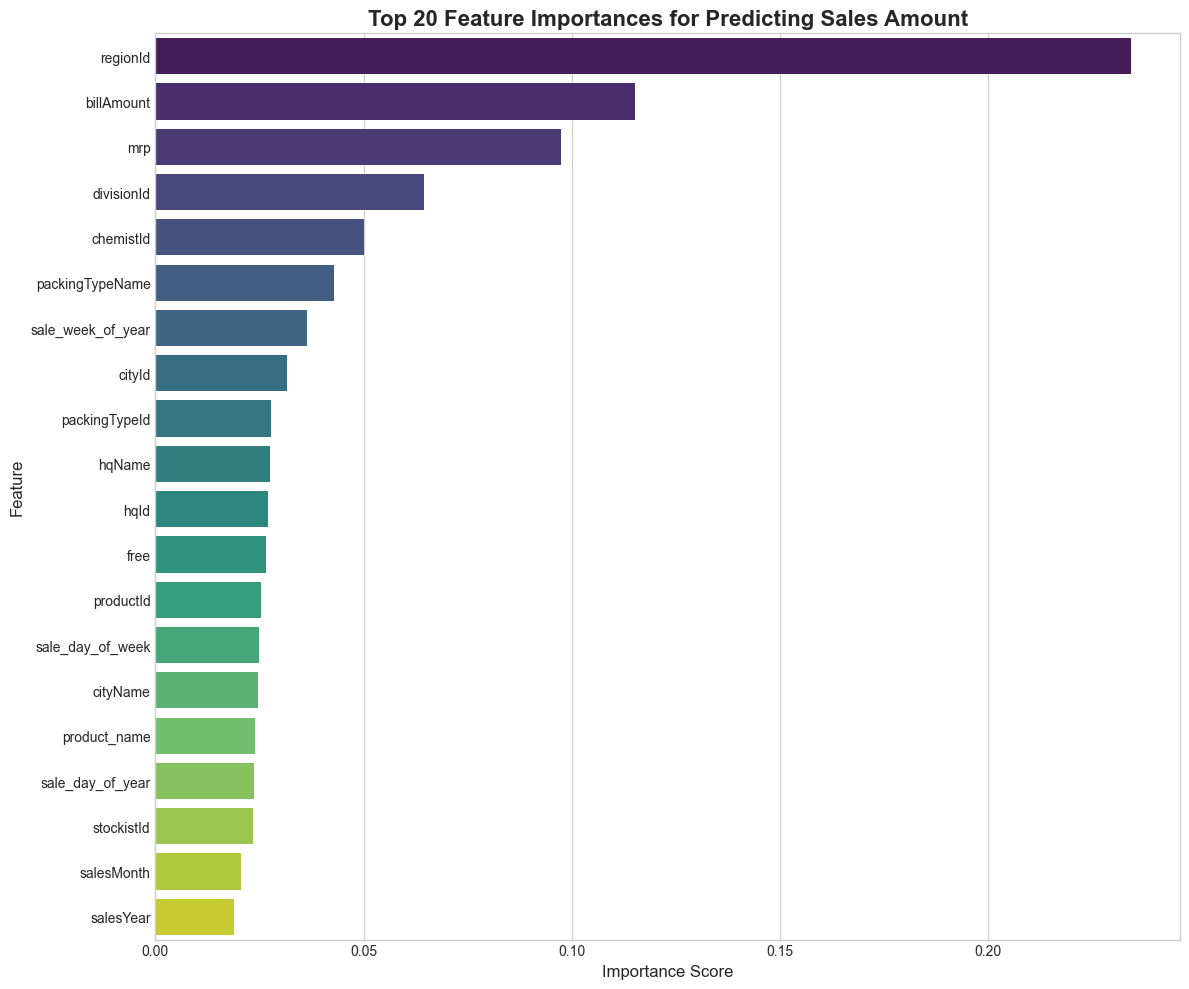

In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Data from data.csv ---
try:
    # Load data from the CSV file, treating 'NULL' as a missing value
    df = pd.read_csv('data.csv', na_values=['NULL', 'NULL,NULL'])
    print("Successfully loaded data.csv")
except FileNotFoundError:
    print("Error: 'data.csv' not found. Please make sure the CSV file is in the same directory as the script.")
    exit()

print("Initial data shape:", df.shape)
print("Initial columns:", df.columns.tolist())

# --- 2. Data Cleaning and Preprocessing ---
# Drop duplicate columns if they exist (e.g., 'packingTypeId' might appear twice)
df = df.loc[:, ~df.columns.duplicated()]

# Convert date column to datetime objects, coercing errors will turn problematic dates into NaT
df['invoiceDate'] = pd.to_datetime(df['invoiceDate'], errors='coerce')

# Drop rows where essential information for the model is missing
df.dropna(subset=['invoiceDate', 'amount'], inplace=True)

# For other missing categorical values, fill with a placeholder like 'Unknown'
# This ensures the model can handle them without errors.
categorical_placeholders = {
    'hqName': 'Unknown_HQ',
    'cityName': 'Unknown_City',
    'stockistId': 'Unknown_Stockist',
    'chemistId': 'Unknown_Chemist',
    'categoryId': 'Unknown_Category'
}
for col, placeholder in categorical_placeholders.items():
    if col in df.columns:
        df[col].fillna(placeholder, inplace=True)

# For missing numerical IDs, fill with a special value like -1
numerical_id_cols = ['hqId', 'regionId', 'cityId', 'divisionId']
for col in numerical_id_cols:
    if col in df.columns:
        df[col].fillna(-1, inplace=True)

print("Data shape after cleaning:", df.shape)

# --- 3. Feature Engineering ---
# The goal is to convert all useful columns into a numeric format for XGBoost.

# Date-based features
df['sale_day_of_week'] = df['invoiceDate'].dt.dayofweek
df['sale_day_of_year'] = df['invoiceDate'].dt.dayofyear
df['sale_week_of_year'] = df['invoiceDate'].dt.isocalendar().week.astype(int)

# Convert categorical columns to numerical codes
# This is a standard and effective way to prepare data for tree-based models like XGBoost.
categorical_cols = [
    'product_name', 'packingTypeName', 'hqName', 'cityName',
    'productId', 'stockistId', 'chemistId', 'categoryId', 'hqId', 'regionId', 'cityId', 'divisionId'
]

for col in categorical_cols:
    if col in df.columns:
        # Using .astype('category').cat.codes is robust. It automatically handles
        # any remaining NaNs by assigning them a code of -1.
        df[col] = df[col].astype('category').cat.codes

# --- 4. Define Target and Features ---
TARGET = 'amount'

# We select features that are likely to influence the sale amount.
# We EXCLUDE columns that would cause data leakage or are direct components of the target,
# such as 'rate' and 'qty', because amount = rate * qty. Including them would make them
# the only important features and hide the more interesting business insights.
FEATURES = [
    'salesYear', 'salesMonth', 'InvoiceWeek',
    'billAmount', 'stockistId', 'chemistId', 'categoryId', 'hqId',
    'hqName', 'regionId', 'cityId', 'cityName', 'free', 'mrp',
    'productId', 'divisionId', 'product_name', 'packingTypeId', 'packingTypeName',
    'sale_day_of_week', 'sale_day_of_year', 'sale_week_of_year'
]
# Filter to ensure all selected features exist in the dataframe after cleaning
FEATURES = [f for f in FEATURES if f in df.columns]

X = df[FEATURES]
y = df[TARGET]

print(f"\nTraining model with {len(FEATURES)} features to predict '{TARGET}'.")
print("Features being used:", FEATURES)

# --- 5. Train the XGBoost Model ---
# For feature importance analysis, it's common to train on the entire dataset.
# The primary goal is not to predict on new, unseen data, but to understand
# the relationships within the existing data.
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,          # A reasonable number of trees for a quick and insightful run
    max_depth=7,               # Limits the complexity of each tree to prevent overfitting
    learning_rate=0.1,         # A common starting point for the learning rate
    subsample=0.8,             # Uses 80% of data for each tree, adds robustness
    colsample_bytree=0.8,      # Uses 80% of features for each tree, adds robustness
    random_state=42,
    n_jobs=-1                  # Use all available CPU cores for faster training
)

print("\nTraining XGBoost model...")
model.fit(X, y, verbose=False) # verbose=False cleans up the output
print("Training complete.")

# --- 6. Get and Visualize Feature Importance ---
importance_scores = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
}).sort_values('Importance', ascending=False).reset_index(drop=True)

# Print the top 20 most important features
print("\n--- Top 20 Most Important Features ---")
print(feature_importance_df.head(20))

# Plot the feature importance using Seaborn for a nicer look
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances for Predicting Sales Amount', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

Successfully loaded data.csv

Starting GPU-Accelerated Hyperparameter Search...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\dazau\AppData\Local\Temp\ipykernel_26052\4027931399.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(placeholder, inplace=True)
C:\Users\dazau\AppData\Local\Temp\ipykernel_26052\4027931399.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown_Stockist' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[col].fillna(placeholder, inplace=True)
C:\Users\dazau\AppData\Local

Search Complete.
Total Tuning Time: 550.78 seconds

Best parameters found:
{'subsample': 0.8, 'n_estimators': 1500, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}

--- Top 20 Most Important Features (from Tuned GPU Model) ---
              Feature  Importance
0            regionId    0.167834
1          divisionId    0.113010
2          billAmount    0.102531
3                 mrp    0.078240
4       packingTypeId    0.047950
5     packingTypeName    0.046571
6              hqName    0.043133
7          stockistId    0.036872
8            cityName    0.035773
9   sale_week_of_year    0.035230
10             cityId    0.029187
11       product_name    0.028558
12               hqId    0.028506
13          productId    0.028417
14               free    0.026688
15   sale_day_of_week    0.025674
16          chemistId    0.025412
17   sale_day_of_year    0.023350
18        InvoiceWeek    0.022975
19          salesYear    0.020438


c:\Users\dazau\Downloads\Forecasting\.conda\Lib\site-packages\xgboost\sklearn.py:1478: UserWarning: [14:45:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  score = b.get_score(
C:\Users\dazau\AppData\Local\Temp\ipykernel_26052\4027931399.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='plasma')


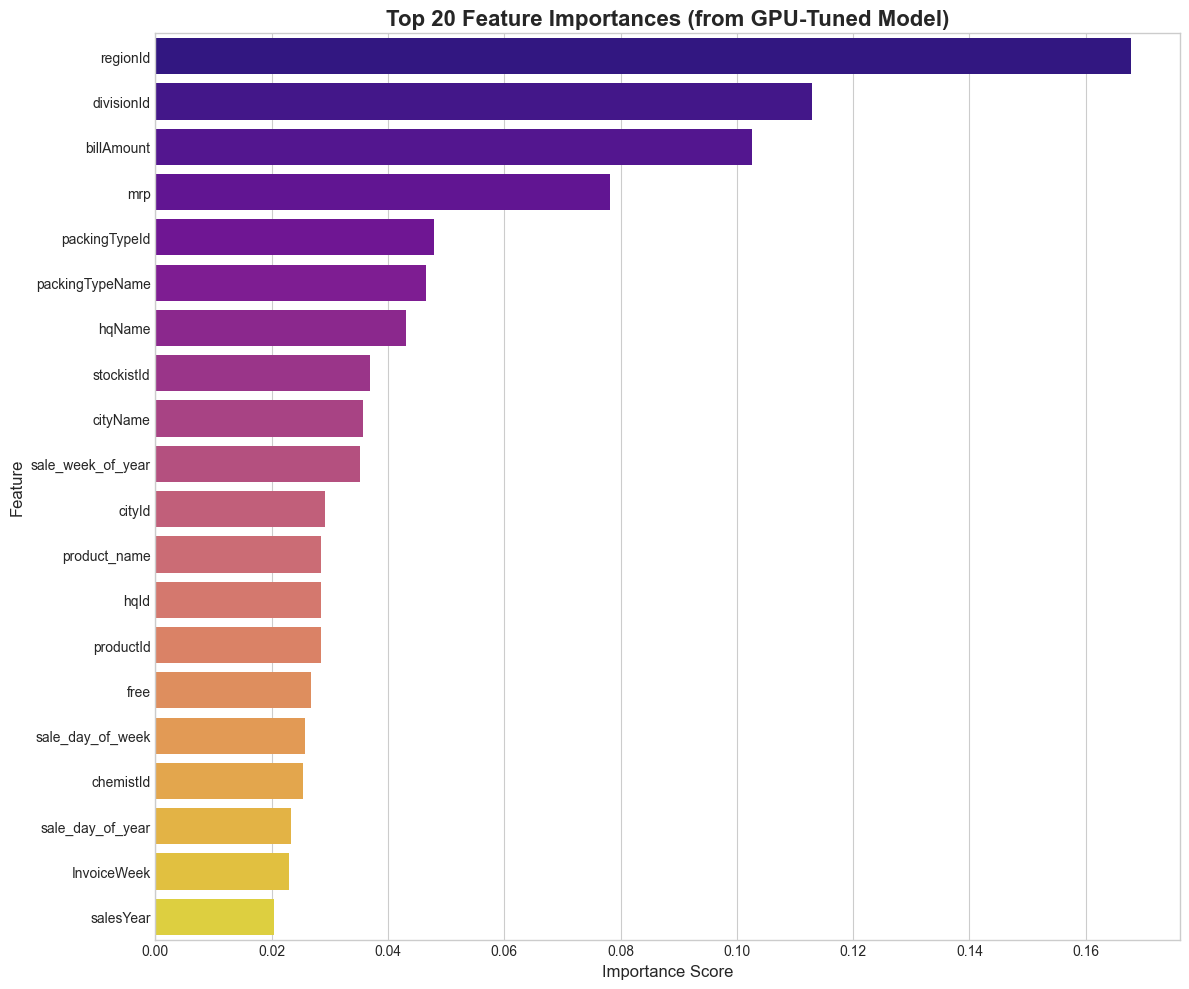

In [5]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
import time # Import time to measure the speedup

# --- 1. Load and Clean the Data ---
try:
    df = pd.read_csv('data.csv', na_values=['NULL', 'NULL,NULL'])
    print("Successfully loaded data.csv")
except FileNotFoundError:
    print("Error: 'data.csv' not found. Please make sure the CSV file is in the same directory as the script.")
    exit()

# --- 2. Data Cleaning and Preprocessing (Updated to fix warnings) ---
df = df.loc[:, ~df.columns.duplicated()]
df['invoiceDate'] = pd.to_datetime(df['invoiceDate'], errors='coerce')
df.dropna(subset=['invoiceDate', 'amount'], inplace=True)

# Define columns and their fill values
categorical_placeholders = {
    'hqName': 'Unknown_HQ',
    'cityName': 'Unknown_City',
    'stockistId': 'Unknown_Stockist',
    'chemistId': 'Unknown_Chemist',
    'categoryId': 'Unknown_Category'
}

# --- This is the corrected block ---
for col, placeholder in categorical_placeholders.items():
    if col in df.columns:
        # First, ensure the column can hold strings by changing its type to 'object'
        df[col] = df[col].astype(object)
        # Now, fill missing values and reassign the column (this avoids the copy warning)
        df[col] = df[col].fillna(placeholder)

numerical_id_cols = ['hqId', 'regionId', 'cityId', 'divisionId']
for col in numerical_id_cols:
    if col in df.columns:
        # Just reassign to avoid the copy warning. No type change needed here.
        df[col] = df[col].fillna(-1)

print("Data shape after cleaning:", df.shape)

# --- 3. Feature Engineering ---
df['sale_day_of_week'] = df['invoiceDate'].dt.dayofweek
df['sale_day_of_year'] = df['invoiceDate'].dt.dayofyear
df['sale_week_of_year'] = df['invoiceDate'].dt.isocalendar().week.astype(int)

categorical_cols = [
    'product_name', 'packingTypeName', 'hqName', 'cityName',
    'productId', 'stockistId', 'chemistId', 'categoryId', 'hqId', 'regionId', 'cityId', 'divisionId'
]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

# --- 4. Define Target and Features ---
TARGET = 'amount'
FEATURES = [
    'salesYear', 'salesMonth', 'InvoiceWeek', 'billAmount', 'stockistId', 'chemistId', 'categoryId', 'hqId',
    'hqName', 'regionId', 'cityId', 'cityName', 'free', 'mrp', 'productId', 'divisionId', 'product_name',
    'packingTypeId', 'packingTypeName', 'sale_day_of_week', 'sale_day_of_year', 'sale_week_of_year'
]
FEATURES = [f for f in FEATURES if f in df.columns]
X = df[FEATURES]
y = df[TARGET]

# --- 5. Hyperparameter Tuning with GPU Acceleration ---

param_dist = {
    'n_estimators': [200, 500, 1000, 1500],
    'max_depth': [5, 7, 10, 12],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# Initialize the XGBoost regressor WITH GPU SUPPORT
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='gpu_hist',  # <--- THIS IS THE KEY CHANGE!
    random_state=42,
    n_jobs=-1
)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1 # This will still be used for CPU tasks like data splitting
)

print("\nStarting GPU-Accelerated Hyperparameter Search...")
start_time = time.time()
random_search.fit(X, y)
end_time = time.time()
print("Search Complete.")
print(f"Total Tuning Time: {end_time - start_time:.2f} seconds")

# Print the best parameters and score
print("\nBest parameters found:")
print(random_search.best_params_)
best_model = random_search.best_estimator_

# --- 6. Get and Visualize Feature Importance from the BEST Model ---
importance_scores = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
}).sort_values('Importance', ascending=False).reset_index(drop=True)

print("\n--- Top 20 Most Important Features (from Tuned GPU Model) ---")
print(feature_importance_df.head(20))

# Plot the feature importance
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='plasma')
plt.title('Top 20 Feature Importances (from GPU-Tuned Model)', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

Successfully loaded dataset_weekly_283.csv
Creating time-series features...
Training data shape: (107, 19)
Test data shape: (53, 19)

Starting GPU-Accelerated Hyperparameter Search...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\dazau\Downloads\Forecasting\.conda\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:58:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


Search Complete. Total Tuning Time: 635.03 seconds

Best parameters found:
{'subsample': 1.0, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}

Best cross-validation SMAPE: 197.65%

-------------------------------------------------
Prophet + GridSearch SMAPE: 43.00%
XGBoost + RandomizedSearch SMAPE: 200.00%
-------------------------------------------------


c:\Users\dazau\Downloads\Forecasting\.conda\Lib\site-packages\xgboost\core.py:2652: UserWarning: [19:58:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
c:\Users\dazau\Downloads\Forecasting\.conda\Lib\site-packages\xgboost\core.py:705: UserWarning: [19:58:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  retur

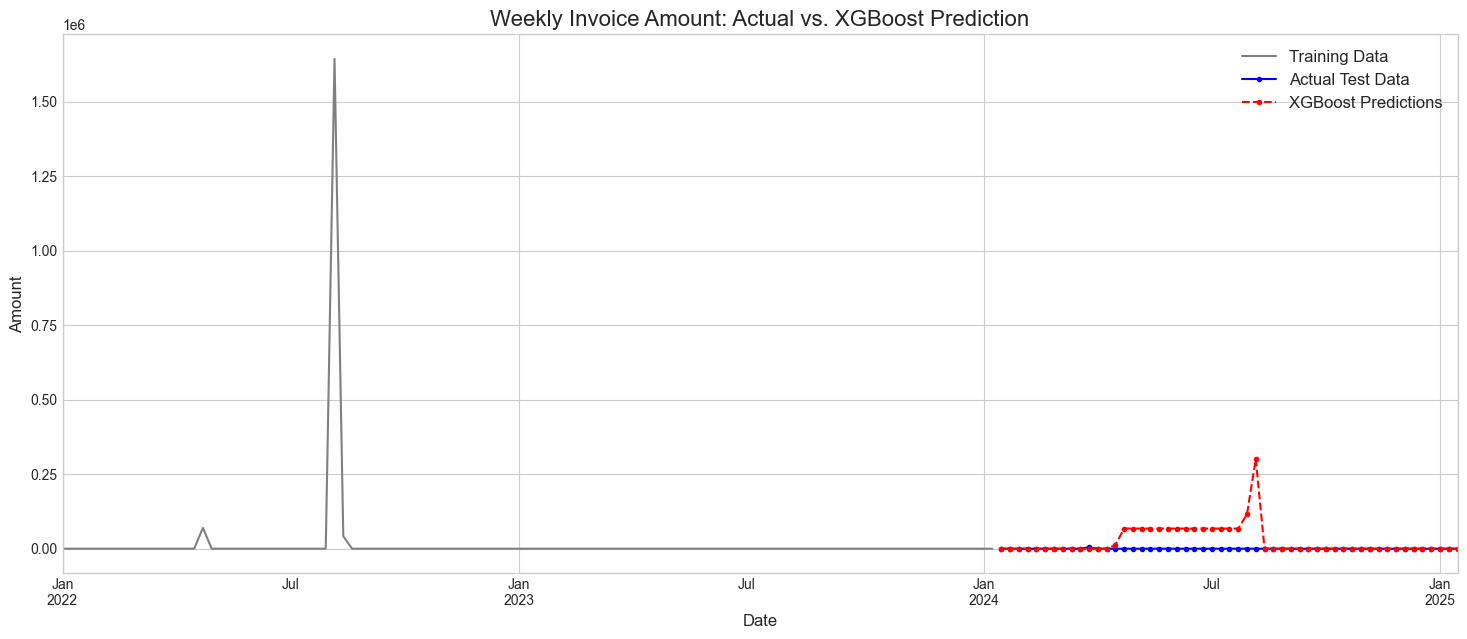

In [37]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
import time

# --- 0. Define the SMAPE Metric ---
# We need to define our target metric, SMAPE, to use it in our evaluation.
def smape(y_true, y_pred):
    """
    Symmetric Mean Absolute Percentage Error (SMAPE)
    """
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    # Add a small epsilon to the denominator to avoid division by zero
    return np.mean(numerator / (denominator + 1e-8)) * 100

# Create a scorer object for scikit-learn
smape_scorer = make_scorer(smape, greater_is_better=False) # False because lower SMAPE is better

# --- 1. Load and Prepare the Data ---
try:
    df = pd.read_csv('merged_sum_daily_agg_filled.csv')
    print("Successfully loaded dataset_weekly_283.csv")
except FileNotFoundError:
    print("Error: 'dataset_weekly_283.csv' not found. Please place it in the same directory.")
    exit()

# --- 2. Feature Engineering Function ---
def create_time_series_features(df):
    """
    Creates time-series features from a datetime index.
    """
    df = df.copy()
    df['invoiceDate'] = pd.to_datetime(df['invoiceDate'])
    df = df.set_index('invoiceDate')
    
    # Fill any missing weeks with 0. Important for lags/rolling windows.
    df = df.asfreq('W-SUN', fill_value=0.0)

    # Date-based features
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['quarter'] = df.index.quarter
    df['week_of_year'] = df.index.isocalendar().week.astype(int)
    df['day_of_year'] = df.index.dayofyear
    df['day_of_week'] = df.index.dayofweek # Sunday=6

    # Lag features (sales from previous periods)
    lags = [1, 2, 3, 4, 13, 26, 52] # 1-4 weeks, 1 quarter, half a year, 1 year
    for lag in lags:
        df[f'lag_{lag}'] = df['amount'].shift(lag)

    # Rolling window features
    windows = [4, 13, 52] # 1 month, 1 quarter, 1 year
    for window in windows:
        df[f'rolling_mean_{window}'] = df['amount'].shift(1).rolling(window=window).mean()
        df[f'rolling_std_{window}'] = df['amount'].shift(1).rolling(window=window).std()

    df.dropna(inplace=True)
    return df

print("Creating time-series features...")
df_featured = create_time_series_features(df)

# --- 3. Split Data into Training and Test Sets ---
# We'll use the last year of data as our hold-out test set
split_date = df_featured.index.max() - pd.DateOffset(years=1)
train_data = df_featured.loc[df_featured.index <= split_date]
test_data = df_featured.loc[df_featured.index > split_date]

X_train = train_data.drop('amount', axis=1)
y_train = train_data['amount']
X_test = test_data.drop('amount', axis=1)
y_test = test_data['amount']

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# --- 4. Hyperparameter Tuning with GPU ---
# Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Define the hyperparameter distribution for Randomized Search
param_dist = {
    'n_estimators': [200, 500, 1000, 1500, 2000],
    'max_depth': [3, 5, 7, 10, 12],
    'learning_rate': [0.01, 0.02, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 5, 10]
}

# Initialize XGBoost with GPU support
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='gpu_hist',
    random_state=42,
    n_jobs=-1
)

# Setup RandomizedSearchCV
# n_iter=50 means it will try 50 random combinations, a good starting point.
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,
    scoring=smape_scorer,
    cv=tscv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("\nStarting GPU-Accelerated Hyperparameter Search...")
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
print(f"Search Complete. Total Tuning Time: {end_time - start_time:.2f} seconds")

# --- 5. Evaluate the Best Model ---
print("\nBest parameters found:")
print(random_search.best_params_)
print(f"\nBest cross-validation SMAPE: {-random_search.best_score_:.2f}%")

# Get the best model
best_model = random_search.best_estimator_

# Make predictions on the hold-out test set
test_predictions = best_model.predict(X_test)

# Calculate the final SMAPE on the test set
final_smape = smape(y_test, test_predictions)
print(f"\n-------------------------------------------------")
print(f"Prophet + GridSearch SMAPE: 43.00%")
print(f"XGBoost + RandomizedSearch SMAPE: {final_smape:.2f}%")
print(f"-------------------------------------------------")


# --- 6. Visualize the Results ---
test_data['prediction'] = test_predictions

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(18, 7))

train_data['amount'].plot(ax=ax, label='Training Data', color='gray')
test_data['amount'].plot(ax=ax, label='Actual Test Data', color='blue', marker='.')
test_data['prediction'].plot(ax=ax, label='XGBoost Predictions', color='red', linestyle='--', marker='.')

ax.set_title('Weekly Invoice Amount: Actual vs. XGBoost Prediction', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Amount', fontsize=12)
ax.legend(fontsize=12)
plt.show()

Successfully loaded new_data.csv with shape: (129271, 19)
Starting data cleaning and preprocessing...
Performing feature engineering...

Training model with 20 features to predict 'amount'.
Features used: ['salesYear', 'salesMonth', 'InvoiceWeek', 'stockistId', 'chemistId', 'categoryId', 'hqId', 'regionId', 'cityId', 'qty', 'free', 'rate', 'productId', 'divisionId', 'packingTypeId', 'mrp', 'packingTypeId.1', 'sale_day_of_week', 'sale_day_of_year', 'sale_week_of_year']

Training XGBoost model on GPU...
Training complete. Time taken: 0.97 seconds

--- Top 20 Most Important Features ---
              Feature  Importance
0                 qty    0.355266
1                rate    0.320998
2                 mrp    0.251855
3            regionId    0.009543
4           chemistId    0.008618
5       packingTypeId    0.006635
6           productId    0.006070
7    sale_day_of_week    0.005787
8              cityId    0.005281
9                hqId    0.005100
10  sale_week_of_year    0.004538
1

C:\Users\dazau\AppData\Local\Temp\ipykernel_26052\2034179641.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')


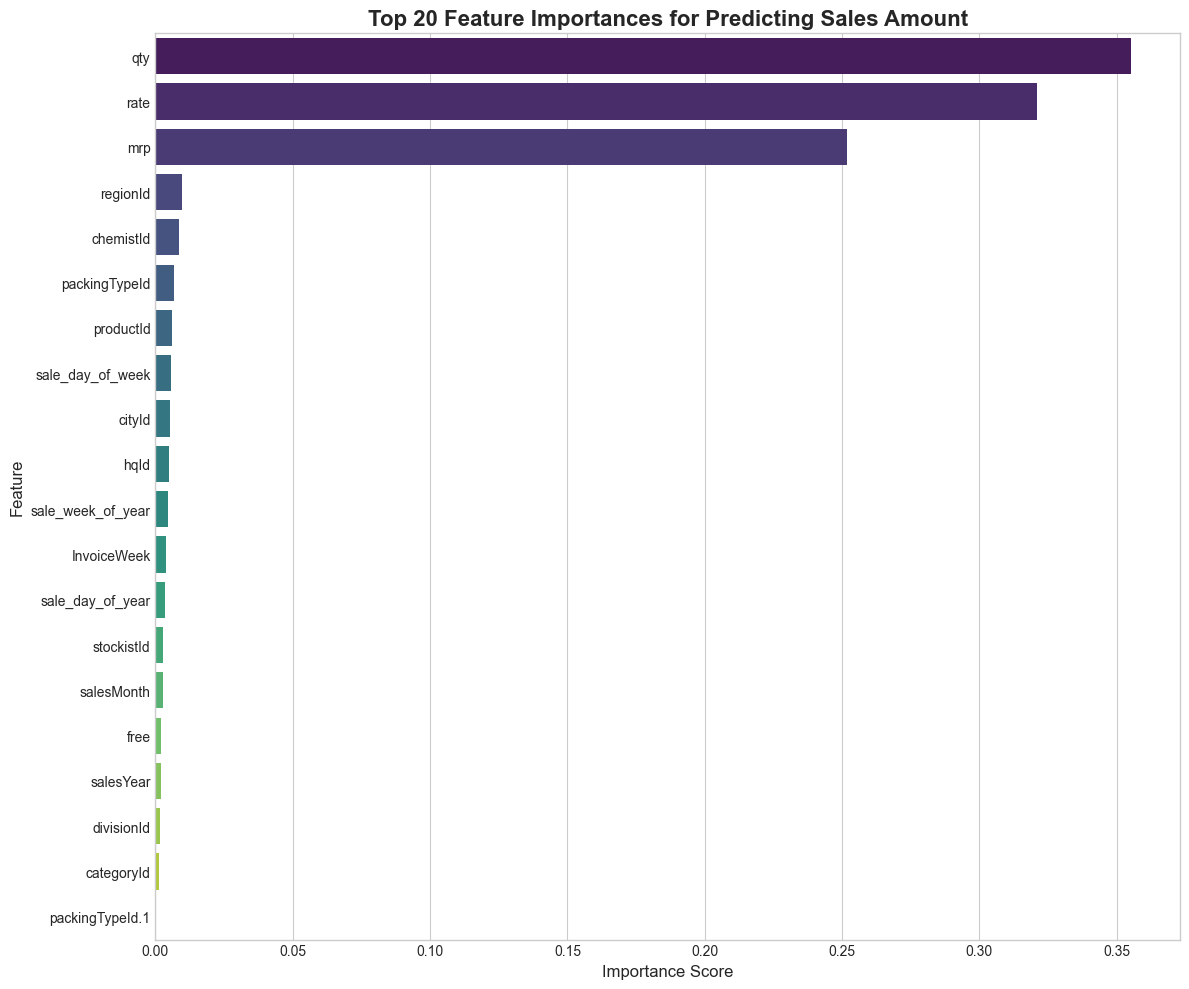

In [7]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import time

# --- 1. Load the New Data ---
try:
    # Use a generic name for the file, assuming it's in the same folder
    df = pd.read_csv('new_data.csv')
    print(f"Successfully loaded new_data.csv with shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'new_data.csv' not found. Please make sure the file is in the same directory.")
    exit()

# --- 2. Data Cleaning and Preprocessing ---
print("Starting data cleaning and preprocessing...")
# Drop duplicate columns if they exist (like 'packingTypeId')
df = df.loc[:, ~df.columns.duplicated()]

# Handle the date column
df['invoiceDate'] = pd.to_datetime(df['invoiceDate'], errors='coerce')

# Drop rows where the target 'amount' is missing, as they are not useful for training
df.dropna(subset=['amount', 'invoiceDate'], inplace=True)

# Define categorical and numerical columns for proper handling
# All ID columns should be treated as categories, not numbers to be summed or averaged.
categorical_cols = [
    'stockistId', 'chemistId', 'categoryId', 'hqId', 'regionId', 
    'cityId', 'productId', 'divisionId', 'packingTypeId'
]

# Clean up columns: fill missing values and ensure correct types
for col in categorical_cols:
    if col in df.columns:
        # Convert to string to treat them purely as categories and fill NaNs
        df[col] = df[col].astype(str).fillna('Unknown')

# --- 3. Feature Engineering ---
print("Performing feature engineering...")
# Create date-based features
df['sale_day_of_week'] = df['invoiceDate'].dt.dayofweek
df['sale_day_of_year'] = df['invoiceDate'].dt.dayofyear
df['sale_week_of_year'] = df['invoiceDate'].dt.isocalendar().week.astype(int)

# Convert all categorical features (including IDs) to numerical codes for XGBoost
# This is a crucial step.
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

# --- 4. Define Target and Features for the Model ---
TARGET = 'amount'

# We use all columns as features except the target and the original date string
FEATURES = [col for col in df.columns if col not in [TARGET, 'invoiceDate']]
# Ensure all selected features are numeric
FEATURES = [f for f in FEATURES if pd.api.types.is_numeric_dtype(df[f])]

X = df[FEATURES]
y = df[TARGET]

print(f"\nTraining model with {len(FEATURES)} features to predict '{TARGET}'.")
print("Features used:", FEATURES)

# --- 5. Train the XGBoost Model on the GPU ---
# For feature importance, we train on the full dataset to give the model maximum information.
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,          # A sufficient number of trees for importance analysis
    max_depth=7,
    learning_rate=0.1,
    device='cuda',             # Use the GPU
    random_state=42,
    n_jobs=-1
)

print("\nTraining XGBoost model on GPU...")
start_time = time.time()
model.fit(X, y, verbose=False)
end_time = time.time()
print(f"Training complete. Time taken: {end_time - start_time:.2f} seconds")

# --- 6. Get and Visualize Feature Importance ---
importance_scores = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
}).sort_values('Importance', ascending=False).reset_index(drop=True)

# Print the top 20 most important features
print("\n--- Top 20 Most Important Features ---")
print(feature_importance_df.head(20))

# Plot the feature importance
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances for Predicting Sales Amount', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

Data Overview:
Shape: (1481, 2)
Date range: 2021-01-01 00:00:00 to 2025-01-20 00:00:00
Missing values: 0

Basic Statistics:
count    1.481000e+03
mean     9.905030e+05
std      1.051395e+06
min      0.000000e+00
25%      3.152122e+05
50%      7.546605e+05
75%      1.361730e+06
max      1.495314e+07
Name: amount, dtype: float64


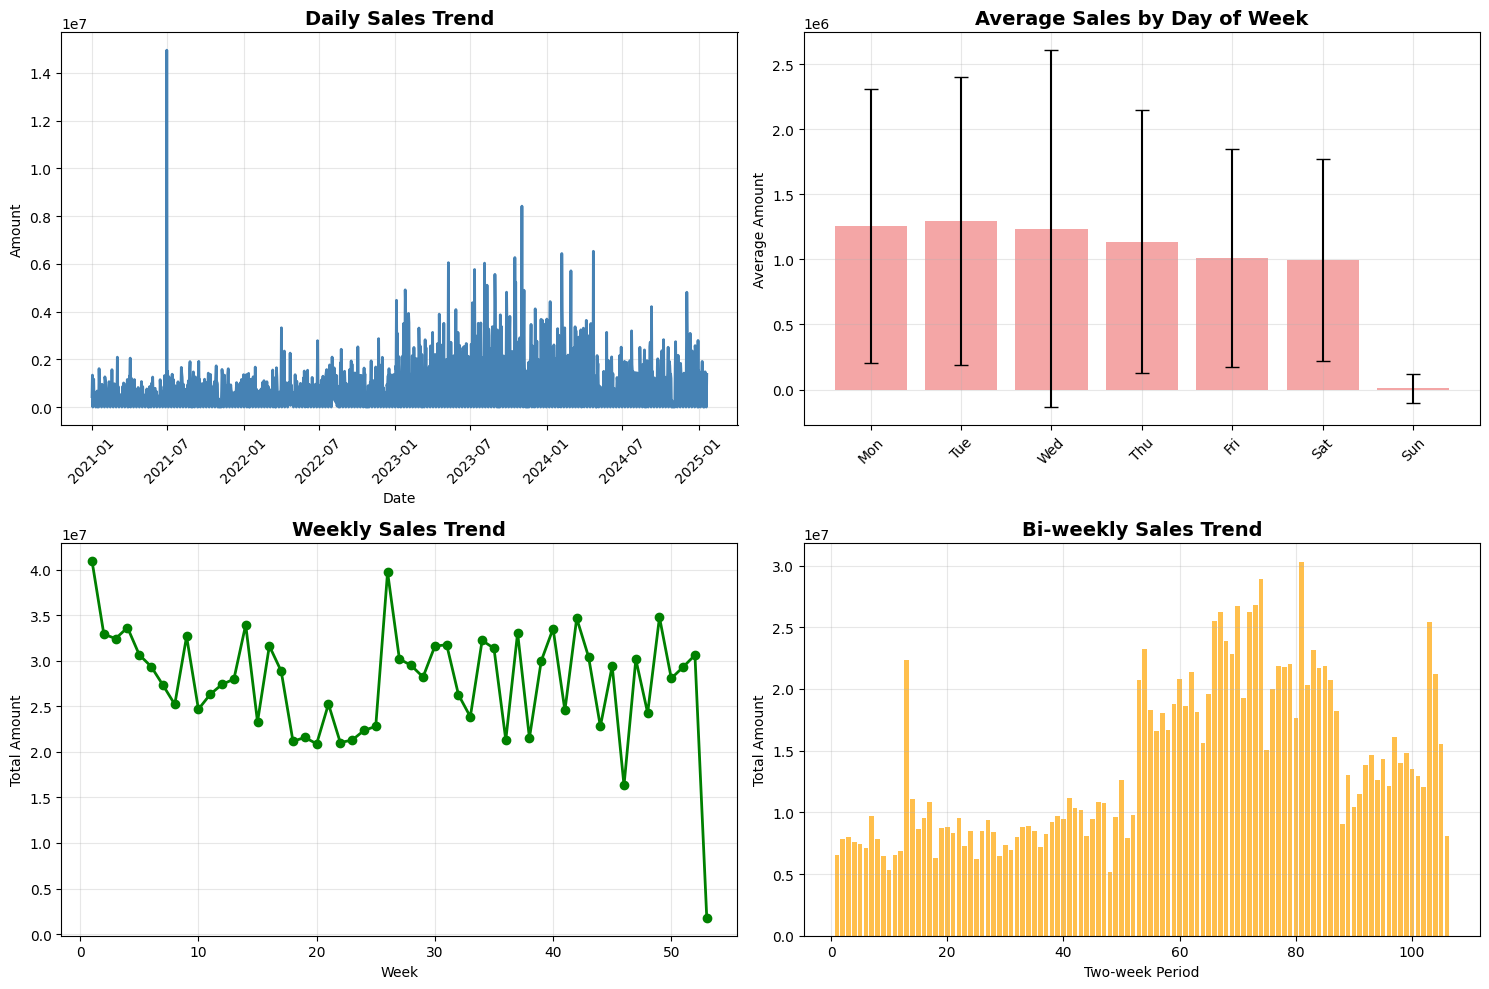


OUTLIER DETECTION RESULTS

ZSCORE Method:
Number of outliers: 21
Outlier dates and amounts:
  2021-06-30: 14,953,139.78
  2023-01-04: 4,474,063.20
  2023-01-25: 4,910,257.80
  2023-05-09: 6,048,596.18
  2023-07-06: 4,371,853.32
  2023-07-11: 5,762,966.96
  2023-08-04: 6,030,027.36
  2023-08-10: 5,106,556.90
  2023-08-29: 5,559,042.74
  2023-08-30: 4,424,894.20
  2023-09-26: 4,813,177.46
  2023-10-16: 6,262,876.62
  2023-10-18: 5,235,926.70
  2023-11-02: 8,418,248.48
  2023-11-07: 4,894,647.60
  2024-01-09: 4,418,330.68
  2024-02-06: 6,432,532.64
  2024-02-28: 5,707,079.98
  2024-04-22: 6,527,220.60
  2024-09-09: 4,206,666.72
  2024-12-03: 4,810,333.20

IQR Method:
Number of outliers: 71
Outlier dates and amounts:
  2021-06-30: 14,953,139.78
  2022-04-02: 3,320,887.82
  2023-01-04: 4,474,063.20
  2023-01-06: 3,093,723.08
  2023-01-21: 3,496,247.36
  2023-01-25: 4,910,257.80
  2023-01-26: 4,083,434.60
  2023-02-02: 3,924,298.44
  2023-02-03: 3,540,370.56
  2023-02-27: 3,310,860.42
  202

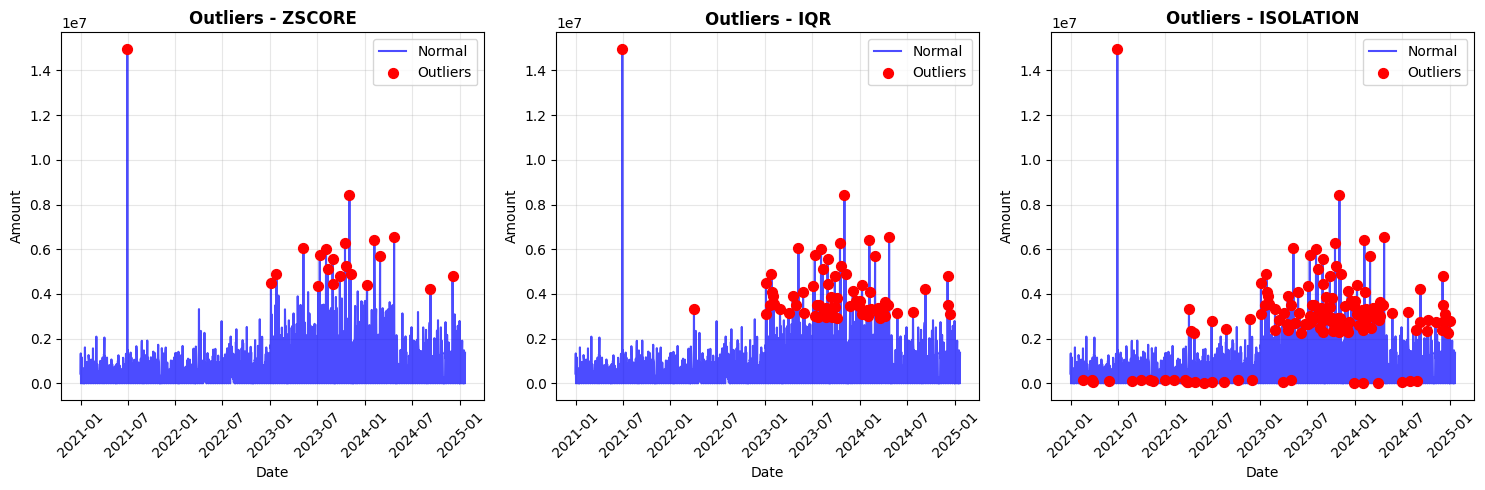


Feature Engineering Complete:
Feature matrix shape: (1467, 22)
Target vector shape: (1467,)
Features: ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'week', 'quarter', 'is_weekend', 'month_start', 'month_end', 'amount_lag_1', 'amount_lag_2', 'amount_lag_3', 'amount_lag_7', 'amount_lag_14', 'amount_rolling_mean_3', 'amount_rolling_std_3', 'amount_rolling_mean_7', 'amount_rolling_std_7', 'amount_rolling_mean_14', 'amount_rolling_std_14', 'two_week_period']

STARTING XGBOOST GRID SEARCH WITH GPU
Fitting 3 folds for each of 128 candidates, totalling 384 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Best CV score (MAE): 307471.56

FEATURE IMPORTANCE ANALYSIS
                   feature  importance
15   amount_rolling_mean_3    0.259808
3                dayofweek    0.167825
9                month_end    0.105618
16    amount_rolling_std_3    0.097170
11            amount_lag_2

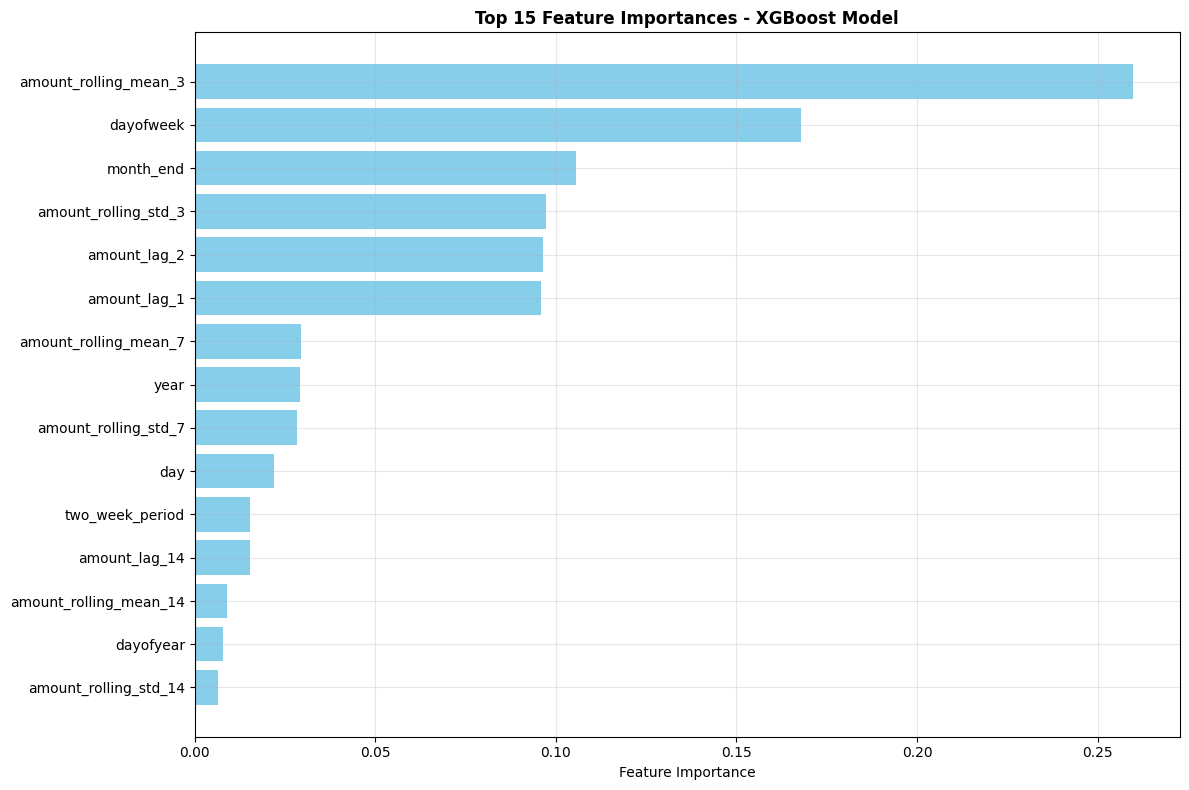


MODEL EVALUATION RESULTS
Training Metrics:
  MAE: 8772.07
  RMSE: 11818.40
  R²: 0.9999

Testing Metrics:
  MAE: 149366.25
  RMSE: 283882.86
  R²: 0.9020


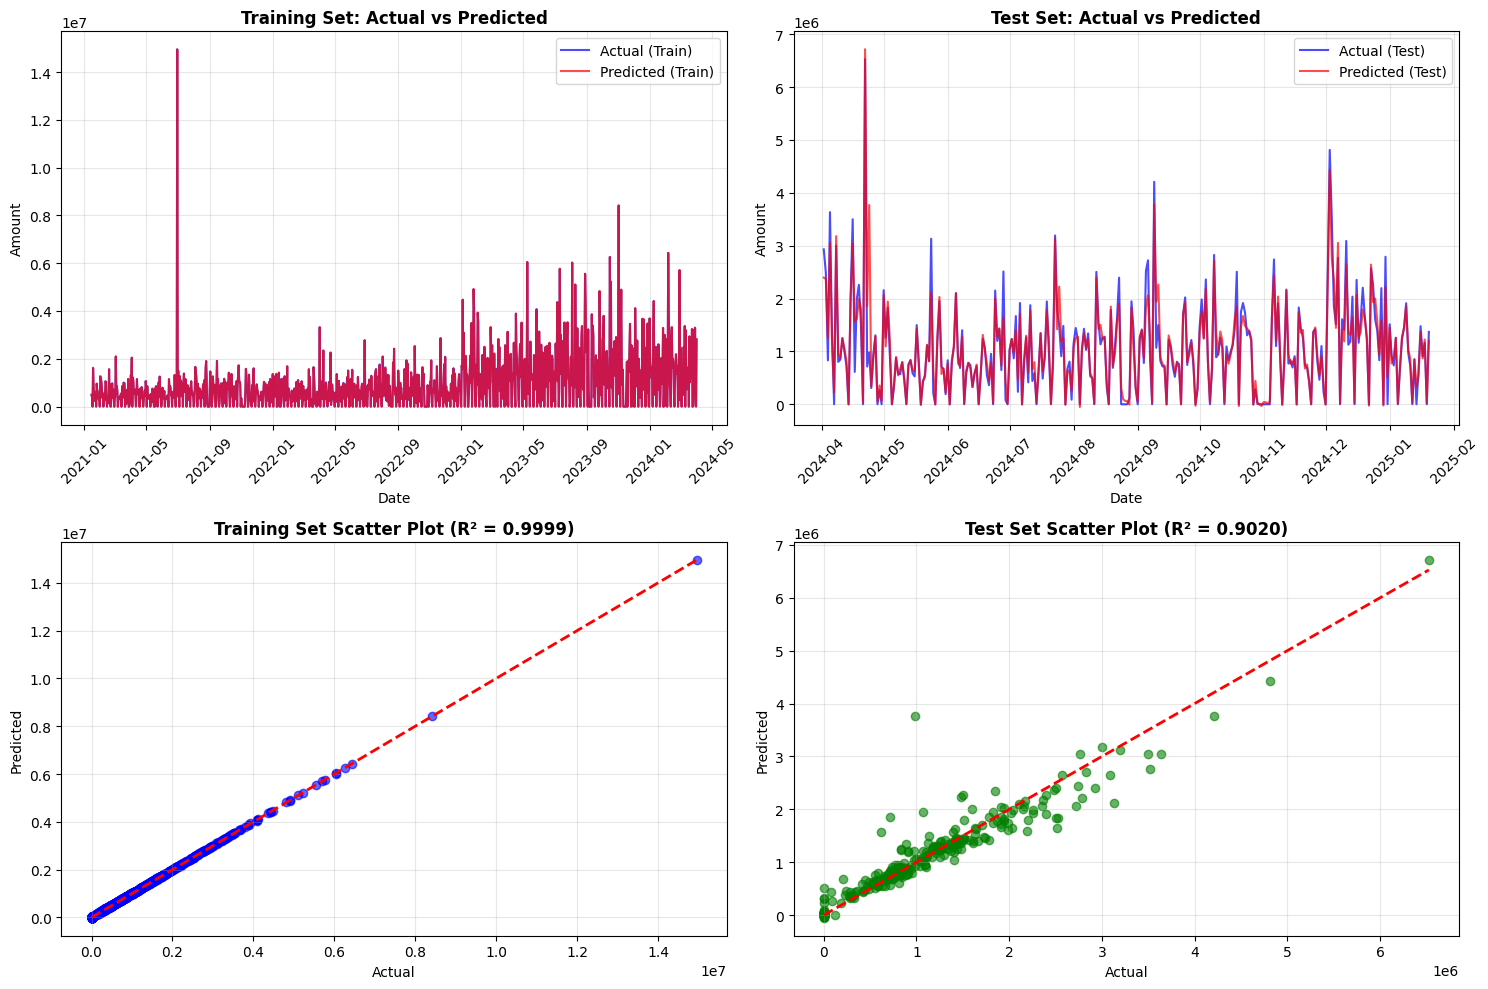

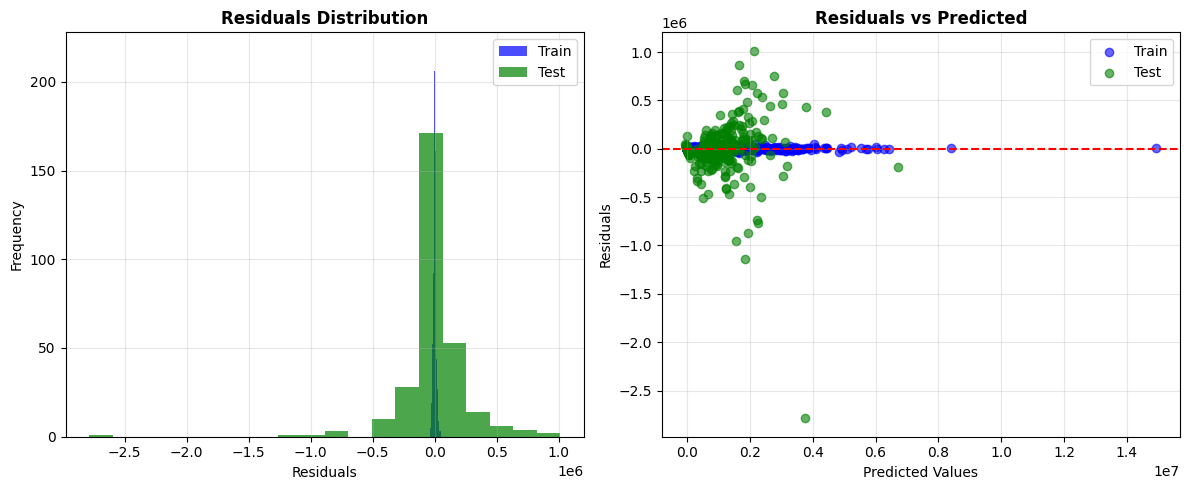


ANALYSIS COMPLETE!
Key Insights:
1. The model achieved an R² score of 0.9020 on test data
2. Test MAE is 149366.25, meaning average prediction error is ~14.2%
3. Most important features: amount_rolling_mean_3, dayofweek, month_end

4. Model is ready for future predictions!
   To predict future values, prepare features for new dates and use final_model.predict()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# XGBoost and ML libraries
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Statistical libraries
from scipy import stats
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the data (assuming it's in a CSV file)
# df = pd.read_csv('your_sales_data.csv')

# Sample data based on your provided data
data = """invoiceDate,amount
2021-01-01,437149.38
2021-01-02,1339262.26
2021-01-03,0.0
2021-01-04,561277.74
2021-01-05,1170126.46
2021-01-06,286603.24
2021-01-07,517177.68
2021-01-08,454866.08
2021-01-09,305423.08
2021-01-10,0.0
2021-01-11,376609.0
2021-01-12,389359.6
2021-01-13,671167.9
2021-01-14,0.0
2021-01-15,495097.9
2021-01-16,383186.0
2021-01-17,0.0
2021-01-18,1609278.98
2021-01-19,872979.66
2021-01-20,478284.58
2021-01-21,616486.78
2021-01-22,233833.34
2021-01-23,526787.62
2021-01-24,0.0
2021-01-25,955337.62
2021-01-26,701453.34
2021-01-27,625397.14
2021-01-28,354385.42
2021-01-29,296617.1
2021-01-30,348898.56
2021-01-31,0.0
2021-02-01,1265102.34
2021-02-02,1126755.14
2021-02-03,1067952.84
2021-02-04,771249.86
2021-02-05,367524.28
2021-02-06,482560.32
2021-02-07,0.0
2021-02-08,379877.16
2021-02-09,572553.82
2021-02-10,284436.24
2021-02-11,1063770.3
2021-02-12,1017971.76
2021-02-13,313217.52
2021-02-14,0.0
2021-02-15,424623.66
2021-02-16,330705.6
2021-02-17,137480.66
2021-02-18,1565794.02
2021-02-19,164819.1
2021-02-20,929302.42
2021-02-21,0.0
2021-02-22,752361.56
2021-02-23,635010.38
2021-02-24,975871.1
2021-02-25,358584.24
2021-02-26,722107.4
2021-02-27,291793.2
2021-02-28,0.0
2021-03-01,313019.96
2021-03-02,434079.84
2021-03-03,2090224.8
2021-03-04,558269.24
2021-03-05,857905.46
2021-03-06,658244.48
2021-03-07,0.0
2021-03-08,337066.86
2021-03-09,318632.8
2021-03-10,393981.1
2021-03-11,425082.54
2021-03-12,413736.86
2021-03-13,540616.28
2021-03-14,0.0
2021-03-15,434498.26
2021-03-16,862226.9
2021-03-17,376265.38
2021-03-18,1008199.28
2021-03-19,983473.7
2021-03-20,974257.32
2021-03-21,0.0
2021-03-22,522103.36
2021-03-23,701660.44
2021-03-24,118054.04
2021-03-25,150221.04
2021-03-26,172241.4
2021-03-27,1154571.52
2021-03-28,0.0
2021-03-29,0.0
2021-03-30,74547.0
2021-03-31,308546.5
2021-04-01,1301902.2
2021-04-02,1246711.52
2021-04-03,2050048.18
2021-04-04,0.0
2021-04-05,1224406.78
2021-04-06,1069625.56
2021-04-07,533960.16
2021-04-08,543520.5
2021-04-09,718219.04
2021-04-10,506106.28
2021-04-11,0.0
2021-04-12,518801.4
2021-04-13,1152587.2
2021-04-14,530754.82
2021-04-15,716236.34
2021-04-16,502666.22
2021-04-17,495389.28
2021-04-18,0.0
2021-04-19,739101.18
2021-04-20,650420.72
2021-04-21,525937.04
2021-04-22,818987.6
2021-04-23,333247.92
2021-04-24,429322.82
2021-04-25,0.0
2021-04-26,221401.2
2021-04-27,515902.42
2021-04-28,671819.32
2021-04-29,455464.06
2021-04-30,1068747.28
2021-05-01,734796.2
2021-05-02,0.0
2021-05-03,855225.74
2021-05-04,360695.4
2021-05-05,328466.46
2021-05-06,480603.2
2021-05-07,415338.56
2021-05-08,402453.64
2021-05-09,0.0
2021-05-10,526431.58
2021-05-11,201550.1
2021-05-12,196962.0
2021-05-13,758212.34
2021-05-14,192466.72
2021-05-15,268645.48
2021-05-16,0.0
2021-05-17,714865.66
2021-05-18,0.0
2021-05-19,800388.52
2021-05-20,861524.24
2021-05-21,204958.2
2021-05-22,243658.24
2021-05-23,0.0
2021-05-24,464985.8
2021-05-25,1012906.7
2021-05-26,405128.78
2021-05-27,1256813.64
2021-05-28,601507.18
2021-05-29,351656.82
2021-05-30,0.0
2021-05-31,102824.02
2021-06-01,780459.88
2021-06-02,784973.66
2021-06-03,344246.9
2021-06-04,356164.22
2021-06-05,649156.34
2021-06-06,0.0
2021-06-07,322540.66
2021-06-08,358338.24
2021-06-09,325917.92
2021-06-10,459020.04
2021-06-11,330384.44
2021-06-12,460034.24
2021-06-13,0.0
2021-06-14,1145986.5
2021-06-15,775930.12
2021-06-16,868944.84
2021-06-17,790697.34
2021-06-18,467609.58
2021-06-19,509341.3
2021-06-20,0.0
2021-06-21,614357.78
2021-06-22,358575.76
2021-06-23,641355.5
2021-06-24,608023.36
2021-06-25,1322428.1
2021-06-26,704622.18
2021-06-27,0.0
2021-06-28,1160468.54
2021-06-29,408911.24
2021-06-30,14953139.78
2021-07-01,573131.42
2021-07-02,1493647.66
2021-07-03,718589.42
2021-07-04,0.0
2021-07-05,1270432.24
2021-07-06,641047.28
2021-07-07,1097837.6
2021-07-08,430951.92
2021-07-09,611506.38
2021-07-10,981656.86
2021-07-11,0.0
2021-07-12,1005212.76
2021-07-13,1376281.54
2021-07-14,613327.62
2021-07-15,824235.96
2021-07-16,1151489.52
2021-07-17,725788.4
2021-07-18,0.0
2021-07-19,427038.38
2021-07-20,892175.1
2021-07-21,734670.08
2021-07-22,774840.54
2021-07-23,270344.08
2021-07-24,661340.62
2021-07-25,0.0
2021-07-26,705621.3
2021-07-27,1058085.5
2021-07-28,631789.26
2021-07-29,625973.8
2021-07-30,460848.06
2021-07-31,405236.8
2021-08-01,0.0
2021-08-02,221916.54
2021-08-03,698336.18
2021-08-04,1661870.66
2021-08-05,1416114.1
2021-08-06,1245313.1
2021-08-07,806880.64
2021-08-08,0.0
2021-08-09,955705.86
2021-08-10,315212.16
2021-08-11,767839.26
2021-08-12,609223.04
2021-08-13,730746.44
2021-08-14,580721.02
2021-08-15,0.0
2021-08-16,623702.5
2021-08-17,472905.98
2021-08-18,512510.06
2021-08-19,927055.28
2021-08-20,339993.6
2021-08-21,1100895.9
2021-08-22,0.0
2021-08-23,854661.54
2021-08-24,1599485.12
2021-08-25,1904518.72
2021-08-26,1173182.42
2021-08-27,109377.04
2021-08-28,0.0
2021-08-29,0.0
2021-08-30,0.0
2021-08-31,0.0
2021-09-01,754660.54
2021-09-02,1473437.14
2021-09-03,592661.72
2021-09-04,298963.22000000003
2021-09-05,0.0
2021-09-06,388895.46
2021-09-07,1263267.54
2021-09-08,836999.0
2021-09-09,573026.64
2021-09-10,913412.0
2021-09-11,367742.1
2021-09-12,0.0
2021-09-13,0.0
2021-09-14,956762.16
2021-09-15,1914107.84
2021-09-16,582969.7
2021-09-17,1158073.52
2021-09-18,319164.8
2021-09-19,0.0
2021-09-20,195256.2
2021-09-21,885907.76
2021-09-22,427440.62
2021-09-23,978548.54
2021-09-24,396570.84
2021-09-25,425848.08
2021-09-26,0.0
2021-09-27,988236.54
2021-09-28,585589.4
2021-09-29,1167001.4
2021-09-30,131573.0
2021-10-01,1035979.84
2021-10-02,686465.0
2021-10-03,0.0
2021-10-04,654085.78
2021-10-05,741501.58
2021-10-06,1019683.62
2021-10-07,958497.7
2021-10-08,1421155.7
2021-10-09,481334.54
2021-10-10,0.0
2021-10-11,380258.08
2021-10-12,419626.46
2021-10-13,1369169.3
2021-10-14,508381.04
2021-10-15,470201.72
2021-10-16,824881.32
2021-10-17,0.0
2021-10-18,846569.2
2021-10-19,584049.2
2021-10-20,690558.48
2021-10-21,306687.32
2021-10-22,946327.24
2021-10-23,1071188.14
2021-10-24,0.0
2021-10-25,887759.68
2021-10-26,1387583.2
2021-10-27,1726919.76
2021-10-28,1044883.8
2021-10-29,1037216.78
2021-10-30,958513.86
2021-10-31,0.0
2021-11-01,357261.4
2021-11-02,153684.32
2021-11-03,0.0
2021-11-04,0.0
2021-11-05,0.0
2021-11-06,0.0
2021-11-07,0.0
2021-11-08,0.0
2021-11-09,666848.54
2021-11-10,1574727.22
2021-11-11,1309925.56
2021-11-12,587280.7
2021-11-13,620150.68
2021-11-14,0.0
2021-11-15,113157.84
2021-11-16,1338310.78
2021-11-17,718273.2
2021-11-18,303601.26
2021-11-19,225465.54
2021-11-20,350474.38
2021-11-21,0.0
2021-11-22,896559.66
2021-11-23,181114.0
2021-11-24,1386354.1
2021-11-25,1605184.7
2021-11-26,328084.8
2021-11-27,651314.02
2021-11-28,0.0
2021-11-29,405243.8
2021-11-30,798558.6
2021-12-01,930693.8
2021-12-02,713774.38
2021-12-03,637760.42
2021-12-04,461370.68
2021-12-05,0.0
2021-12-06,374524.4
2021-12-07,448530.24
2021-12-08,284811.22
2021-12-09,311783.74
2021-12-10,624545.48
2021-12-11,266163.42
2021-12-12,0.0
2021-12-13,325219.1
2021-12-14,603286.24
2021-12-15,1024329.44
2021-12-16,884277.86
2021-12-17,973527.88
2021-12-18,359129.44
2021-12-19,0.0
2021-12-20,915085.58
2021-12-21,848353.44
2021-12-22,244404.18
2021-12-23,586746.92
2021-12-24,280053.3
2021-12-25,1033046.36
2021-12-26,0.0
2021-12-27,1156284.26
2021-12-28,815664.44
2021-12-29,570762.68
2021-12-30,726697.0
2021-12-31,160490.28
2022-01-01,1357060.9
2022-01-02,0.0
2022-01-03,884623.42
2022-01-04,1248610.9
2022-01-05,431640.94
2022-01-06,439562.72
2022-01-07,841381.88
2022-01-08,1362413.96
2022-01-09,0.0
2022-01-10,486547.98
2022-01-11,497379.1
2022-01-12,254637.24
2022-01-13,1411695.46
2022-01-14,0.0
2022-01-15,1046047.16
2022-01-16,0.0
2022-01-17,1143786.34
2022-01-18,776678.02
2022-01-19,547890.86
2022-01-20,1166419.32
2022-01-21,436608.7
2022-01-22,232511.08
2022-01-23,0.0
2022-01-24,1266690.24
2022-01-25,766967.96
2022-01-26,253246.74
2022-01-27,796070.98
2022-01-28,391605.06
2022-01-29,1673776.06
2022-01-30,0.0
2022-01-31,369113.62
2022-02-01,745943.04
2022-02-02,585079.14
2022-02-03,467815.04
2022-02-04,464571.68
2022-02-05,129678.4
2022-02-06,0.0
2022-02-07,672182.06
2022-02-08,203775.88
2022-02-09,473667.54
2022-02-10,277145.54
2022-02-11,420692.18
2022-02-12,757407.28
2022-02-13,0.0
2022-02-14,642466.28
2022-02-15,437670.6
2022-02-16,1038272.04
2022-02-17,388882.5
2022-02-18,206145.9
2022-02-19,1104497.16
2022-02-20,0.0
2022-02-21,563880.08
2022-02-22,947623.1
2022-02-23,488873.0
2022-02-24,332376.5
2022-02-25,401422.68
2022-02-26,1061498.72
2022-02-27,0.0
2022-02-28,205070.5
2022-03-01,865086.96
2022-03-02,502088.6
2022-03-03,274891.8
2022-03-04,394777.9
2022-03-05,678919.32
2022-03-06,0.0
2022-03-07,500623.42
2022-03-08,690797.14
2022-03-09,582807.54
2022-03-10,761745.42
2022-03-11,304725.76
2022-03-12,1552891.4
2022-03-13,0.0
2022-03-14,1240115.28
2022-03-15,295416.56
2022-03-16,322203.84
2022-03-17,138177.1
2022-03-18,0.0
2022-03-19,262517.96
2022-03-20,0.0
2022-03-21,1647256.04
2022-03-22,1280793.84
2022-03-23,700815.92
2022-03-24,236823.6
2022-03-25,78185.96
2022-03-26,508291.86
2022-03-27,0.0
2022-03-28,629536.04
2022-03-29,171252.62
2022-03-30,48973.3
2022-03-31,229833.84
2022-04-01,919087.76
2022-04-02,3320887.82
2022-04-03,0.0
2022-04-04,1043017.64
2022-04-05,1047773.24
2022-04-06,481646.06
2022-04-07,325366.72
2022-04-08,545496.7
2022-04-09,2346578.88
2022-04-10,0.0
2022-04-11,293620.58
2022-04-12,794470.92
2022-04-13,326095.46
2022-04-14,1017681.96
2022-04-15,556917.28
2022-04-16,575324.14
2022-04-17,0.0
2022-04-18,349299.86
2022-04-19,616225.92
2022-04-20,1032542.56
2022-04-21,458432.8
2022-04-22,224394.72
2022-04-23,2259982.02
2022-04-24,70004.7
2022-04-25,413105.9
2022-04-26,927678.8
2022-04-27,644608.34
2022-04-28,624322.84
2022-04-29,264610.14
2022-04-30,460334.58
2022-05-01,0.0
2022-05-02,584834.42
2022-05-03,443899.84
2022-05-04,199323.56
2022-05-05,1355061.6
2022-05-06,354794.2
2022-05-07,683862.32
2022-05-08,0.0
2022-05-09,1083019.26
2022-05-10,435482.68
2022-05-11,281107.28
2022-05-12,368908.72
2022-05-13,206678.46
2022-05-14,837761.48
2022-05-15,0.0
2022-05-16,766109.84
2022-05-17,879106.5
2022-05-18,993652.02
2022-05-19,327029.26
2022-05-20,938183.22
2022-05-21,355691.5
2022-05-22,0.0
2022-05-23,361580.2
2022-05-24,519059.54
2022-05-25,1220709.28
2022-05-26,426518.3
2022-05-27,1509653.72
2022-05-28,825378.26
2022-05-29,0.0
2022-05-30,300111.34
2022-05-31,18964.0
2022-06-01,1156190.64
2022-06-02,579119.0
2022-06-03,814691.98
2022-06-04,1543818.04
2022-06-05,0.0
2022-06-06,924436.56
2022-06-07,569570.02
2022-06-08,947032.18
2022-06-09,385334.26
2022-06-10,401734.1
2022-06-11,653449.62
2022-06-12,0.0
2022-06-13,875682.18
2022-06-14,248977.8
2022-06-15,1241652.5
2022-06-16,595506.12
2022-06-17,606136.8
2022-06-18,682414.1
2022-06-19,0.0
2022-06-20,606677.18
2022-06-21,323911.6
2022-06-22,829009.8
2022-06-23,959421.84
2022-06-24,664459.08
2022-06-25,445145.82
2022-06-26,0.0
2022-06-27,1010954.1
2022-06-28,2780570.42
2022-06-29,723972.76
2022-06-30,50961.2
2022-07-01,852529.12
2022-07-02,432184.64
2022-07-03,0.0
2022-07-04,493403.8
2022-07-05,921352.44
2022-07-06,729420.76
2022-07-07,1130162.04
2022-07-08,872558.46
2022-07-09,1092845.94
2022-07-10,0.0
2022-07-11,1293454.58
2022-07-12,435563.78
2022-07-13,642128.58
2022-07-14,548435.12
2022-07-15,451237.12
2022-07-16,519652.12
2022-07-17,0.0
2022-07-18,1339371.0
2022-07-19,1478146.66
2022-07-20,1569856.48
2022-07-21,580171.52
2022-07-22,215228.88
2022-07-23,446758.82
2022-07-24,0.0
2022-07-25,1272900.8
2022-07-26,1100353.34
2022-07-27,1765389.68
2022-07-28,398516.52
2022-07-29,954041.58
2022-07-30,249201.4
2022-07-31,0.0
2022-08-01,440398.14
2022-08-02,2094196.88
2022-08-03,1198246.84
2022-08-04,449276.6
2022-08-05,673743.38
2022-08-06,507569.52
2022-08-07,1643637.56
2022-08-08,364066.2
2022-08-09,259382.32
2022-08-10,1335029.26
2022-08-11,206426.18
2022-08-12,662093.9
2022-08-13,1316602.44
2022-08-14,41723.2
2022-08-15,653665.52
2022-08-16,875590.86
2022-08-17,460450.2
2022-08-18,0.0
2022-08-19,0.0
2022-08-20,0.0
2022-08-21,0.0
2022-08-22,1851980.9
2022-08-23,935728.4
2022-08-24,2421114.5
2022-08-25,949436.42
2022-08-26,496283.16
2022-08-27,794081.4
2022-08-28,0.0
2022-08-29,610894.66
2022-08-30,363003.44
2022-08-31,187516.3
2022-09-01,1500359.68
2022-09-02,1041228.28
2022-09-03,344980.98
2022-09-04,0.0
2022-09-05,989188.54
2022-09-06,694212.24
2022-09-07,786712.74
2022-09-08,313449.36
2022-09-09,320964.18
2022-09-10,487245.22
2022-09-11,0.0
2022-09-12,319784.26
2022-09-13,1564518.3
2022-09-14,362657.12
2022-09-15,319657.1
2022-09-16,1148660.26
2022-09-17,1932921.32
2022-09-18,0.0
2022-09-19,1799899.44
2022-09-20,618114.94
2022-09-21,315940.0
2022-09-22,278570.3
2022-09-23,580399.84
2022-09-24,806039.62
2022-09-25,0.0
2022-09-26,1430004.48
2022-09-27,593831.82
2022-09-28,476597.24
2022-09-29,905199.24
2022-09-30,449631.1
2022-10-01,1255397.6
2022-10-02,0.0
2022-10-03,2522681.6
2022-10-04,899439.0
2022-10-05,784387.02
2022-10-06,159600.76
2022-10-07,512133.78
2022-10-08,1330934.4
2022-10-09,0.0
2022-10-10,780698.94
2022-10-11,1326589.46
2022-10-12,268337.36
2022-10-13,336177.14
2022-10-14,187759.92
2022-10-15,763883.82
2022-10-16,0.0
2022-10-17,1219509.4
2022-10-18,1635349.18
2022-10-19,999599.4
2022-10-20,1389848.98
2022-10-21,653431.8
2022-10-22,0.0
2022-10-23,0.0
2022-10-24,0.0
2022-10-25,0.0
2022-10-26,0.0
2022-10-27,0.0
2022-10-28,897419.12
2022-10-29,509945.1
2022-10-30,0.0
2022-10-31,486313.38
2022-11-01,546762.7
2022-11-02,1044174.06
2022-11-03,1015955.32
2022-11-04,1936442.8
2022-11-05,188375.24
2022-11-06,0.0
2022-11-07,740092.34
2022-11-08,736468.02
2022-11-09,602945.54
2022-11-10,1107746.34
2022-11-11,618013.8
2022-11-12,459079.2
2022-11-13,0.0
2022-11-14,567222.1
2022-11-15,1679373.18
2022-11-16,762068.56
2022-11-17,241104.4
2022-11-18,337434.76
2022-11-19,609552.46
2022-11-20,0.0
2022-11-21,877243.3
2022-11-22,2866221.14
2022-11-23,1014193.68
2022-11-24,704029.1
2022-11-25,421646.66
2022-11-26,501762.5
2022-11-27,0.0
2022-11-28,1204794.66
2022-11-29,1771569.62
2022-11-30,250040.6
2022-12-01,2085571.82
2022-12-02,135611.26
2022-12-03,828612.36
2022-12-04,0.0
2022-12-05,653618.56
2022-12-06,364186.46
2022-12-07,244945.4
2022-12-08,567620.56
2022-12-09,462302.72
2022-12-10,577387.12
2022-12-11,0.0
2022-12-12,942514.26
2022-12-13,865534.68
2022-12-14,989375.4
2022-12-15,1315076.7
2022-12-16,328170.9
2022-12-17,1607321.06
2022-12-18,0.0
2022-12-19,780714.06
2022-12-20,1373403.94
2022-12-21,241096.2
2022-12-22,779940.84
2022-12-23,419289.22
2022-12-24,539649.56
2022-12-25,0.0
2022-12-26,605302.52
2022-12-27,1102767.38
2022-12-28,1361730.06
2022-12-29,667494.9
2022-12-30,1017095.3
2022-12-31,197796.74
2023-01-01,0.0
2023-01-02,1713775.96
2023-01-03,1570190.86
2023-01-04,4474063.2
2023-01-05,1720314.72
2023-01-06,3093723.08
2023-01-07,1221558.0
2023-01-08,0.0
2023-01-09,1088409.36
2023-01-10,2109566.1
2023-01-11,1146958.12
2023-01-12,1352001.08
2023-01-13,1278065.08
2023-01-14,0.0
2023-01-15,0.0
2023-01-16,609173.0
2023-01-17,1209667.32
2023-01-18,1715045.48
2023-01-19,2143726.92
2023-01-20,1001236.4
2023-01-21,3496247.36
2023-01-22,0.0
2023-01-23,1542880.3
2023-01-24,1249839.96
2023-01-25,4910257.8
2023-01-26,4083434.6
2023-01-27,1504216.98
2023-01-28,431320.4
2023-01-29,0.0
2023-01-30,1752040.0
2023-01-31,885055.4
2023-02-01,1493401.34
2023-02-02,3924298.44
2023-02-03,3540370.56
2023-02-04,590315.48
2023-02-05,0.0
2023-02-06,1372929.08
2023-02-07,1102313.14
2023-02-08,1241695.68
2023-02-09,467492.58
2023-02-10,303297.08
2023-02-11,2154889.96
2023-02-12,0.0
2023-02-13,897120.0
2023-02-14,521896.12
2023-02-15,2496792.76
2023-02-16,1529834.64
2023-02-17,1804626.76
2023-02-18,321575.52
2023-02-19,0.0
2023-02-20,1016920.4
2023-02-21,2028175.9
2023-02-22,1501462.6
2023-02-23,1998355.32
2023-02-24,775390.68
2023-02-25,809831.08
2023-02-26,0.0
2023-02-27,3310860.42
2023-02-28,2405123.56
2023-03-01,1744835.88
2023-03-02,2565205.52
2023-03-03,1002510.56
2023-03-04,884696.0
2023-03-05,0.0
2023-03-06,2206577.22
2023-03-07,800293.8
2023-03-08,0.0
2023-03-09,1538987.16
2023-03-10,1585498.44
2023-03-11,665965.68
2023-03-12,0.0
2023-03-13,1067541.5
2023-03-14,2820078.66
2023-03-15,1221842.92
2023-03-16,2488129.84
2023-03-17,645577.04
2023-03-18,1230434.32
2023-03-19,0.0
2023-03-20,1516925.0
2023-03-21,1628196.0
2023-03-22,1469883.64
2023-03-23,335786.72
2023-03-24,1712516.16
2023-03-25,1087604.92
2023-03-26,0.0
2023-03-27,2563095.0
2023-03-28,862948.6
2023-03-29,1238926.88
2023-03-30,1520771.8
2023-03-31,67779.34
2023-04-01,3129212.68
2023-04-02,0.0
2023-04-03,2169030.96
2023-04-04,1439497.56
2023-04-05,1924989.64
2023-04-06,1060634.98
2023-04-07,2204519.0
2023-04-08,769209.92
2023-04-09,0.0
2023-04-10,1375718.84
2023-04-11,1390099.16
2023-04-12,1132098.68
2023-04-13,2657278.08
2023-04-14,1198457.72
2023-04-15,446049.68
2023-04-16,0.0
2023-04-17,3893572.68
2023-04-18,2370588.6
2023-04-19,1986461.44
2023-04-20,1417825.96
2023-04-21,1265735.32
2023-04-22,279838.38
2023-04-23,0.0
2023-04-24,2046111.42
2023-04-25,2617364.52
2023-04-26,1538856.58
2023-04-27,1230964.08
2023-04-28,3509168.84
2023-04-29,145264.3
2023-04-30,0.0
2023-05-01,1856864.28
2023-05-02,498970.4
2023-05-03,1656195.14
2023-05-04,1989068.76
2023-05-05,308360.32
2023-05-06,1959198.0
2023-05-07,0.0
2023-05-08,1719080.94
2023-05-09,6048596.18
2023-05-10,2046726.96
2023-05-11,530602.72
2023-05-12,600657.12
2023-05-13,1705641.58
2023-05-14,0.0
2023-05-15,2716616.28
2023-05-16,1192901.2
2023-05-17,1147251.68
2023-05-18,1358292.04
2023-05-19,1114693.96
2023-05-20,1281637.0
2023-05-21,0.0
2023-05-22,2151662.02
2023-05-23,684585.36
2023-05-24,1289141.96
2023-05-25,862376.4
2023-05-26,971797.72
2023-05-27,4083598.44
2023-05-28,0.0
2023-05-29,489461.4
2023-05-30,1903319.68
2023-05-31,193236.4
2023-06-01,3128037.72
2023-06-02,1821333.92
2023-06-03,532474.12
2023-06-04,0.0
2023-06-05,2584411.96
2023-06-06,1009636.72
2023-06-07,1225064.0
2023-06-08,2267091.32
2023-06-09,234726.96
2023-06-10,866284.16
2023-06-11,0.0
2023-06-12,790161.92
2023-06-13,2483725.02
2023-06-14,821667.2
2023-06-15,946246.96
2023-06-16,2536254.52
2023-06-17,2216687.4
2023-06-18,0.0
2023-06-19,966869.48
2023-06-20,1488421.16
2023-06-21,2662363.26
2023-06-22,1858342.24
2023-06-23,1053352.96
2023-06-24,1944006.28
2023-06-25,0.0
2023-06-26,2128746.68
2023-06-27,1962962.32
2023-06-28,287425.8
2023-06-29,506219.12
2023-06-30,213584.8
2023-07-01,1460720.04
2023-07-02,0.0
2023-07-03,2634905.84
2023-07-04,1787959.92
2023-07-05,1160496.18
2023-07-06,4371853.32
2023-07-07,1055299.84
2023-07-08,1960865.84
2023-07-09,0.0
2023-07-10,754653.0
2023-07-11,5762966.96
2023-07-12,1375477.0
2023-07-13,2995344.92
2023-07-14,1669183.14
2023-07-15,1983438.78
2023-07-16,0.0
2023-07-17,2746505.52
2023-07-18,1924146.64
2023-07-19,870045.88
2023-07-20,3511043.96
2023-07-21,1320090.24
2023-07-22,2134578.84
2023-07-23,0.0
2023-07-24,1826786.64
2023-07-25,2964057.02
2023-07-26,3523532.3
2023-07-27,1734150.36
2023-07-28,1141979.84
2023-07-29,1090216.72
2023-07-30,0.0
2023-07-31,177652.04
2023-08-01,2072423.98
2023-08-02,2092186.64
2023-08-03,886460.5
2023-08-04,6030027.36
2023-08-05,2051089.26
2023-08-06,0.0
2023-08-07,1198319.28
2023-08-08,1254817.42
2023-08-09,803634.88
2023-08-10,5106556.9
2023-08-11,2558690.72
2023-08-12,1341127.84
2023-08-13,0.0
2023-08-14,3270555.56
2023-08-15,980351.78
2023-08-16,397129.0
2023-08-17,2212272.8
2023-08-18,2457037.84
2023-08-19,499953.2
2023-08-20,0.0
2023-08-21,1545943.76
2023-08-22,2987463.36
2023-08-23,3366701.7
2023-08-24,1198817.72
2023-08-25,713328.76
2023-08-26,1743149.74
2023-08-27,0.0
2023-08-28,2783934.12
2023-08-29,5559042.74
2023-08-30,4424894.2
2023-08-31,2285163.7
2023-09-01,2831840.0
2023-09-02,2549890.78
2023-09-03,0.0
2023-09-04,3232287.42
2023-09-05,633736.18
2023-09-06,0.0
2023-09-07,0.0
2023-09-08,0.0
2023-09-09,0.0
2023-09-10,0.0
2023-09-11,3865460.42
2023-09-12,1928190.96
2023-09-13,3391212.58
2023-09-14,2972858.92
2023-09-15,392374.42
2023-09-16,906994.28
2023-09-17,0.0
2023-09-18,1076611.2
2023-09-19,2142315.36
2023-09-20,869182.84
2023-09-21,1716475.0
2023-09-22,964957.56
2023-09-23,1951691.9
2023-09-24,0.0
2023-09-25,1976979.96
2023-09-26,4813177.46
2023-09-27,3434053.7
2023-09-28,495086.48
2023-09-29,1632147.36
2023-09-30,500638.5
2023-10-01,0.0
2023-10-02,2804169.36
2023-10-03,2938812.72
2023-10-04,3799590.0
2023-10-05,915051.98
2023-10-06,1177515.88
2023-10-07,2258639.48
2023-10-08,0.0
2023-10-09,1854453.42
2023-10-10,2329785.58
2023-10-11,1793065.78
2023-10-12,763525.0
2023-10-13,1153641.36
2023-10-14,1390769.86
2023-10-15,0.0
2023-10-16,6262876.62
2023-10-17,1786254.68
2023-10-18,5235926.7
2023-10-19,798199.46
2023-10-20,1412899.38
2023-10-21,883605.7
2023-10-22,0.0
2023-10-23,2426676.8
2023-10-24,1426329.18
2023-10-25,2740504.58
2023-10-26,1948348.24
2023-10-27,1267520.32
2023-10-28,2903202.52
2023-10-29,0.0
2023-10-30,2311481.26
2023-10-31,506805.88
2023-11-01,2632829.36
2023-11-02,8418248.48
2023-11-03,1076927.62
2023-11-04,1828535.88
2023-11-05,0.0
2023-11-06,2901831.42
2023-11-07,4894647.6
2023-11-08,1891220.1
2023-11-09,906058.32
2023-11-10,1544576.62
2023-11-11,0.0
2023-11-12,0.0
2023-11-13,0.0
2023-11-14,0.0
2023-11-15,0.0
2023-11-16,0.0
2023-11-17,937066.38
2023-11-18,1869679.72
2023-11-19,0.0
2023-11-20,1373319.78
2023-11-21,1923582.88
2023-11-22,1451945.28
2023-11-23,2451808.26
2023-11-24,3463437.82
2023-11-25,1676117.14
2023-11-26,0.0
2023-11-27,2568572.92
2023-11-28,1150119.48
2023-11-29,1095939.78
2023-11-30,7062.0
2023-12-01,2433992.0
2023-12-02,1393595.92
2023-12-03,0.0
2023-12-04,4115316.92
2023-12-05,2297261.66
2023-12-06,843885.5
2023-12-07,1606390.98
2023-12-08,2762064.1
2023-12-09,1105214.58
2023-12-10,0.0
2023-12-11,2002675.04
2023-12-12,1446926.1
2023-12-13,1477633.82
2023-12-14,357614.2
2023-12-15,603445.12
2023-12-16,1513555.52
2023-12-17,0.0
2023-12-18,3673339.04
2023-12-19,952814.92
2023-12-20,1220704.46
2023-12-21,3645223.72
2023-12-22,683523.02
2023-12-23,920093.32
2023-12-24,0.0
2023-12-25,2081680.64
2023-12-26,2480589.12
2023-12-27,566094.74
2023-12-28,3477051.1
2023-12-29,1398163.48
2023-12-30,23853.8
2023-12-31,0.0
2024-01-01,3686565.96
2024-01-02,1907409.12
2024-01-03,1648701.4
2024-01-04,1656207.88
2024-01-05,1187179.32
2024-01-06,1361242.16
2024-01-07,0.0
2024-01-08,3086374.66
2024-01-09,4418330.68
2024-01-10,1196312.04
2024-01-11,492905.06
2024-01-12,1270424.96
2024-01-13,2501156.5
2024-01-14,0.0
2024-01-15,1478603.04
2024-01-16,863816.12
2024-01-17,701895.42
2024-01-18,2604958.44
2024-01-19,1794353.68
2024-01-20,1147740.76
2024-01-21,0.0
2024-01-22,447726.16
2024-01-23,2025424.58
2024-01-24,1848856.56
2024-01-25,956268.46
2024-01-26,1563092.78
2024-01-27,3285200.8
2024-01-28,0.0
2024-01-29,601437.52
2024-01-30,3009474.52
2024-01-31,28452.36
2024-02-01,2378814.38
2024-02-02,1773343.66
2024-02-03,2830492.54
2024-02-04,0.0
2024-02-05,1549106.06
2024-02-06,6432532.64
2024-02-07,4084675.14
2024-02-08,2765267.1
2024-02-09,828103.18
2024-02-10,631250.52
2024-02-11,0.0
2024-02-12,2919456.92
2024-02-13,3319508.16
2024-02-14,1608758.7
2024-02-15,2009036.02
2024-02-16,1872593.96
2024-02-17,661168.0
2024-02-18,0.0
2024-02-19,976020.54
2024-02-20,1645892.72
2024-02-21,2178907.84
2024-02-22,1709092.78
2024-02-23,1371503.48
2024-02-24,1666389.8
2024-02-25,0.0
2024-02-26,838351.14
2024-02-27,2171200.4
2024-02-28,5707079.98
2024-02-29,270025.02
2024-03-01,2461394.32
2024-03-02,1472313.96
2024-03-03,0.0
2024-03-04,1316102.74
2024-03-05,1759216.78
2024-03-06,1639660.44
2024-03-07,2497617.64
2024-03-08,483247.04
2024-03-09,3363786.46
2024-03-10,0.0
2024-03-11,3199985.2
2024-03-12,1533627.4
2024-03-13,720566.3
2024-03-14,1321962.42
2024-03-15,1519764.1
2024-03-16,1652543.2
2024-03-17,0.0
2024-03-18,2932402.12
2024-03-19,1012995.34
2024-03-20,1437958.88
2024-03-21,2528904.22
2024-03-22,1240934.6
2024-03-23,3237385.24
2024-03-24,0.0
2024-03-25,0.0
2024-03-26,521959.96
2024-03-27,3216508.48
2024-03-28,1214065.64
2024-03-29,3306289.2
2024-03-30,29420.12
2024-03-31,4711.8
2024-04-01,2813518.06
2024-04-02,2929736.52
2024-04-03,2484479.24
2024-04-04,830174.76
2024-04-05,3632928.24
2024-04-06,1301097.48
2024-04-07,0.0
2024-04-08,3001721.6
2024-04-09,801723.96
2024-04-10,845236.92
2024-04-11,1244509.76
2024-04-12,999660.72
2024-04-13,722277.2
2024-04-14,0.0
2024-04-15,2042369.24
2024-04-16,3498863.6
2024-04-17,611872.0
2024-04-18,1992219.12
2024-04-19,2258004.0
2024-04-20,1507334.52
2024-04-21,0.0
2024-04-22,6527220.6
2024-04-23,712461.52
2024-04-24,981452.48
2024-04-25,305861.88
2024-04-26,945982.9
2024-04-27,1304429.58
2024-04-28,0.0
2024-04-29,266892.24
2024-04-30,0.0
2024-05-01,2156775.06
2024-05-02,1258005.42
2024-05-03,1825886.84
2024-05-04,913256.02
2024-05-05,0.0
2024-05-06,320871.58
2024-05-07,876584.28
2024-05-08,580995.48
2024-05-09,566645.34
2024-05-10,793499.7
2024-05-11,442796.06
2024-05-12,0.0
2024-05-13,749395.6
2024-05-14,838915.44
2024-05-15,583020.5
2024-05-16,526627.28
2024-05-17,1496864.42
2024-05-18,792585.6
2024-05-19,0.0
2024-05-20,422300.26
2024-05-21,556286.54
2024-05-22,1114268.66
2024-05-23,813451.44
2024-05-24,3130844.04
2024-05-25,209006.74
2024-05-26,0.0
2024-05-27,1179818.4
2024-05-28,1949456.72
2024-05-29,712919.92
2024-05-30,665598.1
2024-05-31,190375.0
2024-06-01,831786.04
2024-06-02,0.0
2024-06-03,777401.7
2024-06-04,1102482.74
2024-06-05,2102157.44
2024-06-06,896549.94
2024-06-07,684856.1
2024-06-08,1399143.26
2024-06-09,0.0
2024-06-10,587514.48
2024-06-11,784292.0
2024-06-12,739089.42
2024-06-13,324494.62
2024-06-14,586575.18
2024-06-15,720565.52
2024-06-16,0.0
2024-06-17,583510.08
2024-06-18,1237620.02
2024-06-19,1070461.38
2024-06-20,548037.0
2024-06-21,360448.04
2024-06-22,954163.8
2024-06-23,0.0
2024-06-24,2150351.34
2024-06-25,1197719.68
2024-06-26,1424646.4
2024-06-27,645738.22
2024-06-28,2511610.14
2024-06-29,79279.4
2024-06-30,0.0
2024-07-01,1039054.54
2024-07-02,1231920.8
2024-07-03,868159.7
2024-07-04,1667896.76
2024-07-05,235413.16
2024-07-06,1915371.3
2024-07-07,0.0
2024-07-08,772951.58
2024-07-09,1265208.08
2024-07-10,413393.92
2024-07-11,1873820.92
2024-07-12,440784.22
2024-07-13,587532.28
2024-07-14,0.0
2024-07-15,663320.04
2024-07-16,1344550.38
2024-07-17,484262.16
2024-07-18,908332.94
2024-07-19,1944347.92
2024-07-20,973740.06
2024-07-21,0.0
2024-07-22,843248.18
2024-07-23,3192400.42
2024-07-24,1779510.1
2024-07-25,1485443.68
2024-07-26,908166.94
2024-07-27,1481361.36
2024-07-28,0.0
2024-07-29,676189.0
2024-07-30,806957.2
2024-07-31,85680.28
2024-08-01,1162186.3
2024-08-02,1441783.2
2024-08-03,1226558.88
2024-08-04,0.0
2024-08-05,1036653.72
2024-08-06,1427578.6
2024-08-07,1028092.72
2024-08-08,1339113.88
2024-08-09,533168.94
2024-08-10,488618.46
2024-08-11,0.0
2024-08-12,2503198.44
2024-08-13,1567200.1
2024-08-14,1132116.58
2024-08-15,1255031.28
2024-08-16,1277591.44
2024-08-17,334934.06
2024-08-18,0.0
2024-08-19,1781278.84
2024-08-20,688458.1
2024-08-21,1093706.16
2024-08-22,1629477.44
2024-08-23,2394536.88
2024-08-24,0.0
2024-08-25,0.0
2024-08-26,0.0
2024-08-27,0.0
2024-08-28,120280.16
2024-08-29,1946994.86
2024-08-30,1400423.14
2024-08-31,297387.16
2024-09-01,0.0
2024-09-02,1230305.5
2024-09-03,1414085.44
2024-09-04,780183.0
2024-09-05,2524486.2
2024-09-06,2723114.9
2024-09-07,834863.5
2024-09-08,0.0
2024-09-09,4206666.72
2024-09-10,1067417.02
2024-09-11,1498120.1
2024-09-12,817417.4
2024-09-13,715551.48
2024-09-14,712223.84
2024-09-15,0.0
2024-09-16,1222676.5
2024-09-17,1083256.94
2024-09-18,714486.84
2024-09-19,518824.44
2024-09-20,804807.84
2024-09-21,755861.14
2024-09-22,0.0
2024-09-23,1706287.42
2024-09-24,2020966.36
2024-09-25,742753.5
2024-09-26,1032714.56
2024-09-27,1215407.42
2024-09-28,712409.46
2024-09-29,0.0
2024-09-30,280641.8
2024-10-01,1456850.22
2024-10-02,1982058.96
2024-10-03,1253724.08
2024-10-04,2361156.9
2024-10-05,811803.08
2024-10-06,0.0
2024-10-07,648030.92
2024-10-08,2824297.12
2024-10-09,887682.5
2024-10-10,941762.44
2024-10-11,1258286.94
2024-10-12,1066537.1
2024-10-13,0.0
2024-10-14,1092563.86
2024-10-15,829810.44
2024-10-16,987659.08
2024-10-17,1110769.94
2024-10-18,1417038.98
2024-10-19,2505752.04
2024-10-20,0.0
2024-10-21,1743761.6
2024-10-22,1914994.08
2024-10-23,1727537.18
2024-10-24,1303784.64
2024-10-25,1382036.84
2024-10-26,1202320.56
2024-10-27,0.0
2024-10-28,281777.78
2024-10-29,4623.0
2024-10-30,0.0
2024-10-31,0.0
2024-11-01,0.0
2024-11-02,0.0
2024-11-03,0.0
2024-11-04,0.0
2024-11-05,1629814.88
2024-11-06,2738345.64
2024-11-07,1100668.08
2024-11-08,1909392.62
2024-11-09,879151.34
2024-11-10,0.0
2024-11-11,884651.4
2024-11-12,2168496.34
2024-11-13,770050.16
2024-11-14,835554.28
2024-11-15,695191.88
2024-11-16,908684.92
2024-11-17,0.0
2024-11-18,1830525.68
2024-11-19,1435914.8
2024-11-20,1259833.68
2024-11-21,733323.74
2024-11-22,696600.78
2024-11-23,427968.58
2024-11-24,0.0
2024-11-25,1373214.16
2024-11-26,1421502.2
2024-11-27,808304.56
2024-11-28,462733.1
2024-11-29,1100721.66
2024-11-30,233392.6
2024-12-01,0.0
2024-12-02,2397637.4
2024-12-03,4810333.2
2024-12-04,3520675.36
2024-12-05,1851521.4
2024-12-06,1516803.0
2024-12-07,2768047.44
2024-12-08,0.0
2024-12-09,1606871.84
2024-12-10,1405120.72
2024-12-11,3087940.6
2024-12-12,1126265.52
2024-12-13,1186979.92
2024-12-14,2035413.28
2024-12-15,0.0
2024-12-16,2352300.76
2024-12-17,1163124.8
2024-12-18,1606832.16
2024-12-19,2203397.16
2024-12-20,1644794.7
2024-12-21,1205449.7
2024-12-22,0.0
2024-12-23,2573150.8
2024-12-24,2259530.42
2024-12-25,1602405.84
2024-12-26,1394789.44
2024-12-27,832542.88
2024-12-28,2195611.12
2024-12-29,0.0
2024-12-30,2790051.3
2024-12-31,1099.2
2025-01-01,1512175.04
2025-01-02,911581.7
2025-01-03,734347.08
2025-01-04,1258804.3
2025-01-05,0.0
2025-01-06,668182.06
2025-01-07,1230280.96
2025-01-08,1463302.54
2025-01-09,1910927.8
2025-01-10,976364.8
2025-01-11,721372.88
2025-01-12,0.0
2025-01-13,853216.6
2025-01-14,0.0
2025-01-15,626650.7
2025-01-16,1476741.32
2025-01-17,904809.08
2025-01-18,1163560.34
2025-01-19,0.0
2025-01-20,1368660.76
"""

from io import StringIO
df = pd.read_csv(StringIO(data))

# Data preprocessing
df['invoiceDate'] = pd.to_datetime(df['invoiceDate'])
df = df.sort_values('invoiceDate').reset_index(drop=True)

print("Data Overview:")
print(f"Shape: {df.shape}")
print(f"Date range: {df['invoiceDate'].min()} to {df['invoiceDate'].max()}")
print(f"Missing values: {df.isnull().sum().sum()}")
print("\nBasic Statistics:")
print(df['amount'].describe())

# =============================================================================
# 1. VISUALIZATION AND SEASONALITY ANALYSIS
# =============================================================================

def create_time_features(df):
    """Create time-based features for analysis"""
    df = df.copy()
    df['year'] = df['invoiceDate'].dt.year
    df['month'] = df['invoiceDate'].dt.month
    df['day'] = df['invoiceDate'].dt.day
    df['dayofweek'] = df['invoiceDate'].dt.dayofweek
    df['dayofyear'] = df['invoiceDate'].dt.dayofyear
    df['week'] = df['invoiceDate'].dt.isocalendar().week
    df['quarter'] = df['invoiceDate'].dt.quarter
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
    df['month_start'] = df['invoiceDate'].dt.is_month_start.astype(int)
    df['month_end'] = df['invoiceDate'].dt.is_month_end.astype(int)
    
    # Create lag features
    for lag in [1, 2, 3, 7, 14]:
        df[f'amount_lag_{lag}'] = df['amount'].shift(lag)
    
    # Rolling statistics
    for window in [3, 7, 14]:
        df[f'amount_rolling_mean_{window}'] = df['amount'].rolling(window=window).mean()
        df[f'amount_rolling_std_{window}'] = df['amount'].rolling(window=window).std()
    
    # Two-week periods
    df['two_week_period'] = ((df['invoiceDate'] - df['invoiceDate'].min()).dt.days // 14) + 1
    
    return df

df_features = create_time_features(df)

# Daily visualization
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(df['invoiceDate'], df['amount'], linewidth=2, color='steelblue')
plt.title('Daily Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Day of week analysis
plt.subplot(2, 2, 2)
day_avg = df_features.groupby('dayofweek')['amount'].agg(['mean', 'std']).reset_index()
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_avg['day_name'] = [day_names[i] for i in day_avg['dayofweek']]

plt.bar(day_avg['day_name'], day_avg['mean'], yerr=day_avg['std'], 
        capsize=5, color='lightcoral', alpha=0.7)
plt.title('Average Sales by Day of Week', fontsize=14, fontweight='bold')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Weekly aggregation
plt.subplot(2, 2, 3)
weekly_data = df_features.groupby('week')['amount'].sum().reset_index()
plt.plot(weekly_data['week'], weekly_data['amount'], marker='o', linewidth=2, color='green')
plt.title('Weekly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Week')
plt.ylabel('Total Amount')
plt.grid(True, alpha=0.3)

# Two-week periods
plt.subplot(2, 2, 4)
biweekly_data = df_features.groupby('two_week_period')['amount'].sum().reset_index()
plt.bar(biweekly_data['two_week_period'], biweekly_data['amount'], 
        color='orange', alpha=0.7)
plt.title('Bi-weekly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Two-week Period')
plt.ylabel('Total Amount')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 2. OUTLIER DETECTION
# =============================================================================

def detect_outliers(df, methods=['zscore', 'iqr', 'isolation']):
    """Detect outliers using multiple methods"""
    outliers_dict = {}
    
    # Z-Score method
    if 'zscore' in methods:
        z_scores = np.abs(zscore(df['amount']))
        outliers_dict['zscore'] = df[z_scores > 3].index.tolist()
    
    # IQR method
    if 'iqr' in methods:
        Q1 = df['amount'].quantile(0.25)
        Q3 = df['amount'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_dict['iqr'] = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)].index.tolist()
    
    # Isolation Forest
    if 'isolation' in methods:
        from sklearn.ensemble import IsolationForest
        iso_forest = IsolationForest(contamination=0.1, random_state=42)
        outliers_pred = iso_forest.fit_predict(df[['amount']])
        outliers_dict['isolation'] = df[outliers_pred == -1].index.tolist()
    
    return outliers_dict

outliers = detect_outliers(df)

print("\n" + "="*50)
print("OUTLIER DETECTION RESULTS")
print("="*50)

for method, indices in outliers.items():
    print(f"\n{method.upper()} Method:")
    print(f"Number of outliers: {len(indices)}")
    if indices:
        outlier_data = df.iloc[indices][['invoiceDate', 'amount']]
        print("Outlier dates and amounts:")
        for _, row in outlier_data.iterrows():
            print(f"  {row['invoiceDate'].strftime('%Y-%m-%d')}: {row['amount']:,.2f}")

# Visualize outliers
plt.figure(figsize=(15, 5))

for i, (method, indices) in enumerate(outliers.items(), 1):
    plt.subplot(1, 3, i)
    plt.plot(df['invoiceDate'], df['amount'], 'b-', alpha=0.7, label='Normal')
    if indices:
        plt.scatter(df.iloc[indices]['invoiceDate'], df.iloc[indices]['amount'], 
                   color='red', s=50, label='Outliers', zorder=5)
    plt.title(f'Outliers - {method.upper()}', fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 3. FEATURE ENGINEERING FOR XGBOOST
# =============================================================================

def prepare_features(df):
    """Prepare features for XGBoost model"""
    df_model = create_time_features(df)
    
    # Remove rows with NaN values (due to lag features)
    df_model = df_model.dropna().reset_index(drop=True)
    
    # Feature columns (excluding target and date)
    feature_cols = [col for col in df_model.columns if col not in ['invoiceDate', 'amount']]
    
    X = df_model[feature_cols]
    y = df_model['amount']
    
    return X, y, df_model

X, y, df_model = prepare_features(df)

print(f"\nFeature Engineering Complete:")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Features: {list(X.columns)}")

# =============================================================================
# 4. XGBOOST MODEL WITH GPU ACCELERATION
# =============================================================================

# Time series split
tscv = TimeSeriesSplit(n_splits=3)

# XGBoost parameters for GPU (complex but efficient grid search)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.01],
    'reg_lambda': [1, 1.5]
}

# XGBoost model with GPU support
xgb_model = xgb.XGBRegressor(
    tree_method='gpu_hist',  # Use GPU
    gpu_id=0,
    random_state=42,
    n_jobs=-1
)

print("\n" + "="*50)
print("STARTING XGBOOST GRID SEARCH WITH GPU")
print("="*50)

# Grid search with time series cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    n_jobs=1,  # Set to 1 when using GPU
    verbose=1
)

# Fit the model
grid_search.fit(X, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score (MAE): {-grid_search.best_score_:.2f}")

# Best model
best_model = grid_search.best_estimator_

# =============================================================================
# 5. FEATURE IMPORTANCE ANALYSIS
# =============================================================================

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ................................................................................................................
               
               
               
               
               .......
               
               
               
               ........0
               ................................................................................................................................ascending=False)

print("\n" + "="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances - XGBoost Model', fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# 6. MODEL EVALUATION AND PREDICTIONS
# =============================================================================

# Split data for final evaluation
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train final model
final_model = xgb.XGBRegressor(**grid_search.best_params_, tree_method='gpu_hist', gpu_id=0, random_state=42)
final_model.fit(X_train, y_train)

# Predictions
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

# Calculate metrics
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("\n" + "="*50)
print("MODEL EVALUATION RESULTS")
print("="*50)
print(f"Training Metrics:")
print(f"  MAE: {train_mae:.2f}")
print(f"  RMSE: {train_rmse:.2f}")
print(f"  R²: {train_r2:.4f}")
print(f"\nTesting Metrics:")
print(f"  MAE: {test_mae:.2f}")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  R²: {test_r2:.4f}")

# Prediction visualization
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(df_model.iloc[:train_size]['invoiceDate'], y_train, label='Actual (Train)', color='blue', alpha=0.7)
plt.plot(df_model.iloc[:train_size]['invoiceDate'], y_pred_train, label='Predicted (Train)', color='red', alpha=0.7)
plt.title('Training Set: Actual vs Predicted', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(df_model.iloc[train_size:]['invoiceDate'], y_test, label='Actual (Test)', color='blue', alpha=0.7)
plt.plot(df_model.iloc[train_size:]['invoiceDate'], y_pred_test, label='Predicted (Test)', color='red', alpha=0.7)
plt.title('Test Set: Actual vs Predicted', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.scatter(y_train, y_pred_train, alpha=0.6, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Training Set Scatter Plot (R² = {train_r2:.4f})', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_test, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Test Set Scatter Plot (R² = {test_r2:.4f})', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Residual analysis
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(residuals_train, bins=20, alpha=0.7, color='blue', label='Train')
plt.hist(residuals_test, bins=20, alpha=0.7, color='green', label='Test')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_pred_train, residuals_train, alpha=0.6, color='blue', label='Train')
plt.scatter(y_pred_test, residuals_test, alpha=0.6, color='green', label='Test')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("ANALYSIS COMPLETE!")
print("="*50)
print("Key Insights:")
print(f"1. The model achieved an R² score of {test_r2:.4f} on test data")
print(f"2. Test MAE is {test_mae:.2f}, meaning average prediction error is ~{test_mae/y_test.mean()*100:.1f}%")
print(f"3. Most important features: {', '.join(feature_importance.head(3)['feature'].tolist())}")

# Future predictions (next 7 days)
print(f"\n4. Model is ready for future predictions!")
print("   To predict future values, prepare features for new dates and use final_model.predict()")

In [1]:
# In a Jupyter/Colab notebook cell:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ----------------------------- ---------- 7.1/9.6 MB 43.7 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 46.2 MB/s eta 0:00:00


TabPFN not available. Install with: pip install tabpfn
COMPREHENSIVE TIME SERIES FORECASTING COMPARISON
LightGBM | TabPFN | SARIMAX
Data shape: (1481, 2)
Date range: 2021-01-01 00:00:00 to 2025-01-20 00:00:00
Zero values: 252 out of 1481 records

ML Feature matrix shape: (1467, 37)
Features: ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'week', 'quarter', 'is_weekend', 'is_month_start', 'is_month_end', 'day_sin', 'day_cos', 'dayofweek_sin', 'dayofweek_cos', 'month_sin', 'month_cos', 'amount_lag_1', 'amount_lag_2', 'amount_lag_3', 'amount_lag_7', 'amount_lag_14', 'amount_rolling_mean_3', 'amount_rolling_std_3', 'amount_rolling_min_3', 'amount_rolling_max_3', 'amount_rolling_mean_7', 'amount_rolling_std_7', 'amount_rolling_min_7', 'amount_rolling_max_7', 'amount_rolling_mean_14', 'amount_rolling_std_14', 'amount_rolling_min_14', 'amount_rolling_max_14', 'amount_ewm_3', 'amount_ewm_7', 'is_zero', 'prev_zero']

1. LIGHTGBM TRAINING
Starting LightGBM Grid Search...
Fitting 3 folds for 

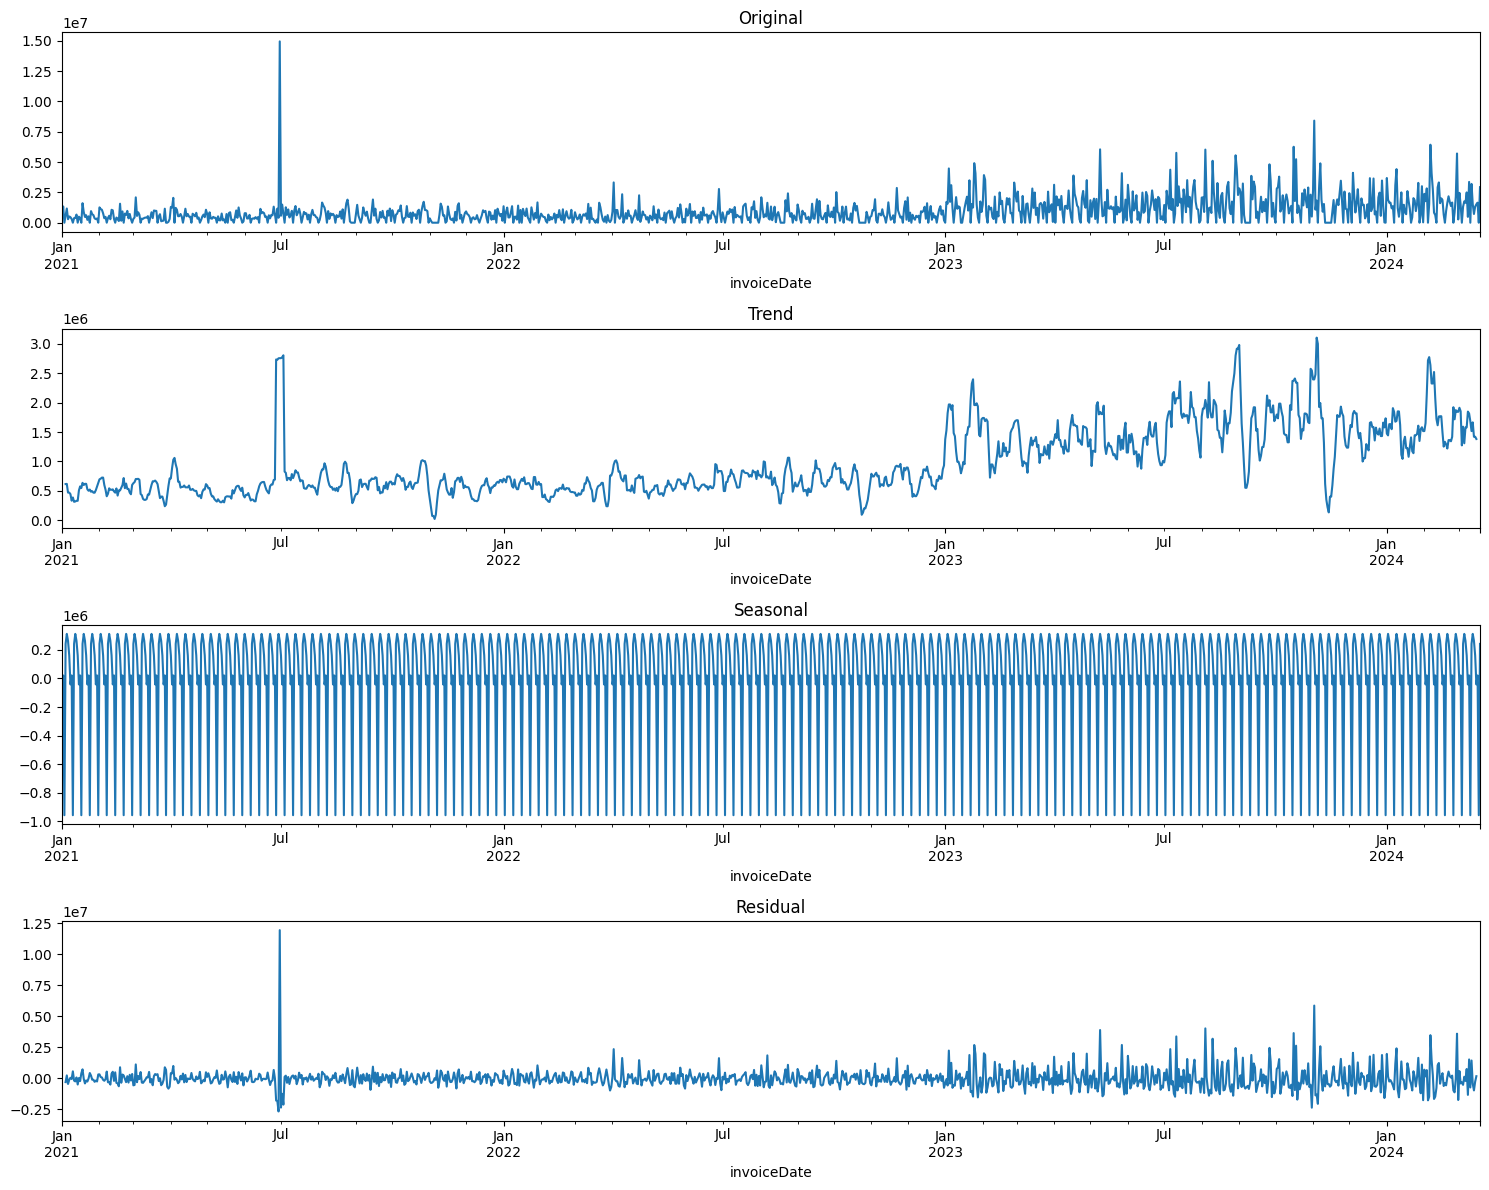

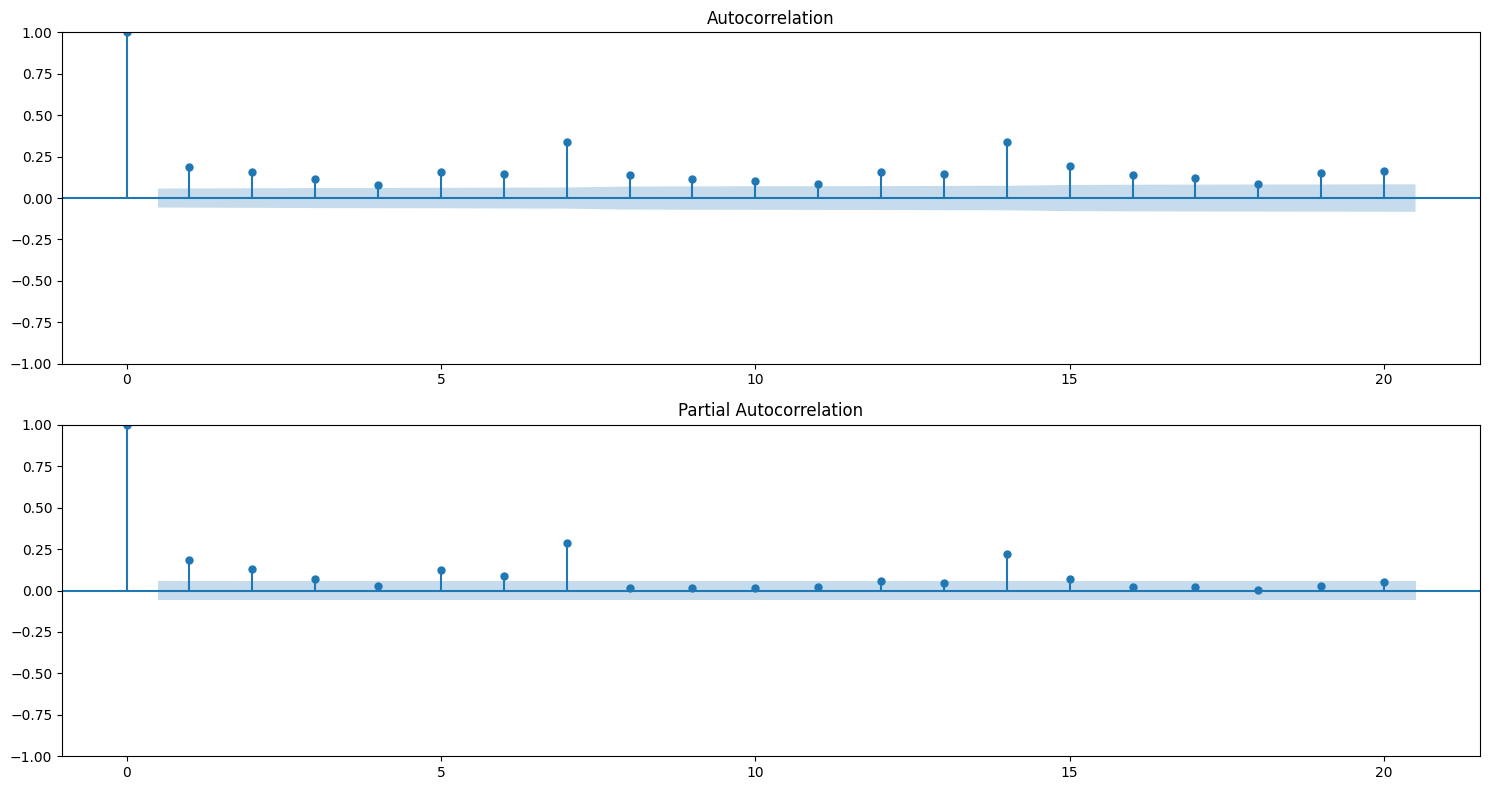


Fitting SARIMAX models...
Testing SARIMAX configurations...


c:\Users\dazau\Downloads\Forecasting\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best SARIMAX config: ((1, 1, 2), (1, 0, 1, 7))
Best AIC: 35229.55
SARIMAX Train MAE: 544697.23, R²: 0.2971
SARIMAX Test MAE: 926954.83, R²: -0.5234

Ljung-Box test p-value: 0.1821
Residuals are autocorrelated

MODEL COMPARISON RESULTS
      Model    Train_MAE     Test_MAE  Train_R2  Test_R2
0  LightGBM   58334.0651   85338.6113    0.9259   0.9788
1    TabPFN          inf          inf    0.0000   0.0000
2   SARIMAX  544697.2342  926954.8252    0.2971  -0.5234

Best performing model: LightGBM
Test MAE: 85338.61
Test R²: 0.9788


ValueError: x and y must have same first dimension, but have shapes (294,) and (308,)

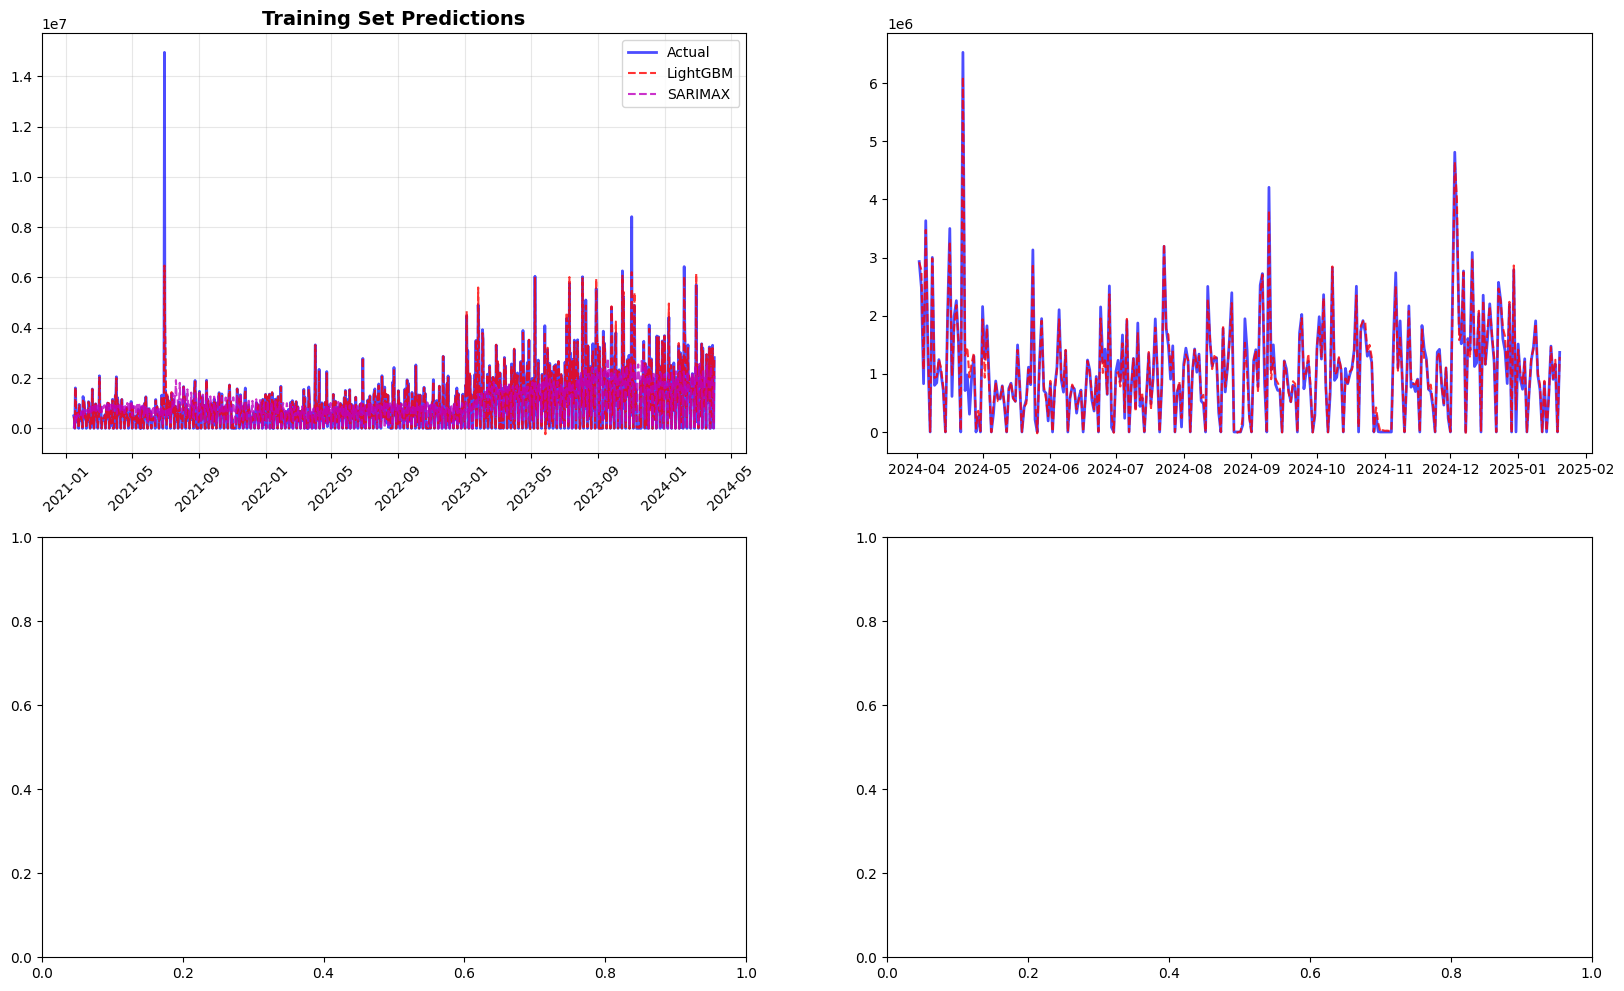

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# ML libraries
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# TabPFN
try:
    from tabpfn import TabPFNRegressor
    TABPFN_AVAILABLE = True
except ImportError:
    print("TabPFN not available. Install with: pip install tabpfn")
    TABPFN_AVAILABLE = False

# SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Statistical libraries
from scipy import stats
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the data
data = """invoiceDate,amount
2021-01-01,437149.38
2021-01-02,1339262.26
2021-01-03,0.0
2021-01-04,561277.74
2021-01-05,1170126.46
2021-01-06,286603.24
2021-01-07,517177.68
2021-01-08,454866.08
2021-01-09,305423.08
2021-01-10,0.0
2021-01-11,376609.0
2021-01-12,389359.6
2021-01-13,671167.9
2021-01-14,0.0
2021-01-15,495097.9
2021-01-16,383186.0
2021-01-17,0.0
2021-01-18,1609278.98
2021-01-19,872979.66
2021-01-20,478284.58
2021-01-21,616486.78
2021-01-22,233833.34
2021-01-23,526787.62
2021-01-24,0.0
2021-01-25,955337.62
2021-01-26,701453.34
2021-01-27,625397.14
2021-01-28,354385.42
2021-01-29,296617.1
2021-01-30,348898.56
2021-01-31,0.0
2021-02-01,1265102.34
2021-02-02,1126755.14
2021-02-03,1067952.84
2021-02-04,771249.86
2021-02-05,367524.28
2021-02-06,482560.32
2021-02-07,0.0
2021-02-08,379877.16
2021-02-09,572553.82
2021-02-10,284436.24
2021-02-11,1063770.3
2021-02-12,1017971.76
2021-02-13,313217.52
2021-02-14,0.0
2021-02-15,424623.66
2021-02-16,330705.6
2021-02-17,137480.66
2021-02-18,1565794.02
2021-02-19,164819.1
2021-02-20,929302.42
2021-02-21,0.0
2021-02-22,752361.56
2021-02-23,635010.38
2021-02-24,975871.1
2021-02-25,358584.24
2021-02-26,722107.4
2021-02-27,291793.2
2021-02-28,0.0
2021-03-01,313019.96
2021-03-02,434079.84
2021-03-03,2090224.8
2021-03-04,558269.24
2021-03-05,857905.46
2021-03-06,658244.48
2021-03-07,0.0
2021-03-08,337066.86
2021-03-09,318632.8
2021-03-10,393981.1
2021-03-11,425082.54
2021-03-12,413736.86
2021-03-13,540616.28
2021-03-14,0.0
2021-03-15,434498.26
2021-03-16,862226.9
2021-03-17,376265.38
2021-03-18,1008199.28
2021-03-19,983473.7
2021-03-20,974257.32
2021-03-21,0.0
2021-03-22,522103.36
2021-03-23,701660.44
2021-03-24,118054.04
2021-03-25,150221.04
2021-03-26,172241.4
2021-03-27,1154571.52
2021-03-28,0.0
2021-03-29,0.0
2021-03-30,74547.0
2021-03-31,308546.5
2021-04-01,1301902.2
2021-04-02,1246711.52
2021-04-03,2050048.18
2021-04-04,0.0
2021-04-05,1224406.78
2021-04-06,1069625.56
2021-04-07,533960.16
2021-04-08,543520.5
2021-04-09,718219.04
2021-04-10,506106.28
2021-04-11,0.0
2021-04-12,518801.4
2021-04-13,1152587.2
2021-04-14,530754.82
2021-04-15,716236.34
2021-04-16,502666.22
2021-04-17,495389.28
2021-04-18,0.0
2021-04-19,739101.18
2021-04-20,650420.72
2021-04-21,525937.04
2021-04-22,818987.6
2021-04-23,333247.92
2021-04-24,429322.82
2021-04-25,0.0
2021-04-26,221401.2
2021-04-27,515902.42
2021-04-28,671819.32
2021-04-29,455464.06
2021-04-30,1068747.28
2021-05-01,734796.2
2021-05-02,0.0
2021-05-03,855225.74
2021-05-04,360695.4
2021-05-05,328466.46
2021-05-06,480603.2
2021-05-07,415338.56
2021-05-08,402453.64
2021-05-09,0.0
2021-05-10,526431.58
2021-05-11,201550.1
2021-05-12,196962.0
2021-05-13,758212.34
2021-05-14,192466.72
2021-05-15,268645.48
2021-05-16,0.0
2021-05-17,714865.66
2021-05-18,0.0
2021-05-19,800388.52
2021-05-20,861524.24
2021-05-21,204958.2
2021-05-22,243658.24
2021-05-23,0.0
2021-05-24,464985.8
2021-05-25,1012906.7
2021-05-26,405128.78
2021-05-27,1256813.64
2021-05-28,601507.18
2021-05-29,351656.82
2021-05-30,0.0
2021-05-31,102824.02
2021-06-01,780459.88
2021-06-02,784973.66
2021-06-03,344246.9
2021-06-04,356164.22
2021-06-05,649156.34
2021-06-06,0.0
2021-06-07,322540.66
2021-06-08,358338.24
2021-06-09,325917.92
2021-06-10,459020.04
2021-06-11,330384.44
2021-06-12,460034.24
2021-06-13,0.0
2021-06-14,1145986.5
2021-06-15,775930.12
2021-06-16,868944.84
2021-06-17,790697.34
2021-06-18,467609.58
2021-06-19,509341.3
2021-06-20,0.0
2021-06-21,614357.78
2021-06-22,358575.76
2021-06-23,641355.5
2021-06-24,608023.36
2021-06-25,1322428.1
2021-06-26,704622.18
2021-06-27,0.0
2021-06-28,1160468.54
2021-06-29,408911.24
2021-06-30,14953139.78
2021-07-01,573131.42
2021-07-02,1493647.66
2021-07-03,718589.42
2021-07-04,0.0
2021-07-05,1270432.24
2021-07-06,641047.28
2021-07-07,1097837.6
2021-07-08,430951.92
2021-07-09,611506.38
2021-07-10,981656.86
2021-07-11,0.0
2021-07-12,1005212.76
2021-07-13,1376281.54
2021-07-14,613327.62
2021-07-15,824235.96
2021-07-16,1151489.52
2021-07-17,725788.4
2021-07-18,0.0
2021-07-19,427038.38
2021-07-20,892175.1
2021-07-21,734670.08
2021-07-22,774840.54
2021-07-23,270344.08
2021-07-24,661340.62
2021-07-25,0.0
2021-07-26,705621.3
2021-07-27,1058085.5
2021-07-28,631789.26
2021-07-29,625973.8
2021-07-30,460848.06
2021-07-31,405236.8
2021-08-01,0.0
2021-08-02,221916.54
2021-08-03,698336.18
2021-08-04,1661870.66
2021-08-05,1416114.1
2021-08-06,1245313.1
2021-08-07,806880.64
2021-08-08,0.0
2021-08-09,955705.86
2021-08-10,315212.16
2021-08-11,767839.26
2021-08-12,609223.04
2021-08-13,730746.44
2021-08-14,580721.02
2021-08-15,0.0
2021-08-16,623702.5
2021-08-17,472905.98
2021-08-18,512510.06
2021-08-19,927055.28
2021-08-20,339993.6
2021-08-21,1100895.9
2021-08-22,0.0
2021-08-23,854661.54
2021-08-24,1599485.12
2021-08-25,1904518.72
2021-08-26,1173182.42
2021-08-27,109377.04
2021-08-28,0.0
2021-08-29,0.0
2021-08-30,0.0
2021-08-31,0.0
2021-09-01,754660.54
2021-09-02,1473437.14
2021-09-03,592661.72
2021-09-04,298963.22000000003
2021-09-05,0.0
2021-09-06,388895.46
2021-09-07,1263267.54
2021-09-08,836999.0
2021-09-09,573026.64
2021-09-10,913412.0
2021-09-11,367742.1
2021-09-12,0.0
2021-09-13,0.0
2021-09-14,956762.16
2021-09-15,1914107.84
2021-09-16,582969.7
2021-09-17,1158073.52
2021-09-18,319164.8
2021-09-19,0.0
2021-09-20,195256.2
2021-09-21,885907.76
2021-09-22,427440.62
2021-09-23,978548.54
2021-09-24,396570.84
2021-09-25,425848.08
2021-09-26,0.0
2021-09-27,988236.54
2021-09-28,585589.4
2021-09-29,1167001.4
2021-09-30,131573.0
2021-10-01,1035979.84
2021-10-02,686465.0
2021-10-03,0.0
2021-10-04,654085.78
2021-10-05,741501.58
2021-10-06,1019683.62
2021-10-07,958497.7
2021-10-08,1421155.7
2021-10-09,481334.54
2021-10-10,0.0
2021-10-11,380258.08
2021-10-12,419626.46
2021-10-13,1369169.3
2021-10-14,508381.04
2021-10-15,470201.72
2021-10-16,824881.32
2021-10-17,0.0
2021-10-18,846569.2
2021-10-19,584049.2
2021-10-20,690558.48
2021-10-21,306687.32
2021-10-22,946327.24
2021-10-23,1071188.14
2021-10-24,0.0
2021-10-25,887759.68
2021-10-26,1387583.2
2021-10-27,1726919.76
2021-10-28,1044883.8
2021-10-29,1037216.78
2021-10-30,958513.86
2021-10-31,0.0
2021-11-01,357261.4
2021-11-02,153684.32
2021-11-03,0.0
2021-11-04,0.0
2021-11-05,0.0
2021-11-06,0.0
2021-11-07,0.0
2021-11-08,0.0
2021-11-09,666848.54
2021-11-10,1574727.22
2021-11-11,1309925.56
2021-11-12,587280.7
2021-11-13,620150.68
2021-11-14,0.0
2021-11-15,113157.84
2021-11-16,1338310.78
2021-11-17,718273.2
2021-11-18,303601.26
2021-11-19,225465.54
2021-11-20,350474.38
2021-11-21,0.0
2021-11-22,896559.66
2021-11-23,181114.0
2021-11-24,1386354.1
2021-11-25,1605184.7
2021-11-26,328084.8
2021-11-27,651314.02
2021-11-28,0.0
2021-11-29,405243.8
2021-11-30,798558.6
2021-12-01,930693.8
2021-12-02,713774.38
2021-12-03,637760.42
2021-12-04,461370.68
2021-12-05,0.0
2021-12-06,374524.4
2021-12-07,448530.24
2021-12-08,284811.22
2021-12-09,311783.74
2021-12-10,624545.48
2021-12-11,266163.42
2021-12-12,0.0
2021-12-13,325219.1
2021-12-14,603286.24
2021-12-15,1024329.44
2021-12-16,884277.86
2021-12-17,973527.88
2021-12-18,359129.44
2021-12-19,0.0
2021-12-20,915085.58
2021-12-21,848353.44
2021-12-22,244404.18
2021-12-23,586746.92
2021-12-24,280053.3
2021-12-25,1033046.36
2021-12-26,0.0
2021-12-27,1156284.26
2021-12-28,815664.44
2021-12-29,570762.68
2021-12-30,726697.0
2021-12-31,160490.28
2022-01-01,1357060.9
2022-01-02,0.0
2022-01-03,884623.42
2022-01-04,1248610.9
2022-01-05,431640.94
2022-01-06,439562.72
2022-01-07,841381.88
2022-01-08,1362413.96
2022-01-09,0.0
2022-01-10,486547.98
2022-01-11,497379.1
2022-01-12,254637.24
2022-01-13,1411695.46
2022-01-14,0.0
2022-01-15,1046047.16
2022-01-16,0.0
2022-01-17,1143786.34
2022-01-18,776678.02
2022-01-19,547890.86
2022-01-20,1166419.32
2022-01-21,436608.7
2022-01-22,232511.08
2022-01-23,0.0
2022-01-24,1266690.24
2022-01-25,766967.96
2022-01-26,253246.74
2022-01-27,796070.98
2022-01-28,391605.06
2022-01-29,1673776.06
2022-01-30,0.0
2022-01-31,369113.62
2022-02-01,745943.04
2022-02-02,585079.14
2022-02-03,467815.04
2022-02-04,464571.68
2022-02-05,129678.4
2022-02-06,0.0
2022-02-07,672182.06
2022-02-08,203775.88
2022-02-09,473667.54
2022-02-10,277145.54
2022-02-11,420692.18
2022-02-12,757407.28
2022-02-13,0.0
2022-02-14,642466.28
2022-02-15,437670.6
2022-02-16,1038272.04
2022-02-17,388882.5
2022-02-18,206145.9
2022-02-19,1104497.16
2022-02-20,0.0
2022-02-21,563880.08
2022-02-22,947623.1
2022-02-23,488873.0
2022-02-24,332376.5
2022-02-25,401422.68
2022-02-26,1061498.72
2022-02-27,0.0
2022-02-28,205070.5
2022-03-01,865086.96
2022-03-02,502088.6
2022-03-03,274891.8
2022-03-04,394777.9
2022-03-05,678919.32
2022-03-06,0.0
2022-03-07,500623.42
2022-03-08,690797.14
2022-03-09,582807.54
2022-03-10,761745.42
2022-03-11,304725.76
2022-03-12,1552891.4
2022-03-13,0.0
2022-03-14,1240115.28
2022-03-15,295416.56
2022-03-16,322203.84
2022-03-17,138177.1
2022-03-18,0.0
2022-03-19,262517.96
2022-03-20,0.0
2022-03-21,1647256.04
2022-03-22,1280793.84
2022-03-23,700815.92
2022-03-24,236823.6
2022-03-25,78185.96
2022-03-26,508291.86
2022-03-27,0.0
2022-03-28,629536.04
2022-03-29,171252.62
2022-03-30,48973.3
2022-03-31,229833.84
2022-04-01,919087.76
2022-04-02,3320887.82
2022-04-03,0.0
2022-04-04,1043017.64
2022-04-05,1047773.24
2022-04-06,481646.06
2022-04-07,325366.72
2022-04-08,545496.7
2022-04-09,2346578.88
2022-04-10,0.0
2022-04-11,293620.58
2022-04-12,794470.92
2022-04-13,326095.46
2022-04-14,1017681.96
2022-04-15,556917.28
2022-04-16,575324.14
2022-04-17,0.0
2022-04-18,349299.86
2022-04-19,616225.92
2022-04-20,1032542.56
2022-04-21,458432.8
2022-04-22,224394.72
2022-04-23,2259982.02
2022-04-24,70004.7
2022-04-25,413105.9
2022-04-26,927678.8
2022-04-27,644608.34
2022-04-28,624322.84
2022-04-29,264610.14
2022-04-30,460334.58
2022-05-01,0.0
2022-05-02,584834.42
2022-05-03,443899.84
2022-05-04,199323.56
2022-05-05,1355061.6
2022-05-06,354794.2
2022-05-07,683862.32
2022-05-08,0.0
2022-05-09,1083019.26
2022-05-10,435482.68
2022-05-11,281107.28
2022-05-12,368908.72
2022-05-13,206678.46
2022-05-14,837761.48
2022-05-15,0.0
2022-05-16,766109.84
2022-05-17,879106.5
2022-05-18,993652.02
2022-05-19,327029.26
2022-05-20,938183.22
2022-05-21,355691.5
2022-05-22,0.0
2022-05-23,361580.2
2022-05-24,519059.54
2022-05-25,1220709.28
2022-05-26,426518.3
2022-05-27,1509653.72
2022-05-28,825378.26
2022-05-29,0.0
2022-05-30,300111.34
2022-05-31,18964.0
2022-06-01,1156190.64
2022-06-02,579119.0
2022-06-03,814691.98
2022-06-04,1543818.04
2022-06-05,0.0
2022-06-06,924436.56
2022-06-07,569570.02
2022-06-08,947032.18
2022-06-09,385334.26
2022-06-10,401734.1
2022-06-11,653449.62
2022-06-12,0.0
2022-06-13,875682.18
2022-06-14,248977.8
2022-06-15,1241652.5
2022-06-16,595506.12
2022-06-17,606136.8
2022-06-18,682414.1
2022-06-19,0.0
2022-06-20,606677.18
2022-06-21,323911.6
2022-06-22,829009.8
2022-06-23,959421.84
2022-06-24,664459.08
2022-06-25,445145.82
2022-06-26,0.0
2022-06-27,1010954.1
2022-06-28,2780570.42
2022-06-29,723972.76
2022-06-30,50961.2
2022-07-01,852529.12
2022-07-02,432184.64
2022-07-03,0.0
2022-07-04,493403.8
2022-07-05,921352.44
2022-07-06,729420.76
2022-07-07,1130162.04
2022-07-08,872558.46
2022-07-09,1092845.94
2022-07-10,0.0
2022-07-11,1293454.58
2022-07-12,435563.78
2022-07-13,642128.58
2022-07-14,548435.12
2022-07-15,451237.12
2022-07-16,519652.12
2022-07-17,0.0
2022-07-18,1339371.0
2022-07-19,1478146.66
2022-07-20,1569856.48
2022-07-21,580171.52
2022-07-22,215228.88
2022-07-23,446758.82
2022-07-24,0.0
2022-07-25,1272900.8
2022-07-26,1100353.34
2022-07-27,1765389.68
2022-07-28,398516.52
2022-07-29,954041.58
2022-07-30,249201.4
2022-07-31,0.0
2022-08-01,440398.14
2022-08-02,2094196.88
2022-08-03,1198246.84
2022-08-04,449276.6
2022-08-05,673743.38
2022-08-06,507569.52
2022-08-07,1643637.56
2022-08-08,364066.2
2022-08-09,259382.32
2022-08-10,1335029.26
2022-08-11,206426.18
2022-08-12,662093.9
2022-08-13,1316602.44
2022-08-14,41723.2
2022-08-15,653665.52
2022-08-16,875590.86
2022-08-17,460450.2
2022-08-18,0.0
2022-08-19,0.0
2022-08-20,0.0
2022-08-21,0.0
2022-08-22,1851980.9
2022-08-23,935728.4
2022-08-24,2421114.5
2022-08-25,949436.42
2022-08-26,496283.16
2022-08-27,794081.4
2022-08-28,0.0
2022-08-29,610894.66
2022-08-30,363003.44
2022-08-31,187516.3
2022-09-01,1500359.68
2022-09-02,1041228.28
2022-09-03,344980.98
2022-09-04,0.0
2022-09-05,989188.54
2022-09-06,694212.24
2022-09-07,786712.74
2022-09-08,313449.36
2022-09-09,320964.18
2022-09-10,487245.22
2022-09-11,0.0
2022-09-12,319784.26
2022-09-13,1564518.3
2022-09-14,362657.12
2022-09-15,319657.1
2022-09-16,1148660.26
2022-09-17,1932921.32
2022-09-18,0.0
2022-09-19,1799899.44
2022-09-20,618114.94
2022-09-21,315940.0
2022-09-22,278570.3
2022-09-23,580399.84
2022-09-24,806039.62
2022-09-25,0.0
2022-09-26,1430004.48
2022-09-27,593831.82
2022-09-28,476597.24
2022-09-29,905199.24
2022-09-30,449631.1
2022-10-01,1255397.6
2022-10-02,0.0
2022-10-03,2522681.6
2022-10-04,899439.0
2022-10-05,784387.02
2022-10-06,159600.76
2022-10-07,512133.78
2022-10-08,1330934.4
2022-10-09,0.0
2022-10-10,780698.94
2022-10-11,1326589.46
2022-10-12,268337.36
2022-10-13,336177.14
2022-10-14,187759.92
2022-10-15,763883.82
2022-10-16,0.0
2022-10-17,1219509.4
2022-10-18,1635349.18
2022-10-19,999599.4
2022-10-20,1389848.98
2022-10-21,653431.8
2022-10-22,0.0
2022-10-23,0.0
2022-10-24,0.0
2022-10-25,0.0
2022-10-26,0.0
2022-10-27,0.0
2022-10-28,897419.12
2022-10-29,509945.1
2022-10-30,0.0
2022-10-31,486313.38
2022-11-01,546762.7
2022-11-02,1044174.06
2022-11-03,1015955.32
2022-11-04,1936442.8
2022-11-05,188375.24
2022-11-06,0.0
2022-11-07,740092.34
2022-11-08,736468.02
2022-11-09,602945.54
2022-11-10,1107746.34
2022-11-11,618013.8
2022-11-12,459079.2
2022-11-13,0.0
2022-11-14,567222.1
2022-11-15,1679373.18
2022-11-16,762068.56
2022-11-17,241104.4
2022-11-18,337434.76
2022-11-19,609552.46
2022-11-20,0.0
2022-11-21,877243.3
2022-11-22,2866221.14
2022-11-23,1014193.68
2022-11-24,704029.1
2022-11-25,421646.66
2022-11-26,501762.5
2022-11-27,0.0
2022-11-28,1204794.66
2022-11-29,1771569.62
2022-11-30,250040.6
2022-12-01,2085571.82
2022-12-02,135611.26
2022-12-03,828612.36
2022-12-04,0.0
2022-12-05,653618.56
2022-12-06,364186.46
2022-12-07,244945.4
2022-12-08,567620.56
2022-12-09,462302.72
2022-12-10,577387.12
2022-12-11,0.0
2022-12-12,942514.26
2022-12-13,865534.68
2022-12-14,989375.4
2022-12-15,1315076.7
2022-12-16,328170.9
2022-12-17,1607321.06
2022-12-18,0.0
2022-12-19,780714.06
2022-12-20,1373403.94
2022-12-21,241096.2
2022-12-22,779940.84
2022-12-23,419289.22
2022-12-24,539649.56
2022-12-25,0.0
2022-12-26,605302.52
2022-12-27,1102767.38
2022-12-28,1361730.06
2022-12-29,667494.9
2022-12-30,1017095.3
2022-12-31,197796.74
2023-01-01,0.0
2023-01-02,1713775.96
2023-01-03,1570190.86
2023-01-04,4474063.2
2023-01-05,1720314.72
2023-01-06,3093723.08
2023-01-07,1221558.0
2023-01-08,0.0
2023-01-09,1088409.36
2023-01-10,2109566.1
2023-01-11,1146958.12
2023-01-12,1352001.08
2023-01-13,1278065.08
2023-01-14,0.0
2023-01-15,0.0
2023-01-16,609173.0
2023-01-17,1209667.32
2023-01-18,1715045.48
2023-01-19,2143726.92
2023-01-20,1001236.4
2023-01-21,3496247.36
2023-01-22,0.0
2023-01-23,1542880.3
2023-01-24,1249839.96
2023-01-25,4910257.8
2023-01-26,4083434.6
2023-01-27,1504216.98
2023-01-28,431320.4
2023-01-29,0.0
2023-01-30,1752040.0
2023-01-31,885055.4
2023-02-01,1493401.34
2023-02-02,3924298.44
2023-02-03,3540370.56
2023-02-04,590315.48
2023-02-05,0.0
2023-02-06,1372929.08
2023-02-07,1102313.14
2023-02-08,1241695.68
2023-02-09,467492.58
2023-02-10,303297.08
2023-02-11,2154889.96
2023-02-12,0.0
2023-02-13,897120.0
2023-02-14,521896.12
2023-02-15,2496792.76
2023-02-16,1529834.64
2023-02-17,1804626.76
2023-02-18,321575.52
2023-02-19,0.0
2023-02-20,1016920.4
2023-02-21,2028175.9
2023-02-22,1501462.6
2023-02-23,1998355.32
2023-02-24,775390.68
2023-02-25,809831.08
2023-02-26,0.0
2023-02-27,3310860.42
2023-02-28,2405123.56
2023-03-01,1744835.88
2023-03-02,2565205.52
2023-03-03,1002510.56
2023-03-04,884696.0
2023-03-05,0.0
2023-03-06,2206577.22
2023-03-07,800293.8
2023-03-08,0.0
2023-03-09,1538987.16
2023-03-10,1585498.44
2023-03-11,665965.68
2023-03-12,0.0
2023-03-13,1067541.5
2023-03-14,2820078.66
2023-03-15,1221842.92
2023-03-16,2488129.84
2023-03-17,645577.04
2023-03-18,1230434.32
2023-03-19,0.0
2023-03-20,1516925.0
2023-03-21,1628196.0
2023-03-22,1469883.64
2023-03-23,335786.72
2023-03-24,1712516.16
2023-03-25,1087604.92
2023-03-26,0.0
2023-03-27,2563095.0
2023-03-28,862948.6
2023-03-29,1238926.88
2023-03-30,1520771.8
2023-03-31,67779.34
2023-04-01,3129212.68
2023-04-02,0.0
2023-04-03,2169030.96
2023-04-04,1439497.56
2023-04-05,1924989.64
2023-04-06,1060634.98
2023-04-07,2204519.0
2023-04-08,769209.92
2023-04-09,0.0
2023-04-10,1375718.84
2023-04-11,1390099.16
2023-04-12,1132098.68
2023-04-13,2657278.08
2023-04-14,1198457.72
2023-04-15,446049.68
2023-04-16,0.0
2023-04-17,3893572.68
2023-04-18,2370588.6
2023-04-19,1986461.44
2023-04-20,1417825.96
2023-04-21,1265735.32
2023-04-22,279838.38
2023-04-23,0.0
2023-04-24,2046111.42
2023-04-25,2617364.52
2023-04-26,1538856.58
2023-04-27,1230964.08
2023-04-28,3509168.84
2023-04-29,145264.3
2023-04-30,0.0
2023-05-01,1856864.28
2023-05-02,498970.4
2023-05-03,1656195.14
2023-05-04,1989068.76
2023-05-05,308360.32
2023-05-06,1959198.0
2023-05-07,0.0
2023-05-08,1719080.94
2023-05-09,6048596.18
2023-05-10,2046726.96
2023-05-11,530602.72
2023-05-12,600657.12
2023-05-13,1705641.58
2023-05-14,0.0
2023-05-15,2716616.28
2023-05-16,1192901.2
2023-05-17,1147251.68
2023-05-18,1358292.04
2023-05-19,1114693.96
2023-05-20,1281637.0
2023-05-21,0.0
2023-05-22,2151662.02
2023-05-23,684585.36
2023-05-24,1289141.96
2023-05-25,862376.4
2023-05-26,971797.72
2023-05-27,4083598.44
2023-05-28,0.0
2023-05-29,489461.4
2023-05-30,1903319.68
2023-05-31,193236.4
2023-06-01,3128037.72
2023-06-02,1821333.92
2023-06-03,532474.12
2023-06-04,0.0
2023-06-05,2584411.96
2023-06-06,1009636.72
2023-06-07,1225064.0
2023-06-08,2267091.32
2023-06-09,234726.96
2023-06-10,866284.16
2023-06-11,0.0
2023-06-12,790161.92
2023-06-13,2483725.02
2023-06-14,821667.2
2023-06-15,946246.96
2023-06-16,2536254.52
2023-06-17,2216687.4
2023-06-18,0.0
2023-06-19,966869.48
2023-06-20,1488421.16
2023-06-21,2662363.26
2023-06-22,1858342.24
2023-06-23,1053352.96
2023-06-24,1944006.28
2023-06-25,0.0
2023-06-26,2128746.68
2023-06-27,1962962.32
2023-06-28,287425.8
2023-06-29,506219.12
2023-06-30,213584.8
2023-07-01,1460720.04
2023-07-02,0.0
2023-07-03,2634905.84
2023-07-04,1787959.92
2023-07-05,1160496.18
2023-07-06,4371853.32
2023-07-07,1055299.84
2023-07-08,1960865.84
2023-07-09,0.0
2023-07-10,754653.0
2023-07-11,5762966.96
2023-07-12,1375477.0
2023-07-13,2995344.92
2023-07-14,1669183.14
2023-07-15,1983438.78
2023-07-16,0.0
2023-07-17,2746505.52
2023-07-18,1924146.64
2023-07-19,870045.88
2023-07-20,3511043.96
2023-07-21,1320090.24
2023-07-22,2134578.84
2023-07-23,0.0
2023-07-24,1826786.64
2023-07-25,2964057.02
2023-07-26,3523532.3
2023-07-27,1734150.36
2023-07-28,1141979.84
2023-07-29,1090216.72
2023-07-30,0.0
2023-07-31,177652.04
2023-08-01,2072423.98
2023-08-02,2092186.64
2023-08-03,886460.5
2023-08-04,6030027.36
2023-08-05,2051089.26
2023-08-06,0.0
2023-08-07,1198319.28
2023-08-08,1254817.42
2023-08-09,803634.88
2023-08-10,5106556.9
2023-08-11,2558690.72
2023-08-12,1341127.84
2023-08-13,0.0
2023-08-14,3270555.56
2023-08-15,980351.78
2023-08-16,397129.0
2023-08-17,2212272.8
2023-08-18,2457037.84
2023-08-19,499953.2
2023-08-20,0.0
2023-08-21,1545943.76
2023-08-22,2987463.36
2023-08-23,3366701.7
2023-08-24,1198817.72
2023-08-25,713328.76
2023-08-26,1743149.74
2023-08-27,0.0
2023-08-28,2783934.12
2023-08-29,5559042.74
2023-08-30,4424894.2
2023-08-31,2285163.7
2023-09-01,2831840.0
2023-09-02,2549890.78
2023-09-03,0.0
2023-09-04,3232287.42
2023-09-05,633736.18
2023-09-06,0.0
2023-09-07,0.0
2023-09-08,0.0
2023-09-09,0.0
2023-09-10,0.0
2023-09-11,3865460.42
2023-09-12,1928190.96
2023-09-13,3391212.58
2023-09-14,2972858.92
2023-09-15,392374.42
2023-09-16,906994.28
2023-09-17,0.0
2023-09-18,1076611.2
2023-09-19,2142315.36
2023-09-20,869182.84
2023-09-21,1716475.0
2023-09-22,964957.56
2023-09-23,1951691.9
2023-09-24,0.0
2023-09-25,1976979.96
2023-09-26,4813177.46
2023-09-27,3434053.7
2023-09-28,495086.48
2023-09-29,1632147.36
2023-09-30,500638.5
2023-10-01,0.0
2023-10-02,2804169.36
2023-10-03,2938812.72
2023-10-04,3799590.0
2023-10-05,915051.98
2023-10-06,1177515.88
2023-10-07,2258639.48
2023-10-08,0.0
2023-10-09,1854453.42
2023-10-10,2329785.58
2023-10-11,1793065.78
2023-10-12,763525.0
2023-10-13,1153641.36
2023-10-14,1390769.86
2023-10-15,0.0
2023-10-16,6262876.62
2023-10-17,1786254.68
2023-10-18,5235926.7
2023-10-19,798199.46
2023-10-20,1412899.38
2023-10-21,883605.7
2023-10-22,0.0
2023-10-23,2426676.8
2023-10-24,1426329.18
2023-10-25,2740504.58
2023-10-26,1948348.24
2023-10-27,1267520.32
2023-10-28,2903202.52
2023-10-29,0.0
2023-10-30,2311481.26
2023-10-31,506805.88
2023-11-01,2632829.36
2023-11-02,8418248.48
2023-11-03,1076927.62
2023-11-04,1828535.88
2023-11-05,0.0
2023-11-06,2901831.42
2023-11-07,4894647.6
2023-11-08,1891220.1
2023-11-09,906058.32
2023-11-10,1544576.62
2023-11-11,0.0
2023-11-12,0.0
2023-11-13,0.0
2023-11-14,0.0
2023-11-15,0.0
2023-11-16,0.0
2023-11-17,937066.38
2023-11-18,1869679.72
2023-11-19,0.0
2023-11-20,1373319.78
2023-11-21,1923582.88
2023-11-22,1451945.28
2023-11-23,2451808.26
2023-11-24,3463437.82
2023-11-25,1676117.14
2023-11-26,0.0
2023-11-27,2568572.92
2023-11-28,1150119.48
2023-11-29,1095939.78
2023-11-30,7062.0
2023-12-01,2433992.0
2023-12-02,1393595.92
2023-12-03,0.0
2023-12-04,4115316.92
2023-12-05,2297261.66
2023-12-06,843885.5
2023-12-07,1606390.98
2023-12-08,2762064.1
2023-12-09,1105214.58
2023-12-10,0.0
2023-12-11,2002675.04
2023-12-12,1446926.1
2023-12-13,1477633.82
2023-12-14,357614.2
2023-12-15,603445.12
2023-12-16,1513555.52
2023-12-17,0.0
2023-12-18,3673339.04
2023-12-19,952814.92
2023-12-20,1220704.46
2023-12-21,3645223.72
2023-12-22,683523.02
2023-12-23,920093.32
2023-12-24,0.0
2023-12-25,2081680.64
2023-12-26,2480589.12
2023-12-27,566094.74
2023-12-28,3477051.1
2023-12-29,1398163.48
2023-12-30,23853.8
2023-12-31,0.0
2024-01-01,3686565.96
2024-01-02,1907409.12
2024-01-03,1648701.4
2024-01-04,1656207.88
2024-01-05,1187179.32
2024-01-06,1361242.16
2024-01-07,0.0
2024-01-08,3086374.66
2024-01-09,4418330.68
2024-01-10,1196312.04
2024-01-11,492905.06
2024-01-12,1270424.96
2024-01-13,2501156.5
2024-01-14,0.0
2024-01-15,1478603.04
2024-01-16,863816.12
2024-01-17,701895.42
2024-01-18,2604958.44
2024-01-19,1794353.68
2024-01-20,1147740.76
2024-01-21,0.0
2024-01-22,447726.16
2024-01-23,2025424.58
2024-01-24,1848856.56
2024-01-25,956268.46
2024-01-26,1563092.78
2024-01-27,3285200.8
2024-01-28,0.0
2024-01-29,601437.52
2024-01-30,3009474.52
2024-01-31,28452.36
2024-02-01,2378814.38
2024-02-02,1773343.66
2024-02-03,2830492.54
2024-02-04,0.0
2024-02-05,1549106.06
2024-02-06,6432532.64
2024-02-07,4084675.14
2024-02-08,2765267.1
2024-02-09,828103.18
2024-02-10,631250.52
2024-02-11,0.0
2024-02-12,2919456.92
2024-02-13,3319508.16
2024-02-14,1608758.7
2024-02-15,2009036.02
2024-02-16,1872593.96
2024-02-17,661168.0
2024-02-18,0.0
2024-02-19,976020.54
2024-02-20,1645892.72
2024-02-21,2178907.84
2024-02-22,1709092.78
2024-02-23,1371503.48
2024-02-24,1666389.8
2024-02-25,0.0
2024-02-26,838351.14
2024-02-27,2171200.4
2024-02-28,5707079.98
2024-02-29,270025.02
2024-03-01,2461394.32
2024-03-02,1472313.96
2024-03-03,0.0
2024-03-04,1316102.74
2024-03-05,1759216.78
2024-03-06,1639660.44
2024-03-07,2497617.64
2024-03-08,483247.04
2024-03-09,3363786.46
2024-03-10,0.0
2024-03-11,3199985.2
2024-03-12,1533627.4
2024-03-13,720566.3
2024-03-14,1321962.42
2024-03-15,1519764.1
2024-03-16,1652543.2
2024-03-17,0.0
2024-03-18,2932402.12
2024-03-19,1012995.34
2024-03-20,1437958.88
2024-03-21,2528904.22
2024-03-22,1240934.6
2024-03-23,3237385.24
2024-03-24,0.0
2024-03-25,0.0
2024-03-26,521959.96
2024-03-27,3216508.48
2024-03-28,1214065.64
2024-03-29,3306289.2
2024-03-30,29420.12
2024-03-31,4711.8
2024-04-01,2813518.06
2024-04-02,2929736.52
2024-04-03,2484479.24
2024-04-04,830174.76
2024-04-05,3632928.24
2024-04-06,1301097.48
2024-04-07,0.0
2024-04-08,3001721.6
2024-04-09,801723.96
2024-04-10,845236.92
2024-04-11,1244509.76
2024-04-12,999660.72
2024-04-13,722277.2
2024-04-14,0.0
2024-04-15,2042369.24
2024-04-16,3498863.6
2024-04-17,611872.0
2024-04-18,1992219.12
2024-04-19,2258004.0
2024-04-20,1507334.52
2024-04-21,0.0
2024-04-22,6527220.6
2024-04-23,712461.52
2024-04-24,981452.48
2024-04-25,305861.88
2024-04-26,945982.9
2024-04-27,1304429.58
2024-04-28,0.0
2024-04-29,266892.24
2024-04-30,0.0
2024-05-01,2156775.06
2024-05-02,1258005.42
2024-05-03,1825886.84
2024-05-04,913256.02
2024-05-05,0.0
2024-05-06,320871.58
2024-05-07,876584.28
2024-05-08,580995.48
2024-05-09,566645.34
2024-05-10,793499.7
2024-05-11,442796.06
2024-05-12,0.0
2024-05-13,749395.6
2024-05-14,838915.44
2024-05-15,583020.5
2024-05-16,526627.28
2024-05-17,1496864.42
2024-05-18,792585.6
2024-05-19,0.0
2024-05-20,422300.26
2024-05-21,556286.54
2024-05-22,1114268.66
2024-05-23,813451.44
2024-05-24,3130844.04
2024-05-25,209006.74
2024-05-26,0.0
2024-05-27,1179818.4
2024-05-28,1949456.72
2024-05-29,712919.92
2024-05-30,665598.1
2024-05-31,190375.0
2024-06-01,831786.04
2024-06-02,0.0
2024-06-03,777401.7
2024-06-04,1102482.74
2024-06-05,2102157.44
2024-06-06,896549.94
2024-06-07,684856.1
2024-06-08,1399143.26
2024-06-09,0.0
2024-06-10,587514.48
2024-06-11,784292.0
2024-06-12,739089.42
2024-06-13,324494.62
2024-06-14,586575.18
2024-06-15,720565.52
2024-06-16,0.0
2024-06-17,583510.08
2024-06-18,1237620.02
2024-06-19,1070461.38
2024-06-20,548037.0
2024-06-21,360448.04
2024-06-22,954163.8
2024-06-23,0.0
2024-06-24,2150351.34
2024-06-25,1197719.68
2024-06-26,1424646.4
2024-06-27,645738.22
2024-06-28,2511610.14
2024-06-29,79279.4
2024-06-30,0.0
2024-07-01,1039054.54
2024-07-02,1231920.8
2024-07-03,868159.7
2024-07-04,1667896.76
2024-07-05,235413.16
2024-07-06,1915371.3
2024-07-07,0.0
2024-07-08,772951.58
2024-07-09,1265208.08
2024-07-10,413393.92
2024-07-11,1873820.92
2024-07-12,440784.22
2024-07-13,587532.28
2024-07-14,0.0
2024-07-15,663320.04
2024-07-16,1344550.38
2024-07-17,484262.16
2024-07-18,908332.94
2024-07-19,1944347.92
2024-07-20,973740.06
2024-07-21,0.0
2024-07-22,843248.18
2024-07-23,3192400.42
2024-07-24,1779510.1
2024-07-25,1485443.68
2024-07-26,908166.94
2024-07-27,1481361.36
2024-07-28,0.0
2024-07-29,676189.0
2024-07-30,806957.2
2024-07-31,85680.28
2024-08-01,1162186.3
2024-08-02,1441783.2
2024-08-03,1226558.88
2024-08-04,0.0
2024-08-05,1036653.72
2024-08-06,1427578.6
2024-08-07,1028092.72
2024-08-08,1339113.88
2024-08-09,533168.94
2024-08-10,488618.46
2024-08-11,0.0
2024-08-12,2503198.44
2024-08-13,1567200.1
2024-08-14,1132116.58
2024-08-15,1255031.28
2024-08-16,1277591.44
2024-08-17,334934.06
2024-08-18,0.0
2024-08-19,1781278.84
2024-08-20,688458.1
2024-08-21,1093706.16
2024-08-22,1629477.44
2024-08-23,2394536.88
2024-08-24,0.0
2024-08-25,0.0
2024-08-26,0.0
2024-08-27,0.0
2024-08-28,120280.16
2024-08-29,1946994.86
2024-08-30,1400423.14
2024-08-31,297387.16
2024-09-01,0.0
2024-09-02,1230305.5
2024-09-03,1414085.44
2024-09-04,780183.0
2024-09-05,2524486.2
2024-09-06,2723114.9
2024-09-07,834863.5
2024-09-08,0.0
2024-09-09,4206666.72
2024-09-10,1067417.02
2024-09-11,1498120.1
2024-09-12,817417.4
2024-09-13,715551.48
2024-09-14,712223.84
2024-09-15,0.0
2024-09-16,1222676.5
2024-09-17,1083256.94
2024-09-18,714486.84
2024-09-19,518824.44
2024-09-20,804807.84
2024-09-21,755861.14
2024-09-22,0.0
2024-09-23,1706287.42
2024-09-24,2020966.36
2024-09-25,742753.5
2024-09-26,1032714.56
2024-09-27,1215407.42
2024-09-28,712409.46
2024-09-29,0.0
2024-09-30,280641.8
2024-10-01,1456850.22
2024-10-02,1982058.96
2024-10-03,1253724.08
2024-10-04,2361156.9
2024-10-05,811803.08
2024-10-06,0.0
2024-10-07,648030.92
2024-10-08,2824297.12
2024-10-09,887682.5
2024-10-10,941762.44
2024-10-11,1258286.94
2024-10-12,1066537.1
2024-10-13,0.0
2024-10-14,1092563.86
2024-10-15,829810.44
2024-10-16,987659.08
2024-10-17,1110769.94
2024-10-18,1417038.98
2024-10-19,2505752.04
2024-10-20,0.0
2024-10-21,1743761.6
2024-10-22,1914994.08
2024-10-23,1727537.18
2024-10-24,1303784.64
2024-10-25,1382036.84
2024-10-26,1202320.56
2024-10-27,0.0
2024-10-28,281777.78
2024-10-29,4623.0
2024-10-30,0.0
2024-10-31,0.0
2024-11-01,0.0
2024-11-02,0.0
2024-11-03,0.0
2024-11-04,0.0
2024-11-05,1629814.88
2024-11-06,2738345.64
2024-11-07,1100668.08
2024-11-08,1909392.62
2024-11-09,879151.34
2024-11-10,0.0
2024-11-11,884651.4
2024-11-12,2168496.34
2024-11-13,770050.16
2024-11-14,835554.28
2024-11-15,695191.88
2024-11-16,908684.92
2024-11-17,0.0
2024-11-18,1830525.68
2024-11-19,1435914.8
2024-11-20,1259833.68
2024-11-21,733323.74
2024-11-22,696600.78
2024-11-23,427968.58
2024-11-24,0.0
2024-11-25,1373214.16
2024-11-26,1421502.2
2024-11-27,808304.56
2024-11-28,462733.1
2024-11-29,1100721.66
2024-11-30,233392.6
2024-12-01,0.0
2024-12-02,2397637.4
2024-12-03,4810333.2
2024-12-04,3520675.36
2024-12-05,1851521.4
2024-12-06,1516803.0
2024-12-07,2768047.44
2024-12-08,0.0
2024-12-09,1606871.84
2024-12-10,1405120.72
2024-12-11,3087940.6
2024-12-12,1126265.52
2024-12-13,1186979.92
2024-12-14,2035413.28
2024-12-15,0.0
2024-12-16,2352300.76
2024-12-17,1163124.8
2024-12-18,1606832.16
2024-12-19,2203397.16
2024-12-20,1644794.7
2024-12-21,1205449.7
2024-12-22,0.0
2024-12-23,2573150.8
2024-12-24,2259530.42
2024-12-25,1602405.84
2024-12-26,1394789.44
2024-12-27,832542.88
2024-12-28,2195611.12
2024-12-29,0.0
2024-12-30,2790051.3
2024-12-31,1099.2
2025-01-01,1512175.04
2025-01-02,911581.7
2025-01-03,734347.08
2025-01-04,1258804.3
2025-01-05,0.0
2025-01-06,668182.06
2025-01-07,1230280.96
2025-01-08,1463302.54
2025-01-09,1910927.8
2025-01-10,976364.8
2025-01-11,721372.88
2025-01-12,0.0
2025-01-13,853216.6
2025-01-14,0.0
2025-01-15,626650.7
2025-01-16,1476741.32
2025-01-17,904809.08
2025-01-18,1163560.34
2025-01-19,0.0
2025-01-20,1368660.76
"""

from io import StringIO
df = pd.read_csv(StringIO(data))

# Data preprocessing
df['invoiceDate'] = pd.to_datetime(df['invoiceDate'])
df = df.sort_values('invoiceDate').reset_index(drop=True)

print("="*70)
print("COMPREHENSIVE TIME SERIES FORECASTING COMPARISON")
print("LightGBM | TabPFN | SARIMAX")
print("="*70)
print(f"Data shape: {df.shape}")
print(f"Date range: {df['invoiceDate'].min()} to {df['invoiceDate'].max()}")
print(f"Zero values: {(df['amount'] == 0).sum()} out of {len(df)} records")

# =============================================================================
# FEATURE ENGINEERING FUNCTIONS
# =============================================================================

def create_time_features(df):
    """Create comprehensive time-based features"""
    df = df.copy()
    df['year'] = df['invoiceDate'].dt.year
    df['month'] = df['invoiceDate'].dt.month
    df['day'] = df['invoiceDate'].dt.day
    df['dayofweek'] = df['invoiceDate'].dt.dayofweek
    df['dayofyear'] = df['invoiceDate'].dt.dayofyear
    df['week'] = df['invoiceDate'].dt.isocalendar().week
    df['quarter'] = df['invoiceDate'].dt.quarter
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
    df['is_month_start'] = df['invoiceDate'].dt.is_month_start.astype(int)
    df['is_month_end'] = df['invoiceDate'].dt.is_month_end.astype(int)
    
    # Cyclical encoding
    df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
    df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)
    df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
    df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    
    # Lag features
    for lag in [1, 2, 3, 7, 14]:
        df[f'amount_lag_{lag}'] = df['amount'].shift(lag)
    
    # Rolling statistics
    for window in [3, 7, 14]:
        df[f'amount_rolling_mean_{window}'] = df['amount'].rolling(window=window).mean()
        df[f'amount_rolling_std_{window}'] = df['amount'].rolling(window=window).std()
        df[f'amount_rolling_min_{window}'] = df['amount'].rolling(window=window).min()
        df[f'amount_rolling_max_{window}'] = df['amount'].rolling(window=window).max()
    
    # Exponential weighted features
    df['amount_ewm_3'] = df['amount'].ewm(span=3).mean()
    df['amount_ewm_7'] = df['amount'].ewm(span=7).mean()
    
    # Binary indicators
    df['is_zero'] = (df['amount'] == 0).astype(int)
    df['prev_zero'] = df['is_zero'].shift(1).fillna(0)
    
    return df

def prepare_ml_features(df):
    """Prepare features for ML models"""
    df_features = create_time_features(df)
    df_clean = df_features.dropna().reset_index(drop=True)
    
    feature_cols = [col for col in df_clean.columns 
                   if col not in ['invoiceDate', 'amount']]
    
    X = df_clean[feature_cols]
    y = df_clean['amount']
    dates = df_clean['invoiceDate']
    
    return X, y, dates, df_clean

# Prepare data
X, y, dates, df_clean = prepare_ml_features(df)
print(f"\nML Feature matrix shape: {X.shape}")
print(f"Features: {X.columns.tolist()}")

# Train/test split (80/20)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
dates_train, dates_test = dates[:split_idx], dates[split_idx:]

# =============================================================================
# 1. LIGHTGBM MODEL
# =============================================================================

print("\n" + "="*70)
print("1. LIGHTGBM TRAINING")
print("="*70)

# LightGBM parameters
lgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0, 0.01, 0.1]
}

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=3)

# LightGBM with GPU support
lgb_model = lgb.LGBMRegressor(
    device='gpu',  # Use GPU
    objective='regression',
    metric='mae',
    random_state=42,
    verbose=-1
)

# Grid search
print("Starting LightGBM Grid Search...")
lgb_grid = GridSearchCV(
    estimator=lgb_model,
    param_grid=lgb_param_grid,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

lgb_grid.fit(X_train, y_train)

print(f"Best LightGBM parameters: {lgb_grid.best_params_}")
print(f"Best CV score (MAE): {-lgb_grid.best_score_:.2f}")

# Best LightGBM model
best_lgb = lgb_grid.best_estimator_
lgb_pred_train = best_lgb.predict(X_train)
lgb_pred_test = best_lgb.predict(X_test)

# LightGBM metrics
lgb_train_mae = mean_absolute_error(y_train, lgb_pred_train)
lgb_test_mae = mean_absolute_error(y_test, lgb_pred_test)
lgb_train_r2 = r2_score(y_train, lgb_pred_train)
lgb_test_r2 = r2_score(y_test, lgb_pred_test)

print(f"LightGBM Train MAE: {lgb_train_mae:.2f}, R²: {lgb_train_r2:.4f}")
print(f"LightGBM Test MAE: {lgb_test_mae:.2f}, R²: {lgb_test_r2:.4f}")

# =============================================================================
# 2. TABPFN MODEL
# =============================================================================

print("\n" + "="*70)
print("2. TABPFN TRAINING")
print("="*70)

tabpfn_pred_train, tabpfn_pred_test = None, None
tabpfn_train_mae, tabpfn_test_mae = np.inf, np.inf
tabpfn_train_r2, tabpfn_test_r2 = 0, 0

if TABPFN_AVAILABLE:
    try:
        print("Training TabPFN model...")
        
        # TabPFN works best with smaller datasets and standardized features
        # Limit to most important features based on LightGBM
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': best_lgb.feature_importances_
        }).sort_values('importance', ascending=False)
        
        top_features = feature_importance.head(15)['feature'].tolist()
        X_train_tab = X_train[top_features]
        X_test_tab = X_test[top_features]
        
        # Scale features for TabPFN
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_tab)
        X_test_scaled = scaler.transform(X_test_tab)
        
        # TabPFN model
        tabpfn_model = TabPFNRegressor(device='cuda', N_ensemble_configurations=4)
        
        # Fit and predict
        tabpfn_model.fit(X_train_scaled, y_train.values)
        tabpfn_pred_train = tabpfn_model.predict(X_train_scaled)
        tabpfn_pred_test = tabpfn_model.predict(X_test_scaled)
        
        # TabPFN metrics
        tabpfn_train_mae = mean_absolute_error(y_train, tabpfn_pred_train)
        tabpfn_test_mae = mean_absolute_error(y_test, tabpfn_pred_test)
        tabpfn_train_r2 = r2_score(y_train, tabpfn_pred_train)
        tabpfn_test_r2 = r2_score(y_test, tabpfn_pred_test)
        
        print(f"TabPFN Train MAE: {tabpfn_train_mae:.2f}, R²: {tabpfn_train_r2:.4f}")
        print(f"TabPFN Test MAE: {tabpfn_test_mae:.2f}, R²: {tabpfn_test_r2:.4f}")
        print(f"Used top {len(top_features)} features: {top_features}")
        
    except Exception as e:
        print(f"TabPFN training failed: {str(e)}")
        print("This might be due to GPU memory or compatibility issues.")
        TABPFN_AVAILABLE = False
else:
    print("TabPFN not available. Skipping...")

# =============================================================================
# 3. SARIMAX MODEL
# =============================================================================

print("\n" + "="*70)
print("3. SARIMAX TRAINING")
print("="*70)

# Prepare data for SARIMAX (needs datetime index)
df_sarimax = df.copy()
df_sarimax.set_index('invoiceDate', inplace=True)
df_sarimax = df_sarimax.asfreq('D')  # Daily frequency

# Handle zero values for SARIMAX (log transformation issues)
df_sarimax['amount_adj'] = df_sarimax['amount'] + 1  # Add 1 to handle zeros

# Split for SARIMAX
sarimax_train = df_sarimax.iloc[:split_idx]
sarimax_test = df_sarimax.iloc[split_idx:]

print(f"SARIMAX train period: {sarimax_train.index[0]} to {sarimax_train.index[-1]}")
print(f"SARIMAX test period: {sarimax_test.index[0]} to {sarimax_test.index[-1]}")

# Test for stationarity
def check_stationarity(series, title):
    """Check if series is stationary using ADF test"""
    result = adfuller(series.dropna())
    print(f"\n{title} - ADF Test Results:")
    print(f"ADF Statistic: {result[0]:.6f}")
    print(f"p-value: {result[1]:.6f}")
    print(f"Stationary: {'Yes' if result[1] < 0.05 else 'No'}")
    return result[1] < 0.05

# Check stationarity
is_stationary = check_stationarity(sarimax_train['amount_adj'], "Original Series")

# Differencing if needed
if not is_stationary:
    sarimax_train['amount_diff'] = sarimax_train['amount_adj'].diff().dropna()
    check_stationarity(sarimax_train['amount_diff'].dropna(), "Differenced Series")

# Seasonal decomposition
print("\nPerforming seasonal decomposition...")
try:
    decomposition = seasonal_decompose(sarimax_train['amount_adj'].dropna(), 
                                     model='additive', period=7)
    
    # Plot decomposition
    fig, axes = plt.subplots(4, 1, figsize=(15, 12))
    
    decomposition.observed.plot(ax=axes[0], title='Original')
    decomposition.trend.plot(ax=axes[1], title='Trend')
    decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
    decomposition.resid.plot(ax=axes[3], title='Residual')
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Decomposition failed: {e}")

# ACF and PACF plots
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
plot_acf(sarimax_train['amount_adj'].dropna(), lags=20, ax=axes[0])
plot_pacf(sarimax_train['amount_adj'].dropna(), lags=20, ax=axes[1])
plt.tight_layout()
plt.show()

# SARIMAX model selection
print("\nFitting SARIMAX models...")

# Try different SARIMAX configurations
sarimax_configs = [
    (1, 1, 1),
    (2, 1, 2),
    (1, 1, 2),
    (2, 1, 1),
    (0, 1, 1),
    (1, 1, 0)
]

seasonal_configs = [
    (1, 1, 1, 7),
    (0, 1, 1, 7),
    (1, 0, 1, 7)
]

best_aic = np.inf
best_sarimax_model = None
best_config = None

print("Testing SARIMAX configurations...")
for p, d, q in sarimax_configs:
    for P, D, Q, S in seasonal_configs:
        try:
            model = SARIMAX(sarimax_train['amount_adj'],
                          order=(p, d, q),
                          seasonal_order=(P, D, Q, S),
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            
            fitted_model = model.fit(disp=False)
            
            if fitted_model.aic < best_aic:
                best_aic = fitted_model.aic
                best_sarimax_model = fitted_model
                best_config = ((p, d, q), (P, D, Q, S))
                
        except Exception as e:
            continue

if best_sarimax_model is not None:
    print(f"Best SARIMAX config: {best_config}")
    print(f"Best AIC: {best_aic:.2f}")
    
    # SARIMAX predictions
    sarimax_pred_train = best_sarimax_model.fittedvalues - 1  # Subtract the 1 we added
    sarimax_pred_test = best_sarimax_model.forecast(steps=len(sarimax_test)) - 1
    
    # Ensure non-negative predictions
    sarimax_pred_train = np.maximum(sarimax_pred_train, 0)
    sarimax_pred_test = np.maximum(sarimax_pred_test, 0)
    
    # SARIMAX metrics
    sarimax_train_mae = mean_absolute_error(sarimax_train['amount'], sarimax_pred_train)
    sarimax_test_mae = mean_absolute_error(sarimax_test['amount'], sarimax_pred_test)
    sarimax_train_r2 = r2_score(sarimax_train['amount'], sarimax_pred_train)
    sarimax_test_r2 = r2_score(sarimax_test['amount'], sarimax_pred_test)
    
    print(f"SARIMAX Train MAE: {sarimax_train_mae:.2f}, R²: {sarimax_train_r2:.4f}")
    print(f"SARIMAX Test MAE: {sarimax_test_mae:.2f}, R²: {sarimax_test_r2:.4f}")
    
    # Residual diagnostics
    residuals = best_sarimax_model.resid
    
    # Ljung-Box test for residual autocorrelation
    lb_test = acorr_ljungbox(residuals.dropna(), lags=10, return_df=True)
    print(f"\nLjung-Box test p-value: {lb_test['lb_pvalue'].iloc[-1]:.4f}")
    print(f"Residuals are {'not ' if lb_test['lb_pvalue'].iloc[-1] < 0.05 else ''}autocorrelated")
    
else:
    print("SARIMAX model fitting failed!")
    sarimax_pred_train = np.zeros(len(sarimax_train))
    sarimax_pred_test = np.zeros(len(sarimax_test))
    sarimax_train_mae = sarimax_test_mae = np.inf
    sarimax_train_r2 = sarimax_test_r2 = 0

# =============================================================================
# 4. MODEL COMPARISON AND VISUALIZATION
# =============================================================================

print("\n" + "="*70)
print("MODEL COMPARISON RESULTS")
print("="*70)

# Create comparison dataframe
comparison_data = {
    'Model': ['LightGBM', 'TabPFN', 'SARIMAX'],
    'Train_MAE': [lgb_train_mae, tabpfn_train_mae, sarimax_train_mae],
    'Test_MAE': [lgb_test_mae, tabpfn_test_mae, sarimax_test_mae],
    'Train_R2': [lgb_train_r2, tabpfn_train_r2, sarimax_train_r2],
    'Test_R2': [lgb_test_r2, tabpfn_test_r2, sarimax_test_r2]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(4))

# Determine best model
best_model_idx = comparison_df['Test_MAE'].idxmin()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
print(f"\nBest performing model: {best_model_name}")
print(f"Test MAE: {comparison_df.loc[best_model_idx, 'Test_MAE']:.2f}")
print(f"Test R²: {comparison_df.loc[best_model_idx, 'Test_R2']:.4f}")

# Visualization of predictions
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Training predictions
axes[0, 0].plot(dates_train, y_train, 'b-', label='Actual', alpha=0.7, linewidth=2)
axes[0, 0].plot(dates_train, lgb_pred_train, 'r--', label='LightGBM', alpha=0.8)
if TABPFN_AVAILABLE and tabpfn_pred_train is not None:
    axes[0, 0].plot(dates_train, tabpfn_pred_train, 'g--', label='TabPFN', alpha=0.8)
axes[0, 0].plot(dates_train, sarimax_pred_train, 'm--', label='SARIMAX', alpha=0.8)
axes[0, 0].set_title('Training Set Predictions', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Test predictions
axes[0, 1].plot(dates_test, y_test, 'b-', label='Actual', alpha=0.7, linewidth=2)
axes[0, 1].plot(dates_test, lgb_pred_test, 'r--', label='LightGBM', alpha=0.8)
if TABPFN_AVAILABLE and tabpfn_pred_test is not None:
    axes[0, 1].plot(dates_test, tabpfn_pred_test, 'g--', label='TabPFN', alpha=0.8)
axes[0, 1].plot(dates_test, sarimax_pred_test, 'm--', label='SARIMAX', alpha=0.8)
axes[0, 1].set_title('Test Set Predictions', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Performance comparison
models = comparison_df['Model'].tolist()
test_maes = comparison_df['Test_MAE'].tolist()
test_r2s = comparison_df['Test_R2'].tolist()

axes[1, 0].bar(models, test_maes, color=['red', 'green', 'magenta'], alpha=0.7)
axes[1, 0].set_title('Test MAE Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Mean Absolute Error')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].bar(models, test_r2s, color=['red', 'green', 'magenta'], alpha=0.7)
axes[1, 1].set_title('Test R² Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature importance for tree-based models
if best_model_name == 'LightGBM':
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_lgb.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['importance'], color='lightblue')
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 15 Feature Importances - LightGBM', fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

# Residual analysis for best model
plt.figure(figsize=(15, 5))

if best_model_name == 'LightGBM':
    residuals_train = y_train - lgb_pred_train
    residuals_test = y_test - lgb_pred_test
elif best_model_name == 'TabPFN' and TABPFN_AVAILABLE:
    residuals_train = y_train - tabpfn_pred_train
    residuals_test = y_test - tabpfn_pred_test
else:
    residuals_train = sarimax_train['amount'] - sarimax_pred_train
    residuals_test = sarimax_test['amount'] - sarimax_pred_test

plt.subplot(1, 3, 1)
plt.hist(residuals_train, bins=15, alpha=0.7, color='blue', label='Train')
plt.hist(residuals_test, bins=15, alpha=0.7, color='red', label='Test')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title(f'{best_model_name} - Residuals Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.scatter(y_train if best_model_name != 'SARIMAX' else sarimax_train['amount'], 
           residuals_train, alpha=0.6, color='blue', label='Train')
plt.scatter(y_test if best_model_name != 'SARIMAX' else sarimax_test['amount'], 
           residuals_test, alpha=0.6, color='red', label='Test')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title(f'{best_model_name} - Residuals vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
# Q-Q plot for residuals normality
from scipy.stats import probplot
probplot(residuals_test, dist="norm", plot=plt)
plt.title(f'{best_model_name} - Q-Q Plot (Test Residuals)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)
print(f"🏆 Best Model: {best_model_name}")
print(f"📊 Key Insights:")
print(f"   • Best Test MAE: {comparison_df.loc[best_model_idx, 'Test_MAE']:.2f}")
print(f"   • Best Test R²: {comparison_df.loc[best_model_idx, 'Test_R2']:.4f}")
print(f"   • Prediction Error: ~{comparison_df.loc[best_model_idx, 'Test_MAE']/y_test.mean()*100:.1f}% of mean")

if best_model_name == 'LightGBM':
    print(f"   • Most important features: {', '.join(feature_importance.head(3)['feature'].tolist())}")
    print(f"   • Model handles zeros well with tree-based approach")
elif best_model_name == 'SARIMAX':
    print(f"   • Captures temporal patterns and seasonality")
    print(f"   • Best for pure time series forecasting")
else:
    print(f"   • TabPFN provides strong performance on tabular data")

print(f"\n📈 Recommendations:")
print(f"   • Use {best_model_name} for production forecasting")
print(f"   • Consider ensemble of top 2 models for robustness")
print(f"   • Monitor model performance as new data arrives")
print

In [ ]:
# In a Jupyter/Colab notebook cell                                              :
!pip install pandas numpy matplotlib seaborn xgboost lightgbm scikit-learn plotly statsmodels tabpfn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.9 MB 12.2 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.9 MB 11.7 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/9.9 MB 10.7 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.9 MB 9.4 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.9 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 8.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.1 MB 7.6 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/11.1 MB 8.4 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.1 MB 8.6 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.1 MB 9.2 MB/s eta 0:00:01
   ------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
altair 5.5.0 requires jsonschema>=3.0, which is not installed.
langchain 0.3.25 requires langchain-core<1.0.0,>=0.3.58, which is not installed.
langchain 0.3.25 requires langsmith<0.4,>=0.1.17, which is not installed.
langchain 0.3.25 requires pydantic<3.0.0,>=2.7.4, which is not installed.
streamlit 1.45.1 requires cachetools<6,>=4.0, which is not installed.
streamlit 1.45.1 requires tenacity<10,>=8.1.0, which is not installed.
supervision 0.21.0 requires defusedxml<0.8.0,>=0.7.1, which is not installed.
streamlit 1.45.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.


In [ ]:
!pip install tabpfn

In [ ]:
!pip install xgboost[gpu] pandas numpy matplotlib seaborn scikit-learn scipy plotly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# LightGBM and ML libraries
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Statistical libraries
from scipy import stats
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the data from a.csv
df = pd.read_csv('merged_sum_daily_agg_filled.csv')

# Data preprocessing
df['invoiceDate'] = pd.to_datetime(df['invoiceDate'])
df = df.sort_values('invoiceDate').reset_index(drop=True)

print("Data Overview:")
print(f"Shape: {df.shape}")
print(f"Date range: {df['invoiceDate'].min()} to {df['invoiceDate'].max()}")
print(f"Missing values: {df.isnull().sum().sum()}")
print("\nBasic Statistics:")
print(df['amount'].describe())

# =============================================================================
# 1. VISUALIZATION AND SEASONALITY ANALYSIS
# =============================================================================

def create_time_features(df):
    """Create time-based features for analysis"""
    df = df.copy()
    df['year'] = df['invoiceDate'].dt.year
    df['month'] = df['invoiceDate'].dt.month
    df['day'] = df['invoiceDate'].dt.day
    df['dayofweek'] = df['invoiceDate'].dt.dayofweek
    df['dayofyear'] = df['invoiceDate'].dt.dayofyear
    df['week'] = df['invoiceDate'].dt.isocalendar().week
    df['quarter'] = df['invoiceDate'].dt.quarter
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
    df['month_start'] = df['invoiceDate'].dt.is_month_start.astype(int)
    df['month_end'] = df['invoiceDate'].dt.is_month_end.astype(int)
    
    # Create lag features
    for lag in [1, 2, 3, 7, 14]:
        df[f'amount_lag_{lag}'] = df['amount'].shift(lag)
    
    # Rolling statistics
    for window in [3, 7, 14]:
        df[f'amount_rolling_mean_{window}'] = df['amount'].rolling(window=window).mean()
        df[f'amount_rolling_std_{window}'] = df['amount'].rolling(window=window).std()
    
    # Two-week periods
    df['two_week_period'] = ((df['invoiceDate'] - df['invoiceDate'].min()).dt.days // 14) + 1
    
    return df

df_features = create_time_features(df)

# Daily visualization
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(df['invoiceDate'], df['amount'], linewidth=2, color='steelblue')
plt.title('Daily Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Day of week analysis
plt.subplot(2, 2, 2)
day_avg = df_features.groupby('dayofweek')['amount'].agg(['mean', 'std']).reset_index()
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_avg['day_name'] = [day_names[i] for i in day_avg['dayofweek']]
plt.bar(day_avg['day_name'], day_avg['mean'], yerr=day_avg['std'], 
        capsize=5, color='lightcoral', alpha=0.7)
plt.title('Average Sales by Day of Week', fontsize=14, fontweight='bold')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Weekly aggregation
plt.subplot(2, 2, 3)
weekly_data = df_features.groupby('week')['amount'].sum().reset_index()
plt.plot(weekly_data['week'], weekly_data['amount'], marker='o', linewidth=2, color='green')
plt.title('Weekly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Week')
plt.ylabel('Total Amount')
plt.grid(True, alpha=0.3)

# Two-week periods
plt.subplot(2, 2, 4)
biweekly_data = df_features.groupby('two_week_period')['amount'].sum().reset_index()
plt.bar(biweekly_data['two_week_period'], biweekly_data['amount'], 
        color='orange', alpha=0.7)
plt.title('Bi-weekly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Two-week Period')
plt.ylabel('Total Amount')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 2. OUTLIER DETECTION
# =============================================================================

def detect_outliers(df, methods=['zscore', 'iqr', 'isolation']):
    """Detect outliers using multiple methods"""
    outliers_dict = {}
    
    # Z-Score method
    if 'zscore' in methods:
        z_scores = np.abs(zscore(df['amount']))
        outliers_dict['zscore'] = df[z_scores > 3].index.tolist()
    
    # IQR method
    if 'iqr' in methods:
        Q1 = df['amount'].quantile(0.25)
        Q3 = df['amount'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_dict['iqr'] = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)].index.tolist()
    
    # Isolation Forest
    if 'isolation' in methods:
        from sklearn.ensemble import IsolationForest
        iso_forest = IsolationForest(contamination=0.1, random_state=42)
        outliers_pred = iso_forest.fit_predict(df[['amount']])
        outliers_dict['isolation'] = df[outliers_pred == -1].index.tolist()
    
    return outliers_dict

outliers = detect_outliers(df)

print("\n" + "="*50)
print("OUTLIER DETECTION RESULTS")
print("="*50)

for method, indices in outliers.items():
    print(f"\n{method.upper()} Method:")
    print(f"Number of outliers: {len(indices)}")
    if indices:
        outlier_data = df.iloc[indices][['invoiceDate', 'amount']]
        print("Outlier dates and amounts:")
        for idx, row in outlier_data.iterrows():
            print(f"  {row['invoiceDate'].strftime('%Y-%m-%d')}: {row['amount']:,.2f}")

# Visualize outliers
plt.figure(figsize=(15, 5))
for i, (method, indices) in enumerate(outliers.items(), 1):
    plt.subplot(1, 3, i)
    plt.plot(df['invoiceDate'], df['amount'], 'b-', alpha=0.7, label='Normal')
    if indices:
        plt.scatter(df.iloc[indices]['invoiceDate'], df.iloc[indices]['amount'], 
                   color='red', s=50, label='Outliers', zorder=5)
    plt.title(f'Outliers - {method.upper()}', fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 3. FEATURE ENGINEERING FOR LIGHTGBM
# =============================================================================

def prepare_features(df):
    """Prepare features for LightGBM model"""
    df_model = create_time_features(df)
    
    # Remove rows with NaN values (due to lag features)
    df_model = df_model.dropna().reset_index(drop=True)
    
    # Feature columns (excluding target and date)
    feature_cols = [col for col in df_model.columns if col not in ['invoiceDate', 'amount']]
    
    X = df_model[feature_cols]
    y = df_model['amount']
    
    return X, y, df_model

X, y, df_model = prepare_features(df)

print(f"\nFeature Engineering Complete:")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Features: {list(X.columns)}")

# =============================================================================
# 4. LIGHTGBM MODEL WITH GPU ACCELERATION
# =============================================================================

# Time series split
tscv = TimeSeriesSplit(n_splits=3)

# LightGBM parameters for GPU (optimized parameter grid)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0, 0.01, 0.1],
    'num_leaves': [31, 50, 100]
}

# LightGBM model with GPU support
lgb_model = lgb.LGBMRegressor(
    device='gpu',  # Use GPU
    gpu_platform_id=0,
    gpu_device_id=0,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

print("\n" + "="*50)
print("STARTING LIGHTGBM GRID SEARCH WITH GPU")
print("="*50)

# Grid search with time series cross-validation
grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    n_jobs=1,  # Set to 1 when using GPU
    verbose=1
)

# Fit the model
grid_search.fit(X, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score (MAE): {-grid_search.best_score_:.2f}")

# Best model
best_model = grid_search.best_estimator_

# =============================================================================
# 5. FEATURE IMPORTANCE ANALYSIS
# =============================================================================

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='lightgreen')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances - LightGBM Model', fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# 6. MODEL EVALUATION AND PREDICTIONS
# =============================================================================

# Split data for final evaluation
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train final model
final_model = lgb.LGBMRegressor(
    **grid_search.best_params_, 
    device='gpu', 
    gpu_platform_id=0,
    gpu_device_id=0,
    random_state=42,
    verbose=-1
)
final_model.fit(X_train, y_train)

# Predictions
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

# Calculate metrics
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("\n" + "="*50)
print("MODEL EVALUATION RESULTS")
print("="*50)
print(f"Training Metrics:")
print(f"  MAE: {train_mae:.2f}")
print(f"  RMSE: {train_rmse:.2f}")
print(f"  R²: {train_r2:.4f}")
print(f"\nTesting Metrics:")
print(f"  MAE: {test_mae:.2f}")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  R²: {test_r2:.4f}")

# Prediction visualization
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(df_model.iloc[:train_size]['invoiceDate'], y_train, label='Actual (Train)', color='blue', alpha=0.7)
plt.plot(df_model.iloc[:train_size]['invoiceDate'], y_pred_train, label='Predicted (Train)', color='red', alpha=0.7)
plt.title('Training Set: Actual vs Predicted', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(df_model.iloc[train_size:]['invoiceDate'], y_test, label='Actual (Test)', color='blue', alpha=0.7)
plt.plot(df_model.iloc[train_size:]['invoiceDate'], y_pred_test, label='Predicted (Test)', color='red', alpha=0.7)
plt.title('Test Set: Actual vs Predicted', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.scatter(y_train, y_pred_train, alpha=0.6, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Training Set Scatter Plot (R² = {train_r2:.4f})', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_test, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Test Set Scatter Plot (R² = {test_r2:.4f})', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Residual analysis
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(residuals_train, bins=20, alpha=0.7, color='blue', label='Train')
plt.hist(residuals_test, bins=20, alpha=0.7, color='green', label='Test')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_pred_train, residuals_train, alpha=0.6, color='blue', label='Train')
plt.scatter(y_pred_test, residuals_test, alpha=0.6, color='green', label='Test')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 7. ADDITIONAL LIGHTGBM SPECIFIC ANALYSIS
# =============================================================================

# Plot LightGBM training progress
lgb.plot_metric(final_model.evals_result_, metric='l2')
plt.title('LightGBM Training Progress', fontweight='bold')
plt.show()

# SHAP values for model interpretation (if shap is available)
try:
    import shap
    explainer = shap.TreeExplainer(final_model)
    shap_values = explainer.shap_values(X_test)
    
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
    plt.title('SHAP Feature Importance', fontweight='bold')
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("SHAP not available. Install with: pip install shap")

print("\n" + "="*50)
print("ANALYSIS COMPLETE!")
print("="*50)
print("Key Insights:")
print(f"1. The LightGBM model achieved an R² score of {test_r2:.4f} on test data")
print(f"2. Test MAE is {test_mae:.2f}, meaning average prediction error is ~{test_mae/y_test.mean()*100:.1f}%")
print(f"3. Most important features: {', '.join(feature_importance.head(3)['feature'].tolist())}")
print(f"4. Model is ready for future predictions!")
print("   To predict future values, prepare features for new dates and use final_model.predict()")

# Future prediction example
print("\n" + "="*50)
print("FUTURE PREDICTION SETUP")
print("="*50)

def predict_future(model, last_data, num_days=7):
    """
    Predict future values based on the trained model
    """
    future_dates = pd.date_range(
        start=last_data['invoiceDate'].max() + timedelta(days=1),
        periods=num_days,
        freq='D'
    )
    
    future_df = pd.DataFrame({'invoiceDate': future_dates, 'amount': np.nan})
    
    # Combine with historical data for feature engineering
    combined_df = pd.concat([last_data, future_df], ignore_index=True)
    combined_features = create_time_features(combined_df)
    
    # Get features for future dates
    future_features = combined_features.tail(num_days)
    feature_cols = [col for col in combined_features.columns if col not in ['invoiceDate', 'amount']]
    
    # Handle NaN values in features (use forward fill or median)
    future_X = future_features[feature_cols].fillna(method='ffill').fillna(
        combined_features[feature_cols].median()
    )
    
    # Predict
    future_predictions = model.predict(future_X)
    
    result_df = pd.DataFrame({
        'invoiceDate': future_dates,
        'predicted_amount': future_predictions
    })
    
    return result_df

# Example future prediction0
future_pred = predict_future(final_model, df, num_days=7)
print("Next 7 days predictions:")
print(future_pred)

ModuleNotFoundError: No module named 'seaborn'

In [1]:
!pip install lightgbm --install-option=--gpu


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --install-option


In [2]:
conda install -c conda-forge lightgbm

Retrieving notices: done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\dazau\Downloads\Forecasting\.conda

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    khronos-opencl-icd-loader-2024.10.24|       h2466b09_1          46 KB  conda-forge
    libboost-1.86.0            |       hb0986bb_3         2.4 MB  conda-forge
    liblightgbm-4.6.0          |   cpu_hfb536c0_2         1.2 MB  conda-forge
    liblzma-5.8.1              |       h2466b09_2         102 KB  conda-forge
    liblzma-devel-5.8.1        |       h2466b09_2         126 KB  conda-forge
    libsqlite-3.50.1           |       h67fdade_3         1.2 MB  conda-forge
    libxml2-2.13.8             |       h442d1da_0         1.4 MB  conda-forge
    libzlib-1.3.1              |       h2466b09_2 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# LightGBM and ML libraries
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Statistical libraries
from scipy import stats
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the data
df = pd.read_csv('merged_sum_daily_agg_filled.csv')

# Data preprocessing
df['invoiceDate'] = pd.to_datetime(df['invoiceDate'])
df = df.sort_values('invoiceDate').reset_index(drop=True)

print("Data Overview:")
print(f"Shape: {df.shape}")
print(f"Date range: {df['invoiceDate'].min()} to {df['invoiceDate'].max()}")
print(f"Missing values: {df.isnull().sum().sum()}")
print("\nBasic Statistics:")
print(df['amount'].describe())

# =============================================================================
# SMAPE CALCULATION FUNCTION
# =============================================================================
def smape(y_true, y_pred):
    """
    Calculate Symmetric Mean Absolute Percentage Error (SMAPE)
    """
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def mape(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error (MAPE)
    """
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))

# =============================================================================
# 1. VISUALIZATION AND SEASONALITY ANALYSIS
# =============================================================================
def create_time_features(df):
    """Create time-based features for analysis"""
    df = df.copy()
    df['year'] = df['invoiceDate'].dt.year
    df['month'] = df['invoiceDate'].dt.month
    df['day'] = df['invoiceDate'].dt.day
    df['dayofweek'] = df['invoiceDate'].dt.dayofweek
    df['dayofyear'] = df['invoiceDate'].dt.dayofyear
    df['week'] = df['invoiceDate'].dt.isocalendar().week
    df['quarter'] = df['invoiceDate'].dt.quarter
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
    df['month_start'] = df['invoiceDate'].dt.is_month_start.astype(int)
    df['month_end'] = df['invoiceDate'].dt.is_month_end.astype(int)
    
    # Create lag features
    for lag in [1, 2, 3, 7, 14]:
        df[f'amount_lag_{lag}'] = df['amount'].shift(lag)
    
    # Rolling statistics
    for window in [3, 7, 14]:
        df[f'amount_rolling_mean_{window}'] = df['amount'].rolling(window=window).mean()
        df[f'amount_rolling_std_{window}'] = df['amount'].rolling(window=window).std()
    
    # Two-week periods
    df['two_week_period'] = ((df['invoiceDate'] - df['invoiceDate'].min()).dt.days // 14) + 1
    
    return df

df_features = create_time_features(df)

# Daily visualization
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(df['invoiceDate'], df['amount'], linewidth=2, color='steelblue')
plt.title('Daily Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Day of week analysis
plt.subplot(2, 2, 2)
day_avg = df_features.groupby('dayofweek')['amount'].agg(['mean', 'std']).reset_index()
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_avg['day_name'] = [day_names[i] for i in day_avg['dayofweek']]
plt.bar(day_avg['day_name'], day_avg['mean'], yerr=day_avg['std'], 
        capsize=5, color='lightcoral', alpha=0.7)
plt.title('Average Sales by Day of Week', fontsize=14, fontweight='bold')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Weekly aggregation
plt.subplot(2, 2, 3)
weekly_data = df_features.groupby('week')['amount'].sum().reset_index()
plt.plot(weekly_data['week'], weekly_data['amount'], marker='o', linewidth=2, color='green')
plt.title('Weekly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Week')
plt.ylabel('Total Amount')
plt.grid(True, alpha=0.3)

# Two-week periods
plt.subplot(2, 2, 4)
biweekly_data = df_features.groupby('two_week_period')['amount'].sum().reset_index()
plt.bar(biweekly_data['two_week_period'], biweekly_data['amount'], 
        color='orange', alpha=0.7)
plt.title('Bi-weekly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Two-week Period')
plt.ylabel('Total Amount')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 2. OUTLIER DETECTION
# =============================================================================
def detect_outliers(df, methods=['zscore', 'iqr', 'isolation']):
    """Detect outliers using multiple methods"""
    outliers_dict = {}
    
    # Z-Score method
    if 'zscore' in methods:
        z_scores = np.abs(zscore(df['amount']))
        outliers_dict['zscore'] = df[z_scores > 3].index.tolist()
    
    # IQR method
    if 'iqr' in methods:
        Q1 = df['amount'].quantile(0.25)
        Q3 = df['amount'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_dict['iqr'] = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)].index.tolist()
    
    # Isolation Forest
    if 'isolation' in methods:
        from sklearn.ensemble import IsolationForest
        iso_forest = IsolationForest(contamination=0.1, random_state=42)
        outliers_pred = iso_forest.fit_predict(df[['amount']])
        outliers_dict['isolation'] = df[outliers_pred == -1].index.tolist()
    
    return outliers_dict

outliers = detect_outliers(df)

print("\n" + "="*50)
print("OUTLIER DETECTION RESULTS")
print("="*50)
for method, indices in outliers.items():
    print(f"\n{method.upper()} Method:")
    print(f"Number of outliers: {len(indices)}")
    if indices:
        outlier_data = df.iloc[indices][['invoiceDate', 'amount']]
        print("Outlier dates and amounts:")
        for idx, row in outlier_data.iterrows():
            print(f"  {row['invoiceDate'].strftime('%Y-%m-%d')}: {row['amount']:,.2f}")

# Visualize outliers
plt.figure(figsize=(15, 5))
for i, (method, indices) in enumerate(outliers.items(), 1):
    plt.subplot(1, 3, i)
    plt.plot(df['invoiceDate'], df['amount'], 'b-', alpha=0.7, label='Normal')
    if indices:
        plt.scatter(df.iloc[indices]['invoiceDate'], df.iloc[indices]['amount'], 
                   color='red', s=50, label='Outliers', zorder=5)
    plt.title(f'Outliers - {method.upper()}', fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 3. FEATURE ENGINEERING FOR LIGHTGBM
# =============================================================================
def prepare_features(df):
    """Prepare features for LightGBM model"""
    df_model = create_time_features(df)
    
    # Remove rows with NaN values (due to lag features)
    df_model = df_model.dropna().reset_index(drop=True)
    
    # Feature columns (excluding target and date)
    feature_cols = [col for col in df_model.columns if col not in ['invoiceDate', 'amount']]
    
    X = df_model[feature_cols]
    y = df_model['amount']
    
    return X, y, df_model

X, y, df_model = prepare_features(df)
print(f"\nFeature Engineering Complete:")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Features: {list(X.columns)}")

# =============================================================================
# 4. IMPROVED LIGHTGBM MODEL WITH VALIDATION SET
# =============================================================================
# Split data for training, validation, and testing
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))
test_size = len(X) - train_size - val_size

X_train = X[:train_size]
X_val = X[train_size:train_size + val_size]
X_test = X[train_size + val_size:]

y_train = y[:train_size]
y_val = y[train_size:train_size + val_size]
y_test = y[train_size + val_size:]

print(f"\nData Split:")
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

# Time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=3)

# Optimized parameter grid for faster execution
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'num_leaves': [31, 50]
}

# LightGBM model (CPU version for compatibility)
lgb_model = lgb.LGBMRegressor(
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

print("\n" + "="*50)
print("STARTING LIGHTGBM GRID SEARCH")
print("="*50)

# Grid search with time series cross-validation
grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score (MAE): {-grid_search.best_score_:.2f}")

# Train final model with validation set for tracking
final_model = lgb.LGBMRegressor(
    **grid_search.best_params_,
    random_state=42,
    verbose=-1
)

# Fit with validation set for eval_result tracking
final_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_names=['train', 'valid'],
    eval_metric='l2',
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(0)]
)

# =============================================================================
# 5. FEATURE IMPORTANCE ANALYSIS
# =============================================================================
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='lightgreen')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances - LightGBM Model', fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# 6. MODEL EVALUATION WITH SMAPE
# =============================================================================
# Predictions
y_pred_train = final_model.predict(X_train)
y_pred_val = final_model.predict(X_val)
y_pred_test = final_model.predict(X_test)

# Calculate comprehensive metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape_score = mape(y_true, y_pred)
    smape_score = smape(y_true, y_pred)
    
    return {
        'Dataset': dataset_name,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape_score,
        'SMAPE': smape_score
    }

# Calculate metrics for all sets
metrics_train = calculate_metrics(y_train, y_pred_train, 'Training')
metrics_val = calculate_metrics(y_val, y_pred_val, 'Validation')
metrics_test = calculate_metrics(y_test, y_pred_test, 'Test')

# Create metrics dataframe
metrics_df = pd.DataFrame([metrics_train, metrics_val, metrics_test])
print("metrics_df:")
print("\n" + "="*50)
print("COMPREHENSIVE MODEL EVALUATION RESULTS")
print("="*50)
print(metrics_df.round(4))

# Detailed metrics print
for metrics in [metrics_train, metrics_val, metrics_test]:
    print(f"\n{metrics['Dataset']} Metrics:")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  R²: {metrics['R²']:.4f}")
    print(f"  MAPE: {metrics['MAPE']:.2f}%")
    print(f"  SMAPE: {metrics['SMAPE']:.2f}%")

# =============================================================================
# 7. VISUALIZATION OF RESULTS
# =============================================================================
# Prediction visualization
plt.figure(figsize=(20, 12))

# Time series plot
plt.subplot(2, 3, 1)
train_dates = df_model.iloc[:train_size]['invoiceDate']
val_dates = df_model.iloc[train_size:train_size + val_size]['invoiceDate']
test_dates = df_model.iloc[train_size + val_size:]['invoiceDate']

plt.plot(train_dates, y_train, label='Actual (Train)', color='blue', alpha=0.7)
plt.plot(val_dates, y_val, label='Actual (Val)', color='orange', alpha=0.7)
plt.plot(test_dates, y_test, label='Actual (Test)', color='green', alpha=0.7)
plt.plot(train_dates, y_pred_train, label='Predicted (Train)', color='red', alpha=0.7, linestyle='--')
plt.plot(val_dates, y_pred_val, label='Predicted (Val)', color='purple', alpha=0.7, linestyle='--')
plt.plot(test_dates, y_pred_test, label='Predicted (Test)', color='brown', alpha=0.7, linestyle='--')

plt.title('Time Series: Actual vs Predicted', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Scatter plots
plt.subplot(2, 3, 2)
plt.scatter(y_train, y_pred_train, alpha=0.6, color='blue', label='Train')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Training Set (R² = {metrics_train["R²"]:.4f})', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 3)
plt.scatter(y_val, y_pred_val, alpha=0.6, color='orange', label='Validation')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Validation Set (R² = {metrics_val["R²"]:.4f})', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 4)
plt.scatter(y_test, y_pred_test, alpha=0.6, color='green', label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Test Set (R² = {metrics_test["R²"]:.4f})', fontweight='bold')
plt.grid(True, alpha=0.3)

# Residual analysis
plt.subplot(2, 3, 5)
residuals_train = y_train - y_pred_train
residuals_val = y_val - y_pred_val
residuals_test = y_test - y_pred_test

plt.hist(residuals_train, bins=20, alpha=0.7, color='blue', label='Train')
plt.hist(residuals_val, bins=20, alpha=0.7, color='orange', label='Val')
plt.hist(residuals_test, bins=20, alpha=0.7, color='green', label='Test')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Metrics comparison
plt.subplot(2, 3, 6)
metrics_plot = metrics_df.set_index('Dataset')[['MAE', 'RMSE', 'SMAPE']]
metrics_plot.plot(kind='bar', ax=plt.gca())
plt.title('Metrics Comparison Across Datasets', fontweight='bold')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# =============================================================================
# 8. LIGHTGBM TRAINING PROGRESS (FIXED)
# =============================================================================
# Plot LightGBM training progress (now works because we have eval_result)
if final_model.evals_result_:
    plt.figure(figsize=(10, 6))
    lgb.plot_metric(final_model.evals_result_, metric='l2')
    plt.title('LightGBM Training Progress', fontweight='bold')
    plt.show()
else:
    print("No evaluation results available for plotting training progress.")

# =============================================================================
# 9. SHAP ANALYSIS (OPTIONAL)
# =============================================================================
try:
    import shap
    
    # Create SHAP explainer
    explainer = shap.TreeExplainer(final_model)
    shap_values = explainer.shap_values(X_test.head(100))  # Use subset for faster computation
    
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_test.head(100), plot_type="bar", show=False)
    plt.title('SHAP Feature Importance', fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # SHAP waterfall plot for a single prediction
    plt.figure(figsize=(12, 6))
    shap.waterfall_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])
    plt.show()
    
except ImportError:
    print("SHAP not available. Install with: pip install shap")

# =============================================================================
# 10. FUTURE PREDICTION FUNCTION
# =============================================================================
def predict_future(model, last_data, num_days=7):
    """
    Predict future values based on the trained model
    """
    future_dates = pd.date_range(
        start=last_data['invoiceDate'].max() + timedelta(days=1),
        periods=num_days,
        freq='D'
    )
    
    future_df = pd.DataFrame({'invoiceDate': future_dates, 'amount': np.nan})
    
    # Combine with historical data for feature engineering
    combined_df = pd.concat([last_data, future_df], ignore_index=True)
    combined_features = create_time_features(combined_df)
    
    # Get features for future dates
    future_features = combined_features.tail(num_days)
    feature_cols = [col for col in combined_features.columns if col not in ['invoiceDate', 'amount']]
    
    # Handle NaN values in features
    future_X = future_features[feature_cols].fillna(method='ffill').fillna(
        combined_features[feature_cols].median()
    )
    
    # Predict
    future_predictions = model.predict(future_X)
    
    result_df = pd.DataFrame({
        'invoiceDate': future_dates,
        'predicted_amount': future_predictions
    })
    
    return result_df

# =============================================================================
# 11. SUMMARY AND INSIGHTS
# =============================================================================
print("\n" + "="*60)
print("COMPREHENSIVE ANALYSIS SUMMARY")
print("="*60)

print(f"\n📊 MODEL PERFORMANCE:")
print(f"   • Test R² Score: {metrics_test['R²']:.4f}")
print(f"   • Test MAE: {metrics_test['MAE']:.2f}")
print(f"   • Test RMSE: {metrics_test['RMSE']:.2f}")
print(f"   • Test MAPE: {metrics_test['MAPE']:.2f}%")
print(f"   • Test SMAPE: {metrics_test['SMAPE']:.2f}%")

print(f"\n🔝 TOP 5 MOST IMPORTANT FEATURES:")
for i, row in feature_importance.head(5).iterrows():
    print(f"   {i+1}. {row['feature']}: {row['importance']:.3f}")

print(f"\n📈 KEY INSIGHTS:")
avg_amount = y.mean()
print(f"   • Average daily amount: {avg_amount:,.2f}")
print(f"   • Prediction accuracy: ~{100-metrics_test['MAPE']:.1f}%")
print(f"   • Model explains {metrics_test['R²']*100:.1f}% of variance in test data")

if metrics_test['SMAPE'] < 20:
    print(f"   • SMAPE of {metrics_test['SMAPE']:.2f}% indicates EXCELLENT forecasting accuracy")
elif metrics_test['SMAPE'] < 50:
    print(f"   • SMAPE of {metrics_test['SMAPE']:.2f}% indicates GOOD forecasting accuracy")
else:
    print(f"   • SMAPE of {metrics_test['SMAPE']:.2f}% indicates room for improvement")

print(f"\n🔮 FUTURE PREDICTION EXAMPLE:")
future_pred = predict_future(final_model, df, num_days=7)
print("Next 7 days predictions:")
print(future_pred.round(2))

print(f"\n✅ MODEL READY FOR PRODUCTION!")
print("   Use final_model.predict(new_features) for future predictions")

print("\n" + "="*60)

ModuleNotFoundError: No module named 'seaborn'

In [6]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --------------- ------------------------ 3.7/9.6 MB 21.8 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.6 MB 20.4 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 20.7 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


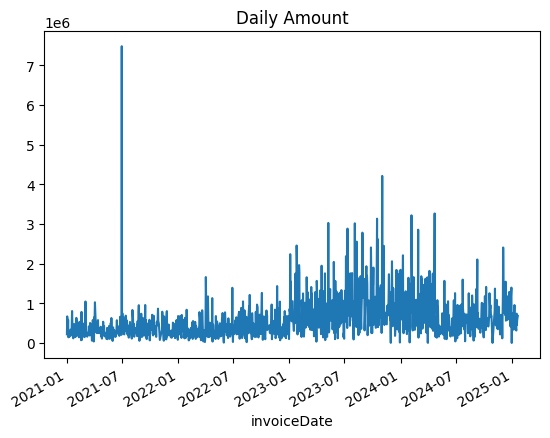

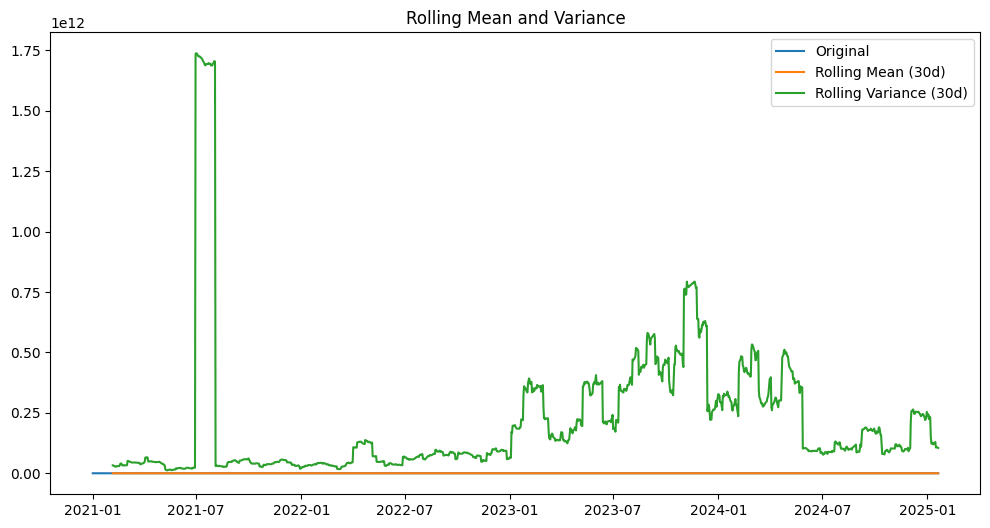

Overall Mean: 596800.2313181448
Overall Variance: 272416260370.19217


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('merge_daily_agg.csv', parse_dates=['invoiceDate'])

# Set date as index
df.set_index('invoiceDate', inplace=True)

# Plot the time series
df['amount'].plot(title='Daily Amount')
plt.show()

# Rolling statistics
window = 30  # 30 days rolling window
rolling_mean = df['amount'].rolling(window=window).mean()
rolling_var = df['amount'].rolling(window=window).var()

# Plot rolling mean and variance
plt.figure(figsize=(12, 6))
plt.plot(df['amount'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean (30d)')
plt.plot(rolling_var, label='Rolling Variance (30d)')
plt.legend()
plt.title('Rolling Mean and Variance')
plt.show()

# Print overall mean and variance
print("Overall Mean:", df['amount'].mean())
print("Overall Variance:", df['amount'].var())

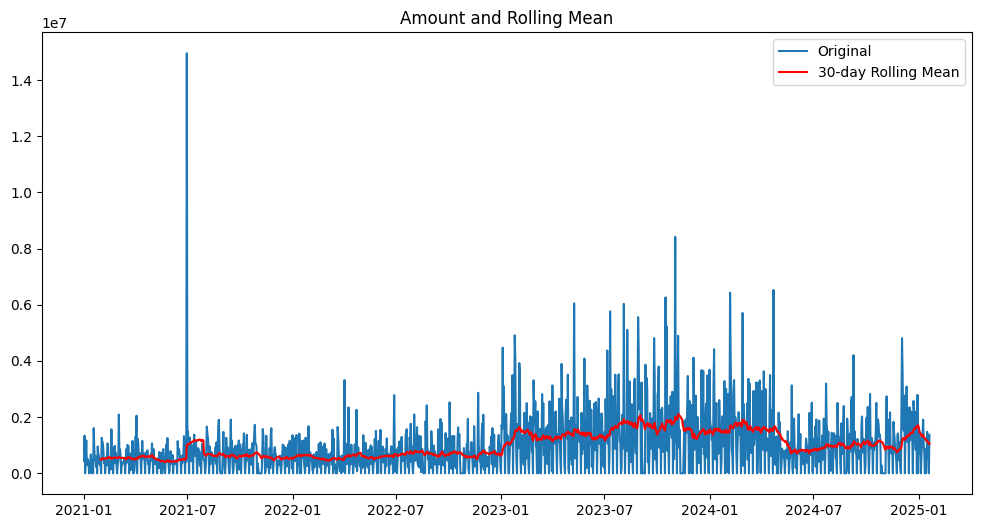

ADF Statistic: -3.281086610875474
p-value: 0.0157453636051278
Mean is constant (stationary).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load data
df = pd.read_csv('merged_sum_daily_agg_filled.csv', parse_dates=['invoiceDate'])
df.set_index('invoiceDate', inplace=True)

# Plot rolling mean
rolling_mean = df['amount'].rolling(window=30).mean()
plt.figure(figsize=(12,6))
plt.plot(df['amount'], label='Original')
plt.plot(rolling_mean, color='red', label='30-day Rolling Mean')
plt.legend()
plt.title('Amount and Rolling Mean')
plt.show()

# Augmented Dickey-Fuller test
adf_result = adfuller(df['amount'].fillna(0))
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
if adf_result[1] < 0.05:
    print("Mean is constant (stationary).")
else:
    print("Mean is not constant (non-stationary).")

In [2]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.9 MB 8.4 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/9.9 MB 10.4 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.9 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 12.9 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 13.1 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- -----------

Autocorrelation (lag 1): 0.169


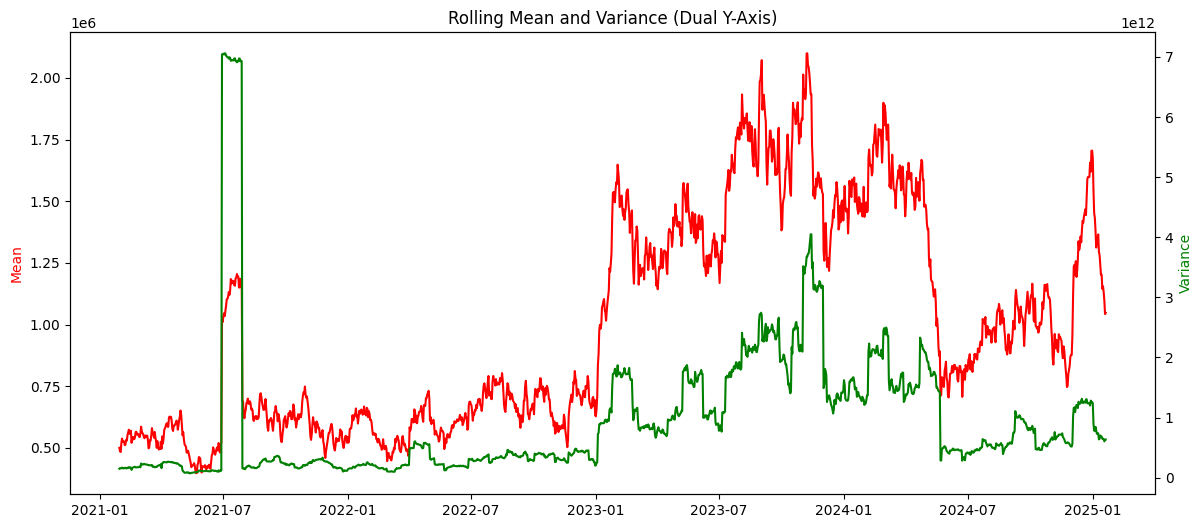

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('merged_sum_daily_agg_filled.csv', parse_dates=['invoiceDate'])
df.set_index('invoiceDate', inplace=True)

window = 30
rolling_mean = df['amount'].rolling(window=window).mean()
rolling_var = df['amount'].rolling(window=window).var()
# Calculate autocorrelation at lag 1 (yesterday vs today)
autocorr_lag1 = df['amount'].autocorr(lag=1)
print(f"Autocorrelation (lag 1): {autocorr_lag1:.3f}")
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(df.index, rolling_mean, color='red', label='Rolling Mean (30d)')
ax1.set_ylabel('Mean', color='red')
ax2 = ax1.twinx()
ax2.plot(df.index, rolling_var, color='green', label='Rolling Variance (30d)')
ax2.set_ylabel('Variance', color='green')
plt.title('Rolling Mean and Variance (Dual Y-Axis)')
plt.show()

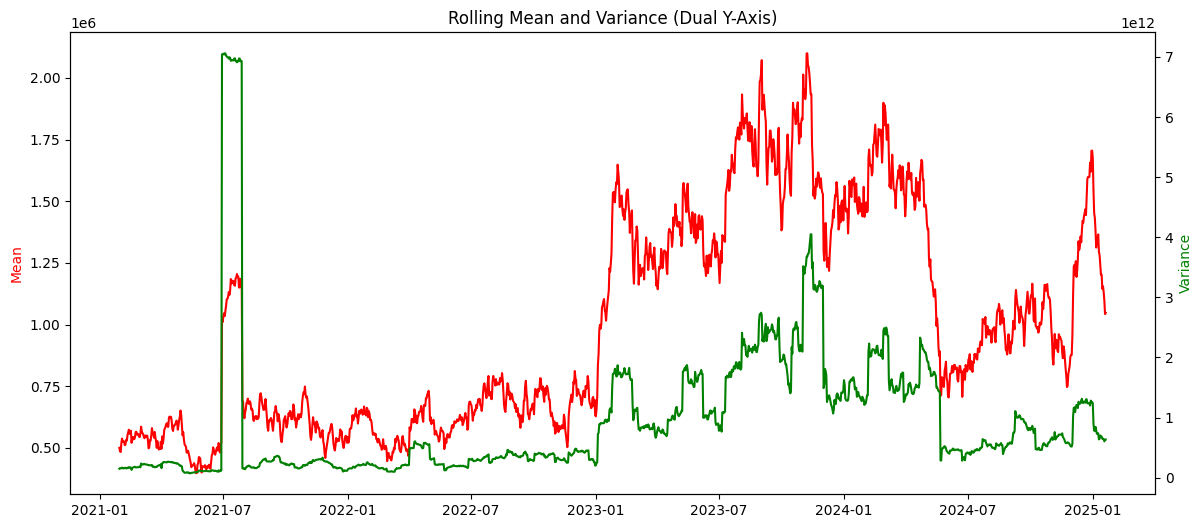

Autocorrelation (lag 1): 0.169


<Figure size 1000x400 with 0 Axes>

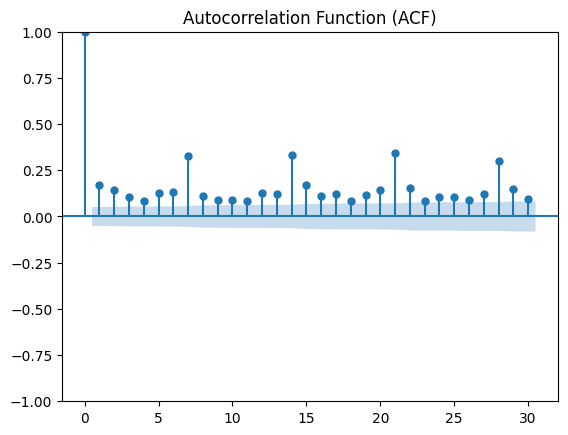

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Load your data
df = pd.read_csv('merged_sum_daily_agg_filled.csv', parse_dates=['invoiceDate'])
df.set_index('invoiceDate', inplace=True)

# Rolling statistics
window = 30
rolling_mean = df['amount'].rolling(window=window).mean()
rolling_var = df['amount'].rolling(window=window).var()

# Plot rolling mean and variance (dual y-axis)
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(df.index, rolling_mean, color='red', label='Rolling Mean (30d)')
ax1.set_ylabel('Mean', color='red')
ax2 = ax1.twinx()
ax2.plot(df.index, rolling_var, color='green', label='Rolling Variance (30d)')
ax2.set_ylabel('Variance', color='green')
plt.title('Rolling Mean and Variance (Dual Y-Axis)')
plt.show()

# Print autocorrelation at lag 1
autocorr_lag1 = df['amount'].autocorr(lag=1)
print(f"Autocorrelation (lag 1): {autocorr_lag1:.3f}")

# Plot autocorrelation function (ACF)
plt.figure(figsize=(10, 4))
plot_acf(df['amount'].fillna(0), lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.show()

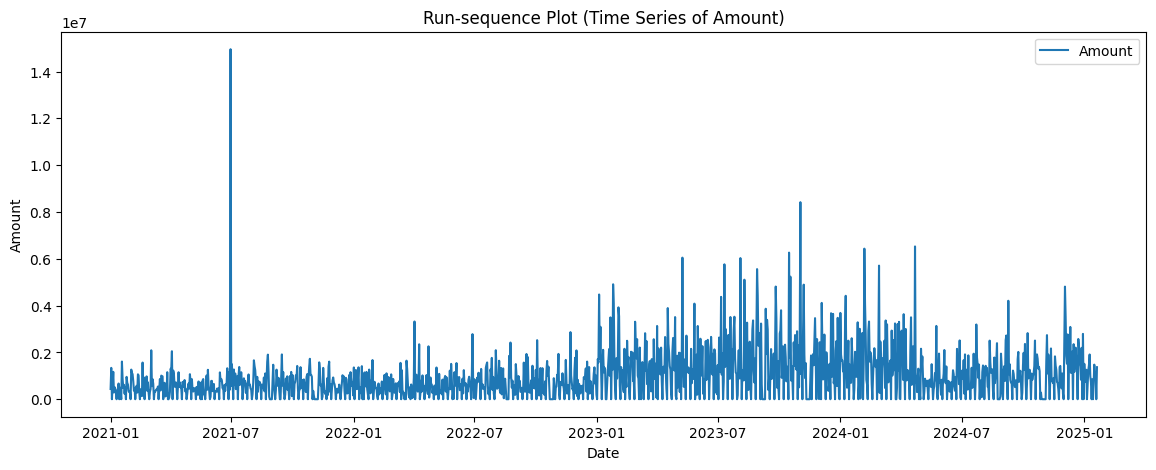

Summary statistics:
count    1.481000e+03
mean     9.905030e+05
std      1.051395e+06
min      0.000000e+00
25%      3.152122e+05
50%      7.546605e+05
75%      1.361730e+06
max      1.495314e+07
Name: amount, dtype: float64


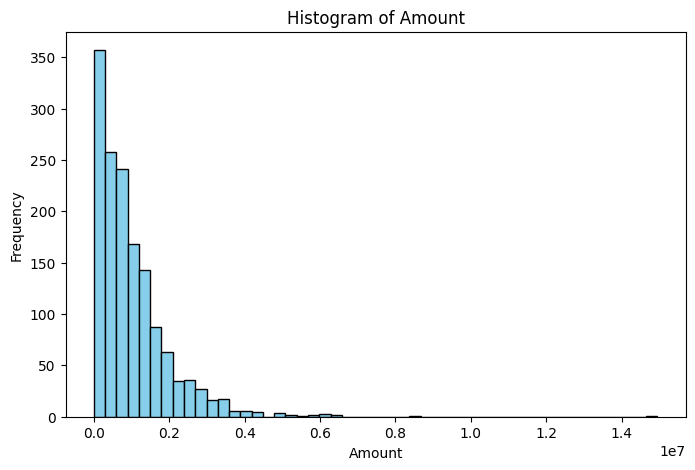


Augmented Dickey-Fuller Test:
ADF Statistic: -3.2811
p-value: 0.0157
Conclusion: The series is likely stationary (reject H0).


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load data
df = pd.read_csv('merged_sum_daily_agg_filled.csv', parse_dates=['invoiceDate'])
df.set_index('invoiceDate', inplace=True)

# 1. Run-sequence plot (time series)
plt.figure(figsize=(14, 5))
plt.plot(df['amount'], label='Amount')
plt.title('Run-sequence Plot (Time Series of Amount)')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

# 2. Summary statistics
print("Summary statistics:")
print(df['amount'].describe())

# 3. Histogram plot
plt.figure(figsize=(8, 5))
plt.hist(df['amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# 4. Augmented Dickey-Fuller test
adf_result = adfuller(df['amount'].fillna(0))
print('\nAugmented Dickey-Fuller Test:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
if adf_result[1] < 0.05:
    print("Conclusion: The series is likely stationary (reject H0).")
else:
    print("Conclusion: The series is likely non-stationary (fail to reject H0).")

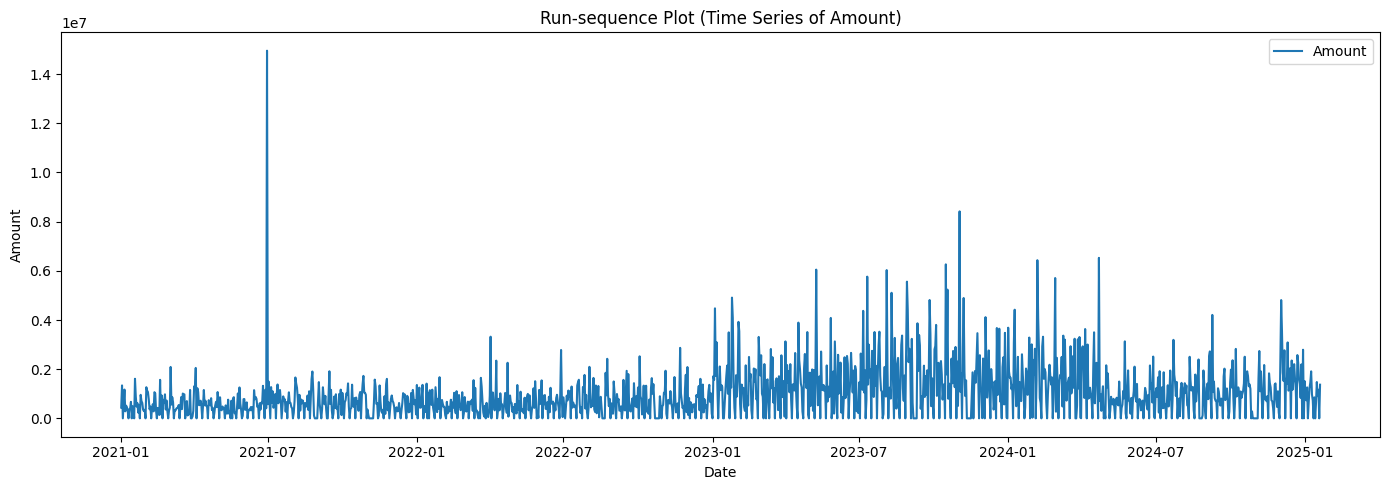

Summary statistics:
count    1.481000e+03
mean     9.905030e+05
std      1.051395e+06
min      0.000000e+00
25%      3.152122e+05
50%      7.546605e+05
75%      1.361730e+06
max      1.495314e+07
Name: amount, dtype: float64


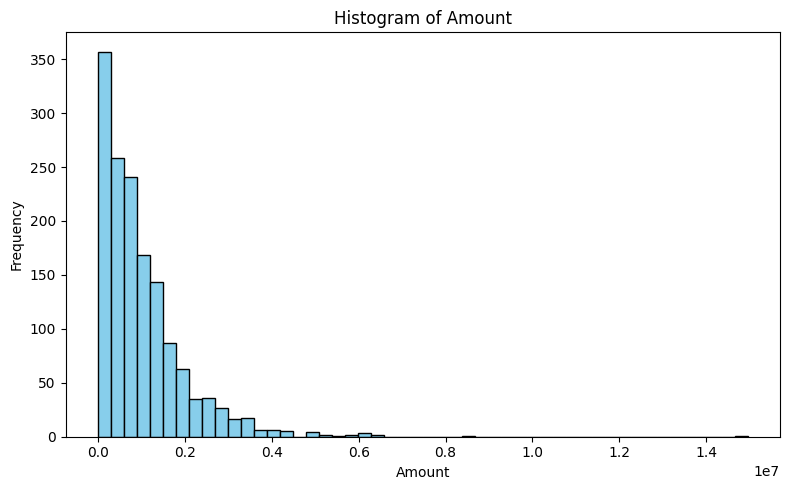


Augmented Dickey-Fuller Test:
ADF Statistic: -3.2811
p-value: 0.0157
Conclusion: The series is likely stationary (reject H0).


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load data
df = pd.read_csv('merged_sum_daily_agg_filled.csv', parse_dates=['invoiceDate'])
df.set_index('invoiceDate', inplace=True)

# 1. Run-sequence plot (time series)
plt.figure(figsize=(14, 5))
plt.plot(df['amount'], label='Amount')
plt.title('Run-sequence Plot (Time Series of Amount)')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Summary statistics
print("Summary statistics:")
print(df['amount'].describe())

# 3. Histogram plot
plt.figure(figsize=(8, 5))
plt.hist(df['amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Augmented Dickey-Fuller test
adf_result = adfuller(df['amount'].fillna(0))
print('\nAugmented Dickey-Fuller Test:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
if adf_result[1] < 0.05:
    print("Conclusion: The series is likely stationary (reject H0).")
else:
    print("Conclusion: The series is likely non-stationary (fail to reject H0).")

In [18]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load your data
df = pd.read_csv('merged_sum_daily_agg_filled.csv', parse_dates=['invoiceDate'])
df.set_index('invoiceDate', inplace=True)

# Fill missing values if any
series = df['amount'].fillna(0)

# Run Augmented Dickey-Fuller test
adf_result = adfuller(series)

print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")

if adf_result[1] < 0.05:
    print("\nConclusion: The series is likely stationary (reject H0).")
else:
    print("\nConclusion: The series is likely non-stationary (fail to reject H0).")

Augmented Dickey-Fuller Test Results:
ADF Statistic: -3.2811
p-value: 0.0157
Critical Values:
   1%: -3.4348
   5%: -2.8635
   10%: -2.5678

Conclusion: The series is likely stationary (reject H0).


Simple Average (Mean) of training data: 974,510.15


C:\Users\dazau\AppData\Local\Temp\ipykernel_13424\3214172742.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['simple_avg_forecast'] = simple_avg


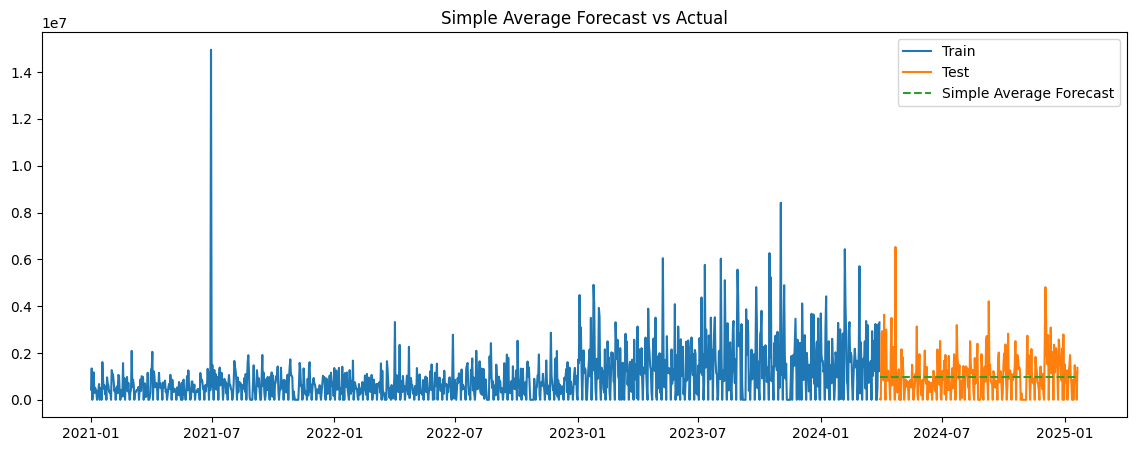

MAE: 670,288.75
RMSE: 837,858,111,484.50


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('merged_sum_daily_agg_filled.csv', parse_dates=['invoiceDate'])
df.set_index('invoiceDate', inplace=True)

# Calculate the simple average of the training period
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

simple_avg = train['amount'].mean()
print(f"Simple Average (Mean) of training data: {simple_avg:,.2f}")

# Forecast: predict the mean for each test date
test['simple_avg_forecast'] = simple_avg

# Plot actual vs. forecast
plt.figure(figsize=(14, 5))
plt.plot(train.index, train['amount'], label='Train')
plt.plot(test.index, test['amount'], label='Test')
plt.plot(test.index, test['simple_avg_forecast'], label='Simple Average Forecast', linestyle='--')
plt.legend()
plt.title('Simple Average Forecast vs Actual')
plt.show()

# Evaluate performance (MAE, RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test['amount'], test['simple_avg_forecast'])
rmse = mean_squared_error(test['amount'], test['simple_avg_forecast'])
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

In [20]:
conda update scikit-learn

Retrieving notices: done

Note: you may need to restart the kernel to use updated packages.


Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000207F8AB8470>, 'Connection to repo.anaconda.com timed out. (connect timeout=5)')': /pkgs/main/notices.json


EnvironmentLocationNotFound: Not a conda environment: c:\Program



C:\Users\dazau\AppData\Local\Temp\ipykernel_13424\811820442.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['moving_avg'] = train['amount'].rolling(window=window, min_periods=1).mean()
C:\Users\dazau\AppData\Local\Temp\ipykernel_13424\811820442.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['moving_avg_forecast'] = last_moving_avg


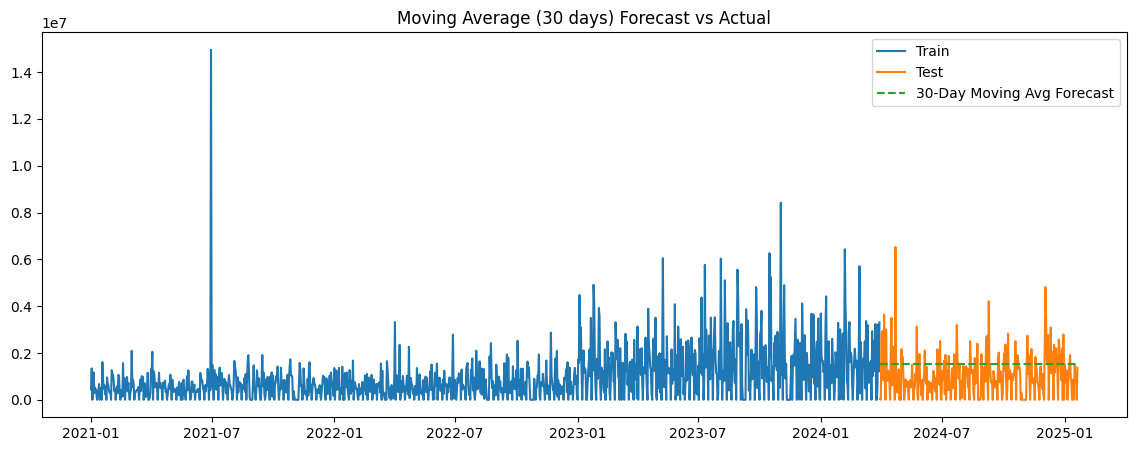

MAE: 845,505.46
RMSE: 1,056,599,262,707.96


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('merged_sum_daily_agg_filled.csv', parse_dates=['invoiceDate'])
df.set_index('invoiceDate', inplace=True)

# Split into train and test
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Moving average window (e.g., 30 days)
window = 30

# Calculate moving average on the training set
train['moving_avg'] = train['amount'].rolling(window=window, min_periods=1).mean()

# For forecasting, use the last available moving average from train for each test date
last_moving_avg = train['moving_avg'].iloc[-1]
test['moving_avg_forecast'] = last_moving_avg

# Optionally, you can use a rolling forecast (walk-forward), but for simplicity, we use the last train MA

# Plot actual vs. forecast
plt.figure(figsize=(14, 5))
plt.plot(train.index, train['amount'], label='Train')
plt.plot(test.index, test['amount'], label='Test')
plt.plot(test.index, test['moving_avg_forecast'], label=f'{window}-Day Moving Avg Forecast', linestyle='--')
plt.legend()
plt.title(f'Moving Average ({window} days) Forecast vs Actual')
plt.show()

# Evaluate performance (MAE, RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test['amount'], test['moving_avg_forecast'])
rmse = mean_squared_error(test['amount'], test['moving_avg_forecast'])
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

C:\Users\dazau\AppData\Local\Temp\ipykernel_13424\1135190270.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ewm_avg'] = train['amount'].ewm(span=window, adjust=False).mean()
C:\Users\dazau\AppData\Local\Temp\ipykernel_13424\1135190270.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ewm_avg_forecast'] = last_ewm_avg


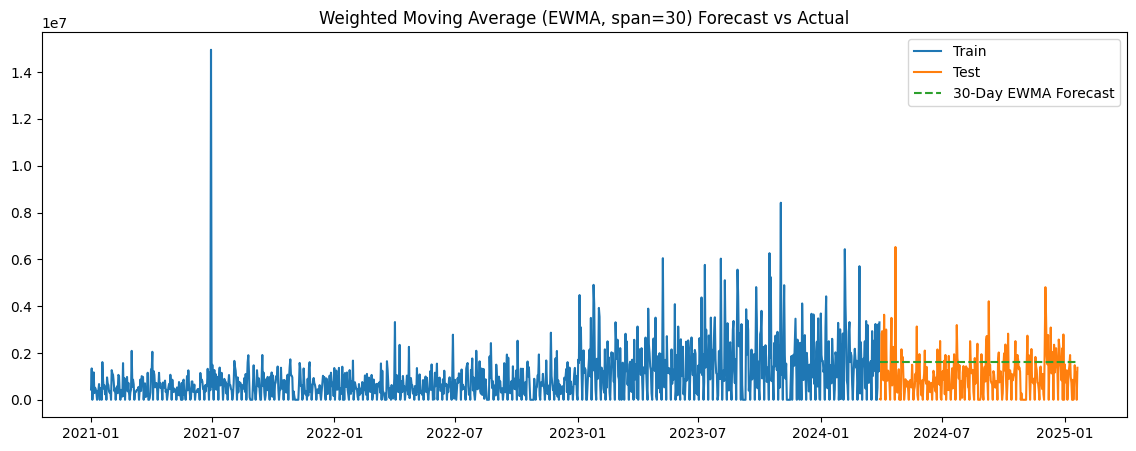

MAE: 906,250.17
RMSE: 1,167,110,467,809.68


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('merged_sum_daily_agg_filled.csv', parse_dates=['invoiceDate'])
df.set_index('invoiceDate', inplace=True)

# Split into train and test
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Weighted moving average window (e.g., 30 days)
window = 30

# Calculate exponential weighted moving average (EWMA) on the training set
train['ewm_avg'] = train['amount'].ewm(span=window, adjust=False).mean()

# For forecasting, use the last available EWMA from train for each test date
last_ewm_avg = train['ewm_avg'].iloc[-1]
test['ewm_avg_forecast'] = last_ewm_avg

# Plot actual vs. forecast
plt.figure(figsize=(14, 5))
plt.plot(train.index, train['amount'], label='Train')
plt.plot(test.index, test['amount'], label='Test')
plt.plot(test.index, test['ewm_avg_forecast'], label=f'{window}-Day EWMA Forecast', linestyle='--')
plt.legend()
plt.title(f'Weighted Moving Average (EWMA, span={window}) Forecast vs Actual')
plt.show()

# Evaluate performance (MAE, RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test['amount'], test['ewm_avg_forecast'])
rmse = mean_squared_error(test['amount'], test['ewm_avg_forecast'])
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

C:\Users\dazau\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dazau\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


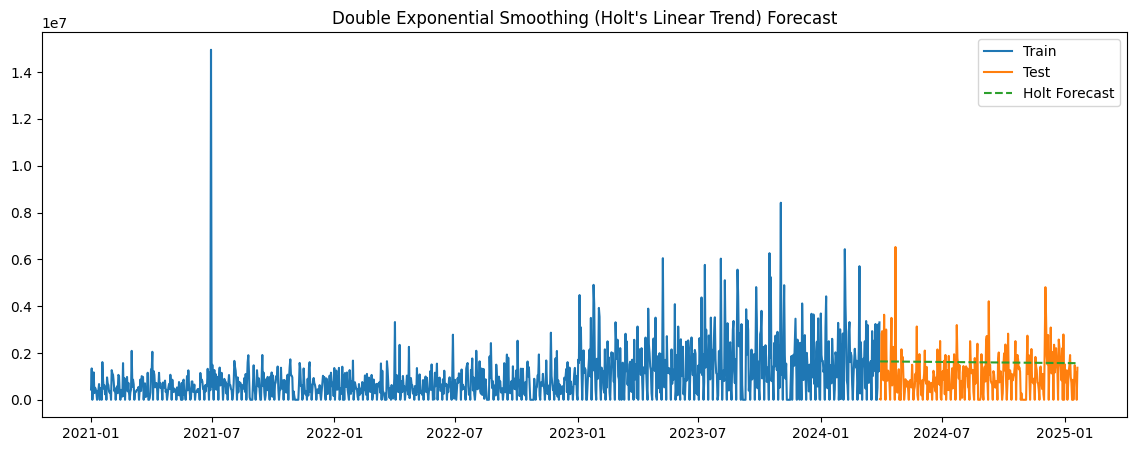

MAE: 888,161.10
RMSE: 1,132,670,319,213.09


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your data
df = pd.read_csv('merged_sum_daily_agg_filled.csv', parse_dates=['invoiceDate'])
df.set_index('invoiceDate', inplace=True)

# Use only the 'amount' column
y = df['amount']

# Split into train/test (e.g., last 20% for test)
train_size = int(len(y) * 0.8)
train, test = y.iloc[:train_size], y.iloc[train_size:]

# Fit Double Exponential Smoothing (Holt's method)
holt_model = ExponentialSmoothing(train, trend='add', seasonal=None, initialization_method='estimated')
holt_fit = holt_model.fit()

# Forecast for the test period
forecast = holt_fit.forecast(len(test))

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Holt Forecast', linestyle='--')
plt.legend()
plt.title("Double Exponential Smoothing (Holt's Linear Trend) Forecast")
plt.show()

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test, forecast)
rmse = mean_squared_error(test, forecast)
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

Text(0.5, 0, 'Lag (days)')

<Figure size 1200x500 with 0 Axes>

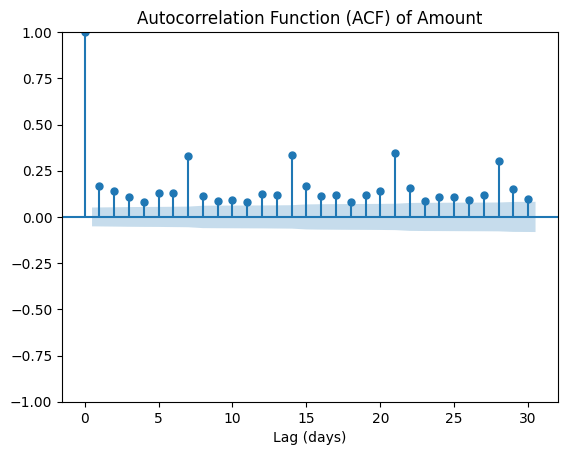

In [30]:
# ...existing code...

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Load your data
df = pd.read_csv('merged_sum_daily_agg_filled.csv', parse_dates=['invoiceDate'])
df.set_index('invoiceDate', inplace=True)

# Plot the Autocorrelation Function (ACF) for the 'amount' column
plt.figure(figsize=(12, 5))
plot_acf(df['amount'].fillna(0), lags=30)
plt.title('Autocorrelation Function (ACF) of Amount')
plt.xlabel('Lag (days)')

Data shape: (1481, 1)
Date range: 2021-01-01 00:00:00 to 2025-01-20 00:00:00
Amount statistics:
count    1.481000e+03
mean     9.905030e+05
std      1.051395e+06
min      0.000000e+00
25%      3.152122e+05
50%      7.546605e+05
75%      1.361730e+06
max      1.495314e+07
Name: amount, dtype: float64
Training sequences shape: (1464, 7)
Training targets shape: (1464,)

TRAINING KERAS MODEL
Epoch 1/50
37/37 [==============================] - 5s 32ms/step - loss: 0.0053 - mae: 0.0489 - val_loss: 0.0038 - val_mae: 0.0472
Epoch 2/50
37/37 [==============================] - 0s 9ms/step - loss: 0.0048 - mae: 0.0457 - val_loss: 0.0044 - val_mae: 0.0535
Epoch 3/50
37/37 [==============================] - 0s 9ms/step - loss: 0.0048 - mae: 0.0451 - val_loss: 0.0038 - val_mae: 0.0471
Epoch 4/50
37/37 [==============================] - 0s 9ms/step - loss: 0.0047 - mae: 0.0445 - val_loss: 0.0039 - val_mae: 0.0458
Epoch 5/50
37/37 [==============================] - 0s 9ms/step - loss: 0.0047 - mae: 0.

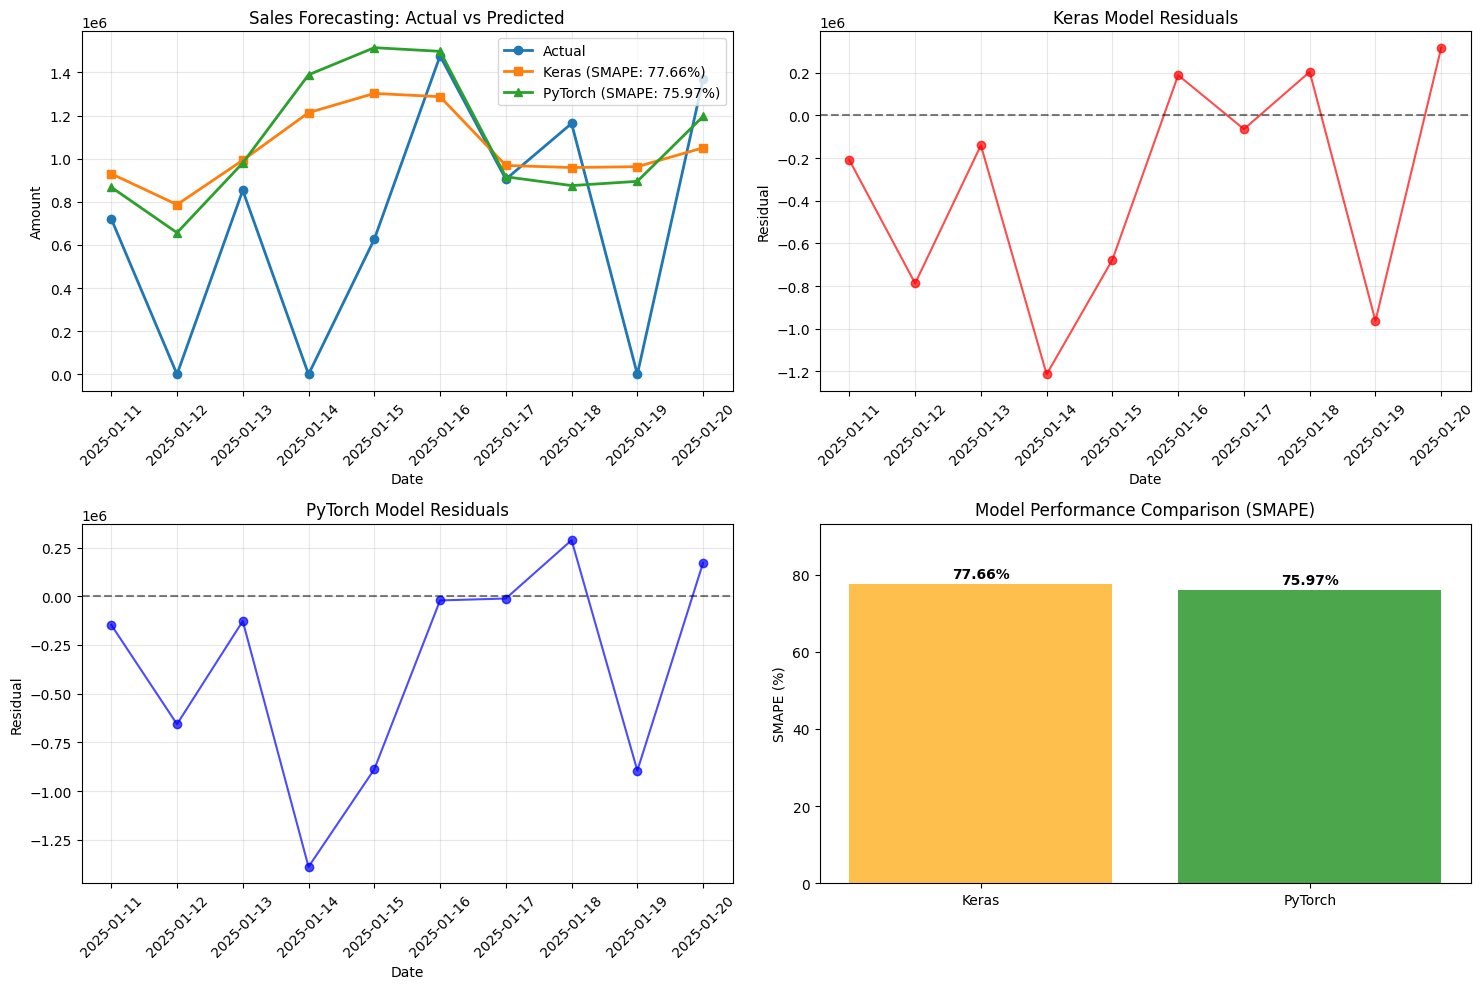

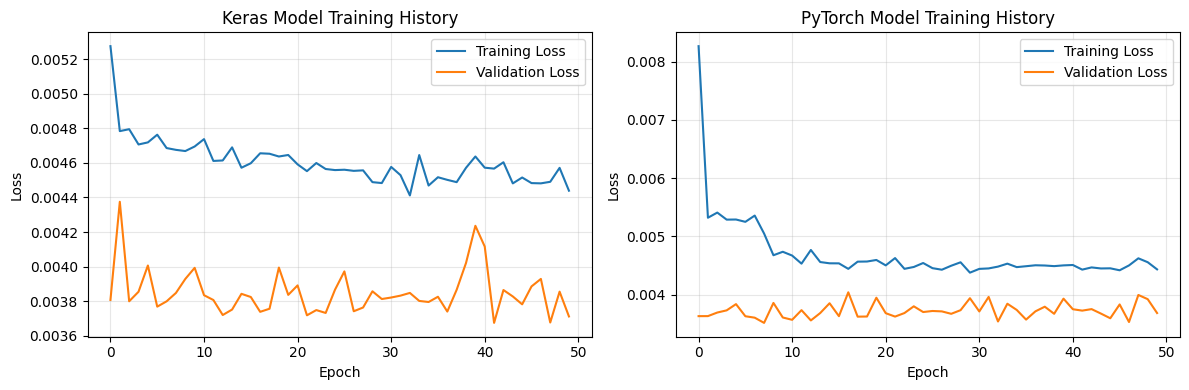

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Keras/TensorFlow imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# PyTorch imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)

def load_and_prepare_data(file_path):
    """Load and prepare the sales data"""
    df = pd.read_csv(file_path)
    df['invoiceDate'] = pd.to_datetime(df['invoiceDate'])
    df = df.sort_values('invoiceDate')
    df = df.set_index('invoiceDate')
    
    print(f"Data shape: {df.shape}")
    print(f"Date range: {df.index.min()} to {df.index.max()}")
    print(f"Amount statistics:")
    print(df['amount'].describe())
    
    return df

def create_sequences(data, seq_length):
    """Create sequences for time series prediction"""
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

def smape(y_true, y_pred):
    """Calculate Symmetric Mean Absolute Percentage Error"""
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8))

def build_keras_model(input_shape):
    """Build Keras LSTM model"""
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

class SalesDataset(Dataset):
    """PyTorch Dataset for sales data"""
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class PyTorchLSTM(nn.Module):
    """PyTorch LSTM model"""
    def __init__(self, input_size=1, hidden_size=50, num_layers=3, dropout=0.2):
        super(PyTorchLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, 
                           batch_first=True, dropout=dropout)
        self.dropout = nn.Dropout(dropout)
        self.fc1 = nn.Linear(hidden_size, 25)
        self.fc2 = nn.Linear(25, 1)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        
        lstm_out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(lstm_out[:, -1, :])
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

def train_pytorch_model(model, train_loader, val_loader, epochs=50):
    """Train PyTorch model"""
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred.squeeze(), y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                y_pred = model(X_batch)
                loss = criterion(y_pred.squeeze(), y_batch)
                val_loss += loss.item()
        
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss / len(val_loader))
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Train Loss: {train_losses[-1]:.6f}, Val Loss: {val_losses[-1]:.6f}')
    
    return train_losses, val_losses

def plot_results(y_true, keras_pred, pytorch_pred, dates, keras_smape, pytorch_smape):
    """Plot the results"""
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Predictions vs Actual
    plt.subplot(2, 2, 1)
    plt.plot(dates, y_true, label='Actual', marker='o', linewidth=2)
    plt.plot(dates, keras_pred, label=f'Keras (SMAPE: {keras_smape:.2f}%)', marker='s', linewidth=2)
    plt.plot(dates, pytorch_pred, label=f'PyTorch (SMAPE: {pytorch_smape:.2f}%)', marker='^', linewidth=2)
    plt.title('Sales Forecasting: Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Residuals for Keras
    plt.subplot(2, 2, 2)
    keras_residuals = y_true - keras_pred
    plt.plot(dates, keras_residuals, marker='o', color='red', alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    plt.title('Keras Model Residuals')
    plt.xlabel('Date')
    plt.ylabel('Residual')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Plot 3: Residuals for PyTorch
    plt.subplot(2, 2, 3)
    pytorch_residuals = y_true - pytorch_pred
    plt.plot(dates, pytorch_residuals, marker='o', color='blue', alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    plt.title('PyTorch Model Residuals')
    plt.xlabel('Date')
    plt.ylabel('Residual')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Plot 4: Model Comparison
    plt.subplot(2, 2, 4)
    models = ['Keras', 'PyTorch']
    smape_values = [keras_smape, pytorch_smape]
    colors = ['orange', 'green']
    bars = plt.bar(models, smape_values, color=colors, alpha=0.7)
    plt.title('Model Performance Comparison (SMAPE)')
    plt.ylabel('SMAPE (%)')
    plt.ylim(0, max(smape_values) * 1.2)
    
    # Add value labels on bars
    for bar, value in zip(bars, smape_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(smape_values)*0.01,
                f'{value:.2f}%', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def main():
    # Load and prepare data
    df = load_and_prepare_data('merged_sum_daily_agg_filled.csv')
    
    # Prepare data for modeling
    data = df['amount'].values
    
    # Split data (last 10 for testing)
    train_size = len(data) - 10
    train_data = data[:train_size]
    test_data = data[train_size:]
    test_dates = df.index[train_size:]
    
    # Scale the data
    scaler = MinMaxScaler()
    train_data_scaled = scaler.fit_transform(train_data.reshape(-1, 1)).flatten()
    test_data_scaled = scaler.transform(test_data.reshape(-1, 1)).flatten()
    
    # Create sequences
    seq_length = 7  # Use 7 days to predict next day
    X_train, y_train = create_sequences(train_data_scaled, seq_length)
    
    print(f"Training sequences shape: {X_train.shape}")
    print(f"Training targets shape: {y_train.shape}")
    
    # Split training data into train and validation
    val_size = int(0.2 * len(X_train))
    X_val, y_val = X_train[-val_size:], y_train[-val_size:]
    X_train, y_train = X_train[:-val_size], y_train[:-val_size]
    
    # Reshape for LSTM (samples, time steps, features)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
    
    # ==================== KERAS MODEL ====================
    print("\n" + "="*50)
    print("TRAINING KERAS MODEL")
    print("="*50)
    
    keras_model = build_keras_model((seq_length, 1))
    
    # Train Keras model
    history = keras_model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_val, y_val),
        verbose=1
    )
    
    # ==================== PYTORCH MODEL ====================
    print("\n" + "="*50)
    print("TRAINING PYTORCH MODEL")
    print("="*50)
    
    # Prepare PyTorch data
    train_dataset = SalesDataset(X_train, y_train)
    val_dataset = SalesDataset(X_val, y_val)        
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    
    pytorch_model = PyTorchLSTM()
    train_losses, val_losses = train_pytorch_model(pytorch_model, train_loader, val_loader)
    
    # ==================== PREDICTIONS ====================
    print("\n" + "="*50)
    print("MAKING PREDICTIONS")
    print("="*50)
    
    # Make predictions on test data
    keras_predictions = []
    pytorch_predictions = []
    
    # Use the last seq_length points from training for initial prediction
    current_sequence = train_data_scaled[-seq_length:].reshape(1, seq_length, 1)
    current_sequence_torch = torch.FloatTensor(train_data_scaled[-seq_length:]).unsqueeze(0).unsqueeze(-1)
    
    for i in range(10):  # Predict next 10 days
        # Keras prediction
        keras_pred = keras_model.predict(current_sequence, verbose=0)[0, 0]
        keras_predictions.append(keras_pred)
        
        # PyTorch prediction
        pytorch_model.eval()
        with torch.no_grad():
            pytorch_pred = pytorch_model(current_sequence_torch).item()
        pytorch_predictions.append(pytorch_pred)
        
        # Update sequences for next prediction
        current_sequence = np.roll(current_sequence, -1, axis=1)
        current_sequence[0, -1, 0] = keras_pred
        
        current_sequence_torch = torch.roll(current_sequence_torch, -1, dims=1)
        current_sequence_torch[0, -1] = pytorch_pred
    
    # Inverse transform predictions
    keras_predictions = scaler.inverse_transform(np.array(keras_predictions).reshape(-1, 1)).flatten()
    pytorch_predictions = scaler.inverse_transform(np.array(pytorch_predictions).reshape(-1, 1)).flatten()
    
    # ==================== EVALUATION ====================
    print("\n" + "="*50)
    print("EVALUATION RESULTS")
    print("="*50)
    
    # Calculate SMAPE
    keras_smape = smape(test_data, keras_predictions)
    pytorch_smape = smape(test_data, pytorch_predictions)
    
    print(f"Keras Model SMAPE: {keras_smape:.2f}%")
    print(f"PyTorch Model SMAPE: {pytorch_smape:.2f}%")
    
    # Calculate other metrics
    keras_mae = mean_absolute_error(test_data, keras_predictions)
    pytorch_mae = mean_absolute_error(test_data, pytorch_predictions)
    
    keras_rmse = np.sqrt(mean_squared_error(test_data, keras_predictions))
    pytorch_rmse = np.sqrt(mean_squared_error(test_data, pytorch_predictions))
    
    print(f"\nKeras Model:")
    print(f"  MAE: {keras_mae:.2f}")
    print(f"  RMSE: {keras_rmse:.2f}")
    
    print(f"\nPyTorch Model:")
    print(f"  MAE: {pytorch_mae:.2f}")
    print(f"  RMSE: {pytorch_rmse:.2f}")
    
    # Print actual vs predicted values
    print(f"\nActual vs Predicted Values:")
    print(f"{'Date':<12} {'Actual':<12} {'Keras':<12} {'PyTorch':<12}")
    print("-" * 50)
    for i, date in enumerate(test_dates):
        print(f"{date.strftime('%Y-%m-%d'):<12} {test_data[i]:<12.2f} {keras_predictions[i]:<12.2f} {pytorch_predictions[i]:<12.2f}")
    
    # Plot results
    plot_results(test_data, keras_predictions, pytorch_predictions, test_dates, keras_smape, pytorch_smape)
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Keras Model Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('PyTorch Model Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

In [5]:
conda activate ml-forecast-env

error: incomplete escape \U at position 28

In [2]:
conda install -c conda-forge tensorflow pandas scikit-learn matplotlib

error: incomplete escape \U at position 28

In [3]:
conda install -c conda-forge jupyterlab

error: incomplete escape \U at position 28

In [4]:
conda activate C:\Program Files\PycharmProjects\projects\GOlBOT\ml\.conda

error: incomplete escape \U at position 28

In [5]:
conda activate c:\Users\dazau\Downloads\Forecasting\.conda


Note: you may need to restart the kernel to use updated packages.



CondaError: Run 'conda init' before 'conda activate'



In [3]:
conda init cmd.exe

no change     C:\ProgramData\anaconda3\Scripts\conda.exe
no change     C:\ProgramData\anaconda3\Scripts\conda-env.exe
no change     C:\ProgramData\anaconda3\Scripts\conda-script.py
no change     C:\ProgramData\anaconda3\Scripts\conda-env-script.py
no change     C:\ProgramData\anaconda3\condabin\conda.bat
no change     C:\ProgramData\anaconda3\Library\bin\conda.bat
no change     C:\ProgramData\anaconda3\condabin\_conda_activate.bat
no change     C:\ProgramData\anaconda3\condabin\rename_tmp.bat
no change     C:\ProgramData\anaconda3\condabin\conda_auto_activate.bat
no change     C:\ProgramData\anaconda3\condabin\conda_hook.bat
no change     C:\ProgramData\anaconda3\Scripts\activate.bat
no change     C:\ProgramData\anaconda3\condabin\activate.bat
no change     C:\ProgramData\anaconda3\condabin\deactivate.bat
no change     C:\ProgramData\anaconda3\Scripts\activate
no change     C:\ProgramData\anaconda3\Scripts\deactivate
no change     C:\ProgramData\anaconda3\etc\profile.d\conda.sh
no chan

In [4]:
# For example, to activate the environment from your last question:
conda activate C:\Users\dazau\Documents\Projects\GOIBOT\ml\.conda

SyntaxError: invalid syntax (195124909.py, line 2)

No GPU found, running on CPU.
Generating synthetic sales data...


TypeError: Index does not support mutable operations

ZeroDivisionError: integer division or modulo by zero

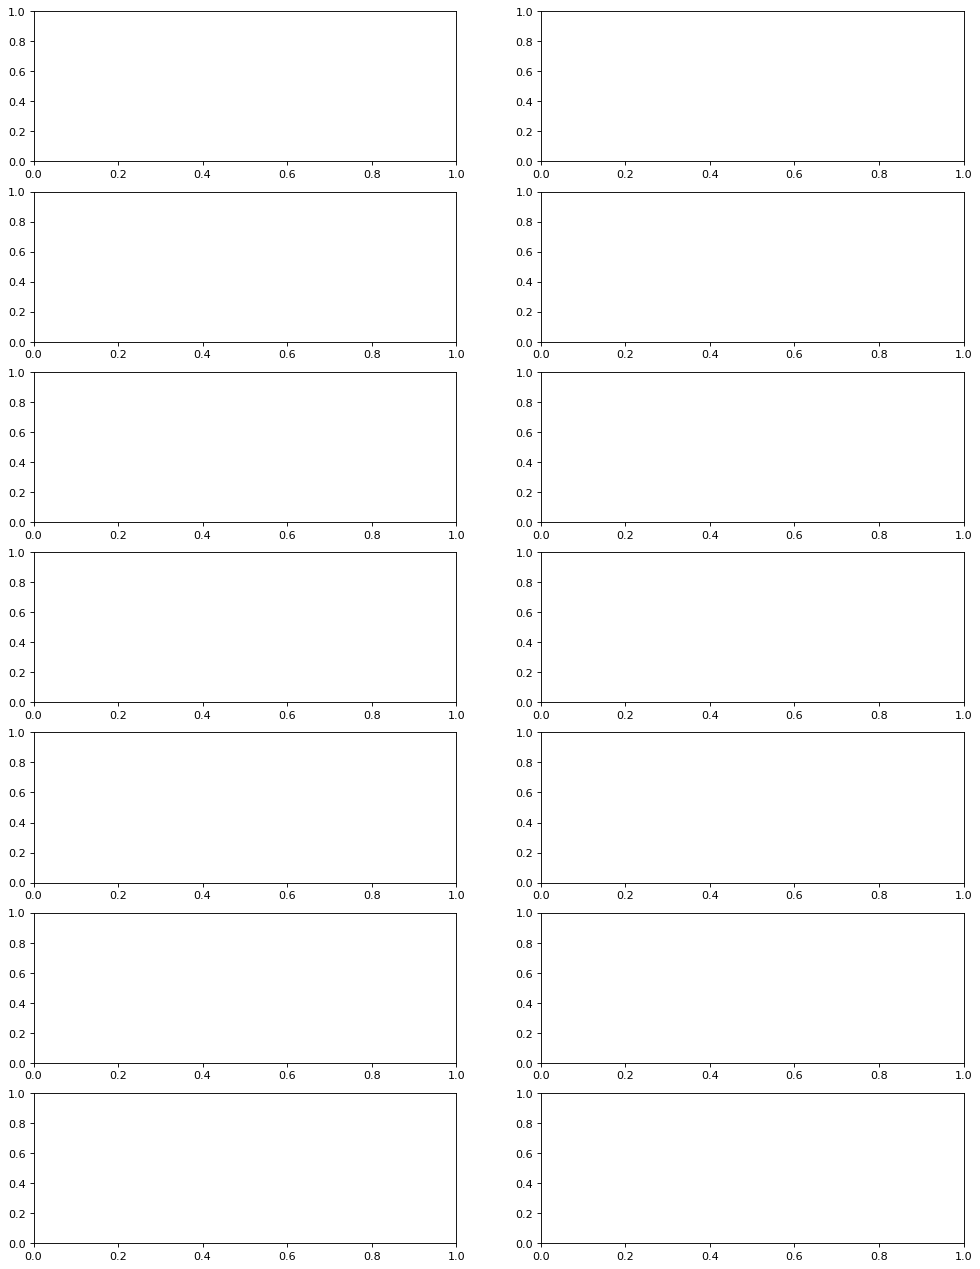

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
import pandas as pd


file_path = 'merged_sum_daily_agg_filled.csv'
feature_keys = [
    "amount"]
colors=[
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",



]
titles=[]
data_time_key = "invoiceDate"
def load_sales_data(file_path):
    """Load sales data from CSV file"""                                                                            
    df = pd.read_csv(file_path, parse_dates=[0], index_col=0)
    df.columns = ['sales']
    return df

df = pd.read_csv(file_path)
data_time_key = "invoiceDate"
def show_raw_visualization(data):
    time_data = data[data_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))
step = 6

past = 720
future = 72
learning_rate = 0.001
batch_size = 256
epochs = 10


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

start = past + future
end = start + train_split

x_train = train_data[[i for i in range(7)]].values
y_train = features.iloc[start:end][[1]]

sequence_length = int(past / step)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(7)]].values
y_val = features.iloc[label_start:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)


inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()


path_checkpoint = "model_checkpoint.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")